# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmp9nt0v7_0


[d3graph] INFO> Writing /local/scratch/tmp/tmp9nt0v7_0/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
"fibroblast",
"endothelial cell",
"myofibroblast cell",
"glial cell",
"pericyte",
"lymphocyte",
"stromal cell",
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 23061 × 70116
    obs: 'biosample_id', 'n_genes', 'n_counts', 'Type', 'donor_id', 'Layer', 'Celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'age group', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'cell_culture'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbo

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']
adata = adata[adata.obs.disease=="normal"]
adata = adata[adata.X.sum(1) > 500]
adata.obs.cell_type.value_counts()

cell_type
fibroblast            3480
endothelial cell       792
myofibroblast cell     690
glial cell             379
pericyte               250
lymphocyte             228
stromal cell            33
Name: count, dtype: int64


  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [00:02<01:19,  2.58s/it]


  6%|▋         | 2/32 [00:03<00:46,  1.54s/it]


  9%|▉         | 3/32 [00:04<00:34,  1.17s/it]


 12%|█▎        | 4/32 [00:04<00:28,  1.01s/it]


 16%|█▌        | 5/32 [00:05<00:24,  1.09it/s]


 19%|█▉        | 6/32 [00:06<00:22,  1.15it/s]


 22%|██▏       | 7/32 [00:09<00:37,  1.50s/it]


 25%|██▌       | 8/32 [00:10<00:36,  1.52s/it]


 28%|██▊       | 9/32 [00:11<00:29,  1.28s/it]


 31%|███▏      | 10/32 [00:12<00:24,  1.12s/it]


 34%|███▍      | 11/32 [00:13<00:21,  1.01s/it]


 38%|███▊      | 12/32 [00:13<00:18,  1.07it/s]


 41%|████      | 13/32 [00:14<00:16,  1.14it/s]


 44%|████▍     | 14/32 [00:15<00:15,  1.19it/s]


 47%|████▋     | 15/32 [00:16<00:16,  1.05it/s]


 50%|█████     | 16/32 [00:17<00:14,  1.12it/s]


 53%|█████▎    | 17/32 [00:19<00:19,  1.31s/it]


 56%|█████▋    | 18/32 [00:20<00:16,  1.17s/it]


 59%|█████▉    | 19/32 [00:21<00:13,  1.07s/it]


 62%|██████▎   | 20/32 [00:22<00:11,  1.00it/s]


 66%|██████▌   | 21/32 [00:22<00:10,  1.06it/s]


 69%|██████▉   | 22/32 [00:23<00:09,  1.10it/s]


 72%|███████▏  | 23/32 [00:24<00:07,  1.14it/s]


 75%|███████▌  | 24/32 [00:25<00:06,  1.16it/s]


 78%|███████▊  | 25/32 [00:26<00:05,  1.19it/s]


 81%|████████▏ | 26/32 [00:26<00:04,  1.20it/s]


 84%|████████▍ | 27/32 [00:27<00:04,  1.22it/s]


 88%|████████▊ | 28/32 [00:28<00:03,  1.22it/s]


 91%|█████████ | 29/32 [00:29<00:02,  1.22it/s]


 94%|█████████▍| 30/32 [00:30<00:01,  1.23it/s]


 97%|█████████▋| 31/32 [00:30<00:00,  1.23it/s]


100%|██████████| 32/32 [00:31<00:00,  1.24it/s]


100%|██████████| 32/32 [00:31<00:00,  1.00it/s]

avg link count: 535876201, sparsity: 1.0


base enrichment


too many genes for central computation


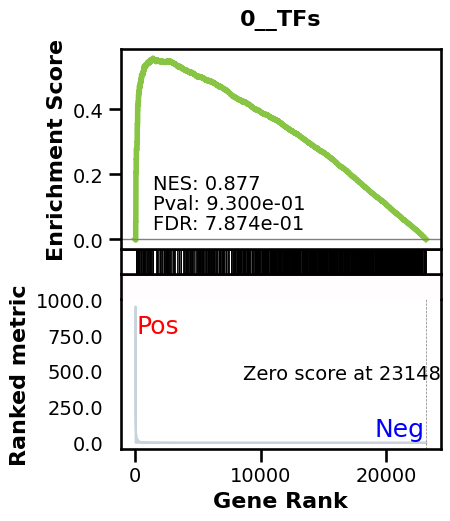

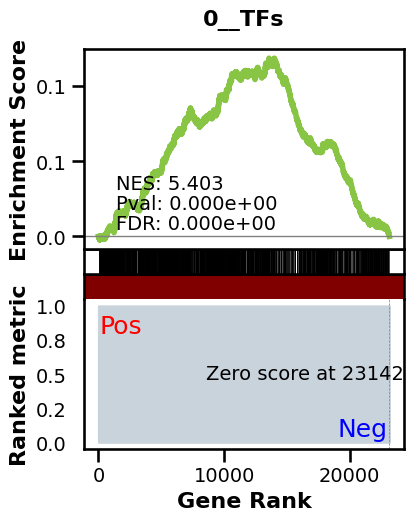

_________________________________________
TF specific enrichment


found some significant results for  48.214285714285715 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:44,  2.84it/s]


  2%|▏         | 2/128 [00:00<00:40,  3.14it/s]


  2%|▏         | 3/128 [00:00<00:38,  3.24it/s]


  3%|▎         | 4/128 [00:01<00:37,  3.29it/s]


  4%|▍         | 5/128 [00:01<00:36,  3.33it/s]


  5%|▍         | 6/128 [00:01<00:36,  3.35it/s]


  5%|▌         | 7/128 [00:02<00:36,  3.36it/s]


  6%|▋         | 8/128 [00:02<00:35,  3.36it/s]


  7%|▋         | 9/128 [00:02<00:35,  3.37it/s]


  8%|▊         | 10/128 [00:03<00:35,  3.37it/s]


  9%|▊         | 11/128 [00:03<00:34,  3.38it/s]


  9%|▉         | 12/128 [00:03<00:34,  3.38it/s]


 10%|█         | 13/128 [00:03<00:34,  3.38it/s]


 11%|█         | 14/128 [00:04<00:33,  3.38it/s]


 12%|█▏        | 15/128 [00:04<00:33,  3.38it/s]


 12%|█▎        | 16/128 [00:04<00:33,  3.38it/s]


 13%|█▎        | 17/128 [00:05<00:32,  3.38it/s]


 14%|█▍        | 18/128 [00:05<00:32,  3.39it/s]


 15%|█▍        | 19/128 [00:05<00:32,  3.38it/s]


 16%|█▌        | 20/128 [00:05<00:31,  3.39it/s]


 16%|█▋        | 21/128 [00:06<00:31,  3.38it/s]


 17%|█▋        | 22/128 [00:06<00:31,  3.39it/s]


 18%|█▊        | 23/128 [00:06<00:31,  3.38it/s]


 19%|█▉        | 24/128 [00:07<00:30,  3.39it/s]


 20%|█▉        | 25/128 [00:07<00:30,  3.39it/s]


 20%|██        | 26/128 [00:07<00:30,  3.39it/s]


 21%|██        | 27/128 [00:08<00:29,  3.39it/s]


 22%|██▏       | 28/128 [00:08<00:29,  3.38it/s]


 23%|██▎       | 29/128 [00:08<00:29,  3.38it/s]


 23%|██▎       | 30/128 [00:08<00:29,  3.38it/s]


 24%|██▍       | 31/128 [00:09<00:28,  3.38it/s]


 25%|██▌       | 32/128 [00:09<00:28,  3.38it/s]


 26%|██▌       | 33/128 [00:09<00:28,  3.38it/s]


 27%|██▋       | 34/128 [00:10<00:27,  3.38it/s]


 27%|██▋       | 35/128 [00:10<00:27,  3.38it/s]


 28%|██▊       | 36/128 [00:10<00:27,  3.38it/s]


 29%|██▉       | 37/128 [00:10<00:26,  3.38it/s]


 30%|██▉       | 38/128 [00:11<00:26,  3.38it/s]


 30%|███       | 39/128 [00:11<00:26,  3.38it/s]


 31%|███▏      | 40/128 [00:11<00:26,  3.38it/s]


 32%|███▏      | 41/128 [00:12<00:25,  3.37it/s]


 33%|███▎      | 42/128 [00:12<00:25,  3.38it/s]


 34%|███▎      | 43/128 [00:12<00:25,  3.38it/s]


 34%|███▍      | 44/128 [00:13<00:24,  3.38it/s]


 35%|███▌      | 45/128 [00:13<00:24,  3.38it/s]


 36%|███▌      | 46/128 [00:13<00:24,  3.38it/s]


 37%|███▋      | 47/128 [00:13<00:23,  3.38it/s]


 38%|███▊      | 48/128 [00:14<00:23,  3.38it/s]


 38%|███▊      | 49/128 [00:14<00:23,  3.39it/s]


 39%|███▉      | 50/128 [00:14<00:23,  3.38it/s]


 40%|███▉      | 51/128 [00:15<00:22,  3.38it/s]


 41%|████      | 52/128 [00:15<00:22,  3.38it/s]


 41%|████▏     | 53/128 [00:15<00:22,  3.37it/s]


 42%|████▏     | 54/128 [00:16<00:21,  3.38it/s]


 43%|████▎     | 55/128 [00:16<00:21,  3.38it/s]


 44%|████▍     | 56/128 [00:16<00:21,  3.39it/s]


 45%|████▍     | 57/128 [00:16<00:20,  3.39it/s]


 45%|████▌     | 58/128 [00:17<00:20,  3.38it/s]


 46%|████▌     | 59/128 [00:17<00:20,  3.39it/s]


 47%|████▋     | 60/128 [00:17<00:20,  3.39it/s]


 48%|████▊     | 61/128 [00:18<00:19,  3.38it/s]


 48%|████▊     | 62/128 [00:18<00:19,  3.38it/s]


 49%|████▉     | 63/128 [00:18<00:19,  3.37it/s]


 50%|█████     | 64/128 [00:18<00:18,  3.38it/s]


 51%|█████     | 65/128 [00:19<00:18,  3.37it/s]


 52%|█████▏    | 66/128 [00:19<00:18,  3.38it/s]


 52%|█████▏    | 67/128 [00:19<00:18,  3.38it/s]


 53%|█████▎    | 68/128 [00:20<00:17,  3.36it/s]


 54%|█████▍    | 69/128 [00:20<00:17,  3.37it/s]


 55%|█████▍    | 70/128 [00:20<00:17,  3.36it/s]


 55%|█████▌    | 71/128 [00:21<00:16,  3.37it/s]


 56%|█████▋    | 72/128 [00:21<00:16,  3.38it/s]


 57%|█████▋    | 73/128 [00:21<00:16,  3.37it/s]


 58%|█████▊    | 74/128 [00:21<00:16,  3.37it/s]


 59%|█████▊    | 75/128 [00:22<00:15,  3.34it/s]


 59%|█████▉    | 76/128 [00:22<00:15,  3.34it/s]


 60%|██████    | 77/128 [00:22<00:15,  3.33it/s]


 61%|██████    | 78/128 [00:23<00:15,  3.33it/s]


 62%|██████▏   | 79/128 [00:23<00:15,  3.24it/s]


 62%|██████▎   | 80/128 [00:23<00:14,  3.22it/s]


 63%|██████▎   | 81/128 [00:24<00:14,  3.25it/s]


 64%|██████▍   | 82/128 [00:24<00:14,  3.27it/s]


 65%|██████▍   | 83/128 [00:24<00:13,  3.29it/s]


 66%|██████▌   | 84/128 [00:25<00:13,  3.26it/s]


 66%|██████▋   | 85/128 [00:25<00:13,  3.28it/s]


 67%|██████▋   | 86/128 [00:25<00:12,  3.29it/s]


 68%|██████▊   | 87/128 [00:25<00:12,  3.31it/s]


 69%|██████▉   | 88/128 [00:26<00:12,  3.31it/s]


 70%|██████▉   | 89/128 [00:26<00:11,  3.32it/s]


 70%|███████   | 90/128 [00:26<00:11,  3.32it/s]


 71%|███████   | 91/128 [00:27<00:11,  3.32it/s]


 72%|███████▏  | 92/128 [00:27<00:10,  3.33it/s]


 73%|███████▎  | 93/128 [00:27<00:10,  3.32it/s]


 73%|███████▎  | 94/128 [00:28<00:10,  3.34it/s]


 74%|███████▍  | 95/128 [00:28<00:09,  3.33it/s]


 75%|███████▌  | 96/128 [00:28<00:09,  3.32it/s]


 76%|███████▌  | 97/128 [00:28<00:09,  3.32it/s]


 77%|███████▋  | 98/128 [00:29<00:09,  3.32it/s]


 77%|███████▋  | 99/128 [00:29<00:08,  3.32it/s]


 78%|███████▊  | 100/128 [00:29<00:08,  3.33it/s]


 79%|███████▉  | 101/128 [00:30<00:08,  3.33it/s]


 80%|███████▉  | 102/128 [00:30<00:07,  3.33it/s]


 80%|████████  | 103/128 [00:30<00:07,  3.34it/s]


 81%|████████▏ | 104/128 [00:31<00:07,  3.35it/s]


 82%|████████▏ | 105/128 [00:31<00:06,  3.33it/s]


 83%|████████▎ | 106/128 [00:31<00:06,  3.33it/s]


 84%|████████▎ | 107/128 [00:31<00:06,  3.33it/s]


 84%|████████▍ | 108/128 [00:32<00:05,  3.35it/s]


 85%|████████▌ | 109/128 [00:32<00:05,  3.36it/s]


 86%|████████▌ | 110/128 [00:32<00:05,  3.34it/s]


 87%|████████▋ | 111/128 [00:33<00:05,  3.35it/s]


 88%|████████▊ | 112/128 [00:33<00:04,  3.34it/s]


 88%|████████▊ | 113/128 [00:33<00:04,  3.34it/s]


 89%|████████▉ | 114/128 [00:34<00:04,  3.33it/s]


 90%|████████▉ | 115/128 [00:34<00:03,  3.33it/s]


 91%|█████████ | 116/128 [00:34<00:03,  3.33it/s]


 91%|█████████▏| 117/128 [00:34<00:03,  3.33it/s]


 92%|█████████▏| 118/128 [00:35<00:02,  3.34it/s]


 93%|█████████▎| 119/128 [00:35<00:02,  3.34it/s]


 94%|█████████▍| 120/128 [00:35<00:02,  3.33it/s]


 95%|█████████▍| 121/128 [00:36<00:02,  3.35it/s]


 95%|█████████▌| 122/128 [00:36<00:01,  3.35it/s]


 96%|█████████▌| 123/128 [00:36<00:01,  3.35it/s]


 97%|█████████▋| 124/128 [00:37<00:01,  3.35it/s]


 98%|█████████▊| 125/128 [00:37<00:00,  3.36it/s]


 98%|█████████▊| 126/128 [00:37<00:00,  3.36it/s]


 99%|█████████▉| 127/128 [00:37<00:00,  3.36it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:38<00:00,  3.35it/s]


100%|██████████| 128/128 [00:38<00:00,  3.35it/s]

Average Precision (AP):  0.0006676176765037516
Area Under Precision-Recall Curve (AUPRC):  0.0006673626196965154


EPR: 1.2481909694369995


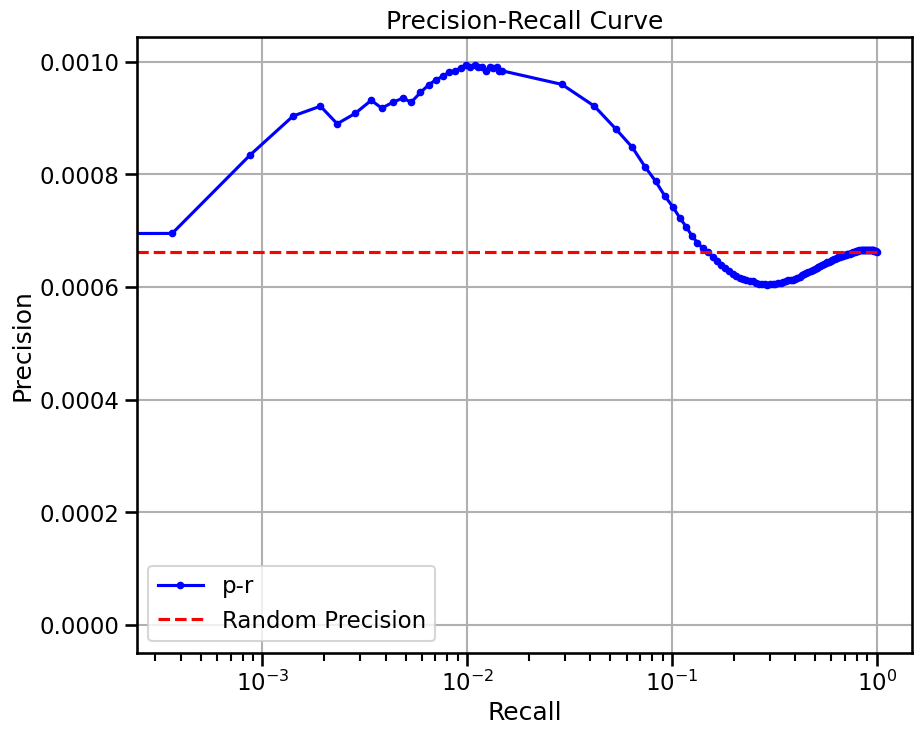


  0%|          | 0/64 [00:00<?, ?it/s]


  2%|▏         | 1/64 [00:02<02:06,  2.01s/it]


  3%|▎         | 2/64 [00:03<01:33,  1.51s/it]


  5%|▍         | 3/64 [00:04<01:21,  1.34s/it]


  6%|▋         | 4/64 [00:05<01:15,  1.26s/it]


  8%|▊         | 5/64 [00:06<01:12,  1.22s/it]


  9%|▉         | 6/64 [00:07<01:09,  1.20s/it]


 11%|█         | 7/64 [00:08<01:05,  1.16s/it]


 12%|█▎        | 8/64 [00:09<01:03,  1.14s/it]


 14%|█▍        | 9/64 [00:10<01:01,  1.11s/it]


 16%|█▌        | 10/64 [00:12<01:00,  1.11s/it]


 17%|█▋        | 11/64 [00:13<00:58,  1.11s/it]


 19%|█▉        | 12/64 [00:14<00:57,  1.11s/it]


 20%|██        | 13/64 [00:15<00:56,  1.11s/it]


 22%|██▏       | 14/64 [00:16<00:55,  1.10s/it]


 23%|██▎       | 15/64 [00:17<00:53,  1.09s/it]


 25%|██▌       | 16/64 [00:18<00:51,  1.08s/it]


 27%|██▋       | 17/64 [00:19<00:49,  1.06s/it]


 28%|██▊       | 18/64 [00:20<00:48,  1.04s/it]


 30%|██▉       | 19/64 [00:21<00:46,  1.04s/it]


 31%|███▏      | 20/64 [00:22<00:45,  1.03s/it]


 33%|███▎      | 21/64 [00:23<00:44,  1.02s/it]


 34%|███▍      | 22/64 [00:24<00:43,  1.03s/it]


 36%|███▌      | 23/64 [00:25<00:41,  1.02s/it]


 38%|███▊      | 24/64 [00:26<00:40,  1.02s/it]


 39%|███▉      | 25/64 [00:27<00:39,  1.02s/it]


 41%|████      | 26/64 [00:28<00:38,  1.02s/it]


 42%|████▏     | 27/64 [00:30<00:40,  1.10s/it]


 44%|████▍     | 28/64 [00:31<00:39,  1.08s/it]


 45%|████▌     | 29/64 [00:32<00:37,  1.07s/it]


 47%|████▋     | 30/64 [00:33<00:35,  1.05s/it]


 48%|████▊     | 31/64 [00:34<00:34,  1.04s/it]


 50%|█████     | 32/64 [00:36<00:41,  1.31s/it]


 52%|█████▏    | 33/64 [00:37<00:38,  1.24s/it]


 53%|█████▎    | 34/64 [00:38<00:36,  1.23s/it]


 55%|█████▍    | 35/64 [00:39<00:35,  1.21s/it]


 56%|█████▋    | 36/64 [00:40<00:32,  1.16s/it]


 58%|█████▊    | 37/64 [00:41<00:30,  1.13s/it]


 59%|█████▉    | 38/64 [00:42<00:28,  1.10s/it]


 61%|██████    | 39/64 [00:43<00:26,  1.08s/it]


 62%|██████▎   | 40/64 [00:44<00:25,  1.05s/it]


 64%|██████▍   | 41/64 [00:45<00:23,  1.04s/it]


 66%|██████▌   | 42/64 [00:46<00:22,  1.03s/it]


 67%|██████▋   | 43/64 [00:47<00:21,  1.02s/it]


 69%|██████▉   | 44/64 [00:48<00:20,  1.03s/it]


 70%|███████   | 45/64 [00:49<00:19,  1.04s/it]


 72%|███████▏  | 46/64 [00:50<00:18,  1.03s/it]


 73%|███████▎  | 47/64 [00:51<00:17,  1.02s/it]


 75%|███████▌  | 48/64 [00:52<00:16,  1.02s/it]


 77%|███████▋  | 49/64 [00:53<00:15,  1.02s/it]


 78%|███████▊  | 50/64 [00:55<00:14,  1.05s/it]


 80%|███████▉  | 51/64 [00:56<00:13,  1.05s/it]


 81%|████████▏ | 52/64 [00:57<00:12,  1.04s/it]


 83%|████████▎ | 53/64 [00:58<00:11,  1.04s/it]


 84%|████████▍ | 54/64 [00:59<00:10,  1.04s/it]


 86%|████████▌ | 55/64 [01:00<00:09,  1.05s/it]


 88%|████████▊ | 56/64 [01:01<00:08,  1.05s/it]


 89%|████████▉ | 57/64 [01:02<00:07,  1.05s/it]


 91%|█████████ | 58/64 [01:03<00:06,  1.05s/it]


 92%|█████████▏| 59/64 [01:04<00:05,  1.05s/it]


 94%|█████████▍| 60/64 [01:05<00:04,  1.05s/it]


 95%|█████████▌| 61/64 [01:06<00:03,  1.03s/it]


 97%|█████████▋| 62/64 [01:07<00:02,  1.03s/it]


 98%|█████████▊| 63/64 [01:08<00:01,  1.02s/it]


100%|██████████| 64/64 [01:09<00:00,  1.04s/it]


100%|██████████| 64/64 [01:09<00:00,  1.09s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


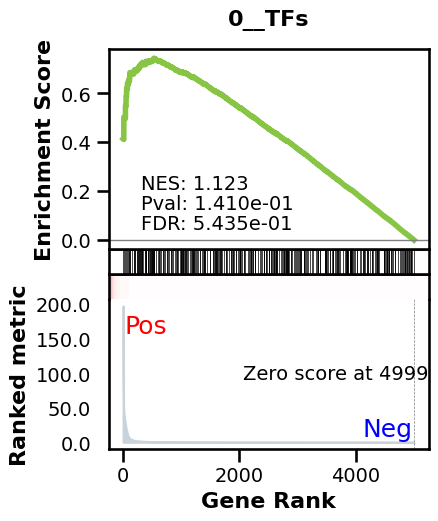

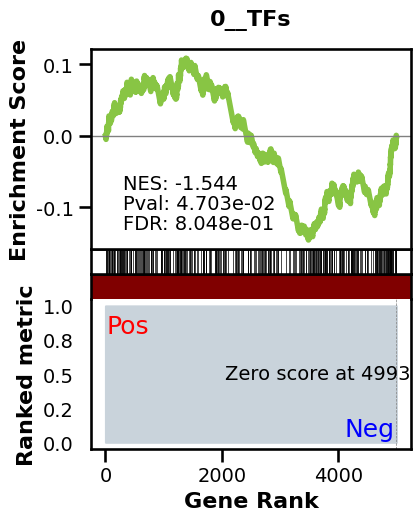

_________________________________________
TF specific enrichment


found some significant results for  36.111111111111114 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0012460602944679446 
recall:  1.0 
random precision: 0.0012464244266404952



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:02, 60.34it/s]


 11%|█         | 14/128 [00:00<00:01, 60.43it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.55it/s]


 22%|██▏       | 28/128 [00:00<00:01, 60.19it/s]


 27%|██▋       | 35/128 [00:00<00:01, 59.85it/s]


 32%|███▏      | 41/128 [00:00<00:01, 59.84it/s]


 38%|███▊      | 48/128 [00:00<00:01, 60.00it/s]


 43%|████▎     | 55/128 [00:00<00:01, 60.05it/s]


 48%|████▊     | 62/128 [00:01<00:01, 59.96it/s]


 54%|█████▍    | 69/128 [00:01<00:00, 59.99it/s]


 59%|█████▉    | 76/128 [00:01<00:00, 60.11it/s]


 65%|██████▍   | 83/128 [00:01<00:00, 60.11it/s]


 70%|███████   | 90/128 [00:01<00:00, 60.10it/s]


 76%|███████▌  | 97/128 [00:01<00:00, 60.09it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 60.01it/s]


 87%|████████▋ | 111/128 [00:01<00:00, 60.02it/s]


 92%|█████████▏| 118/128 [00:01<00:00, 60.18it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 60.05it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.01it/s]

Average Precision (AP):  0.0015192777840916832
Area Under Precision-Recall Curve (AUPRC):  0.0015184143620270468


EPR: 0.5488993418929374


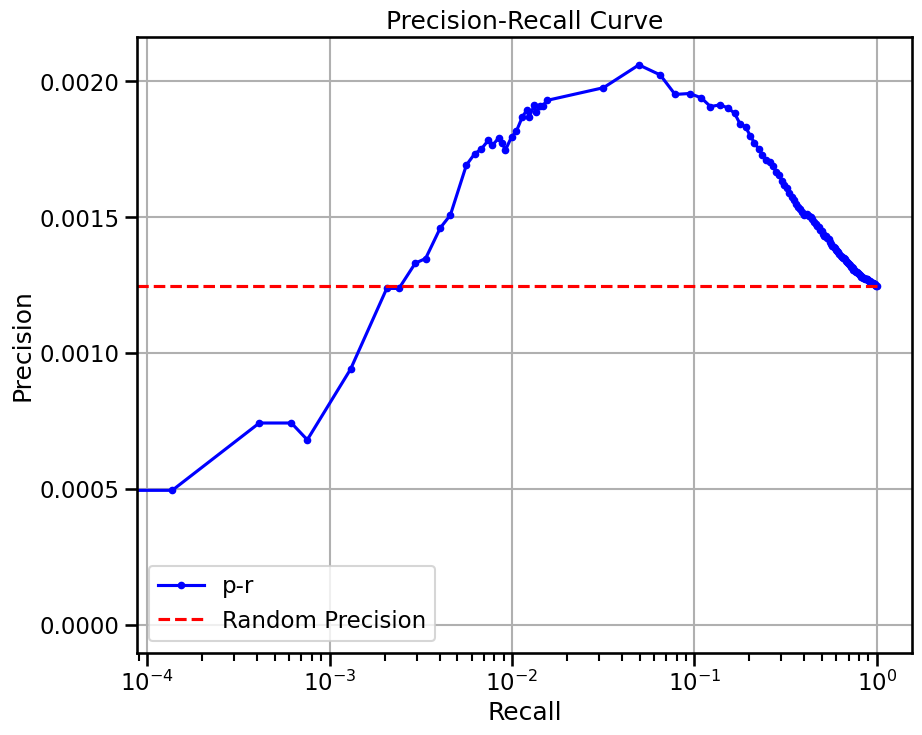

base enrichment


Top central genes: []


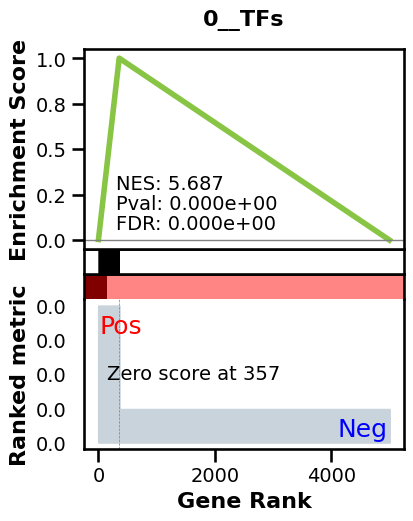

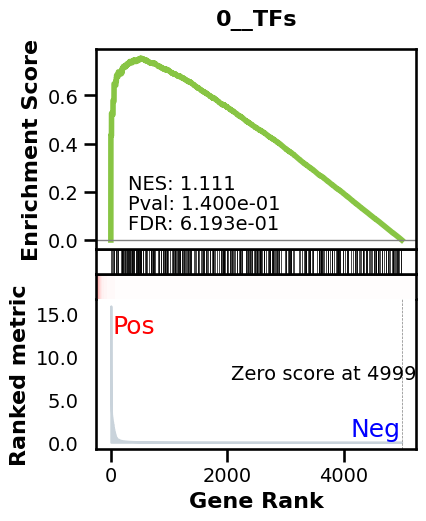

_________________________________________
TF specific enrichment


found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.009027741976136058 
recall:  0.6476712328767124 
random precision: 0.0012464244266404952



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.90it/s]


  9%|▉         | 12/128 [00:00<00:01, 59.77it/s]


 14%|█▍        | 18/128 [00:00<00:01, 59.73it/s]


 19%|█▉        | 24/128 [00:00<00:01, 59.66it/s]


 23%|██▎       | 30/128 [00:00<00:01, 59.41it/s]


 28%|██▊       | 36/128 [00:00<00:01, 59.20it/s]


 33%|███▎      | 42/128 [00:00<00:01, 59.31it/s]


 38%|███▊      | 48/128 [00:00<00:01, 59.46it/s]


 42%|████▏     | 54/128 [00:00<00:01, 59.57it/s]


 47%|████▋     | 60/128 [00:01<00:01, 59.60it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 59.62it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 59.51it/s]


 61%|██████    | 78/128 [00:01<00:00, 59.58it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 59.61it/s]


 70%|███████   | 90/128 [00:01<00:00, 59.72it/s]


 76%|███████▌  | 97/128 [00:01<00:00, 59.89it/s]


 80%|████████  | 103/128 [00:01<00:00, 59.70it/s]


 85%|████████▌ | 109/128 [00:01<00:00, 59.70it/s]


 90%|████████▉ | 115/128 [00:01<00:00, 59.74it/s]


 95%|█████████▌| 122/128 [00:02<00:00, 59.85it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.66it/s]


100%|██████████| 128/128 [00:02<00:00, 59.61it/s]

Average Precision (AP):  0.00852972022040066
Area Under Precision-Recall Curve (AUPRC):  0.008093870891582944
EPR: 13.950869909410002


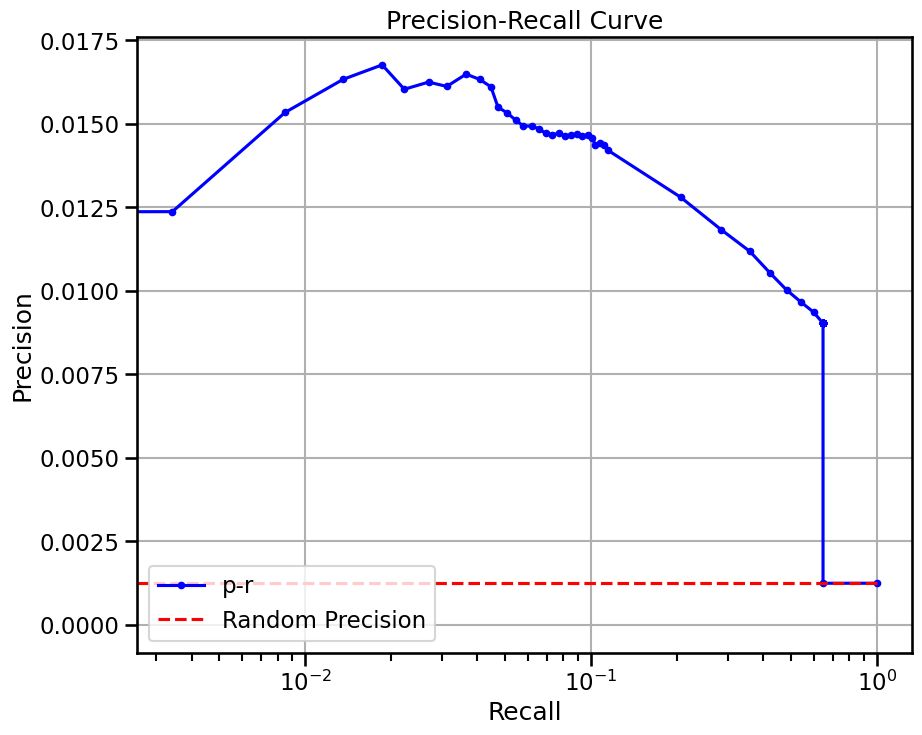

true elem 14600 ...


doing classification....


metrics {'used_heads': 7, 'precision': 0.0012686770340012274, 'random_precision': 0.0012686770340012274, 'recall': 1.0, 'predicted_true': 4686772.0, 'number_of_true': 5946.0}


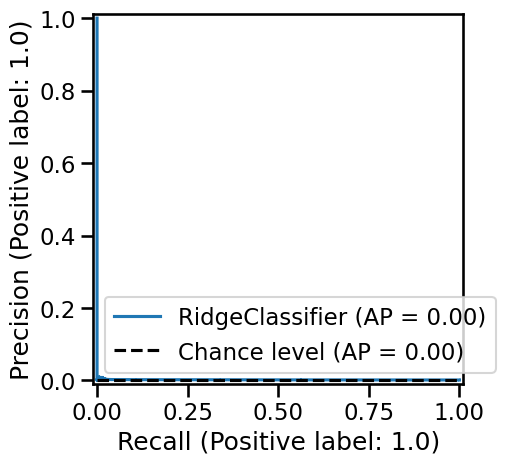

base enrichment


Top central genes: []
The DataFrame contains only the same values.


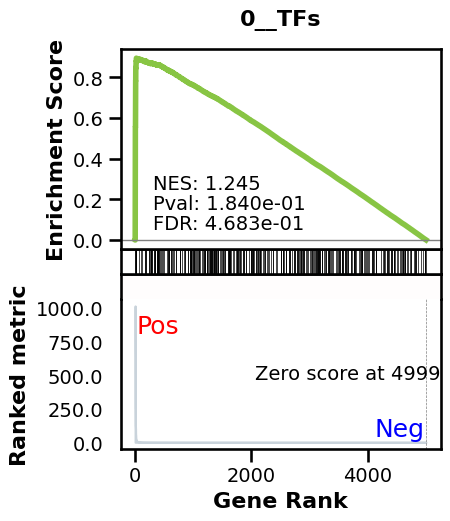

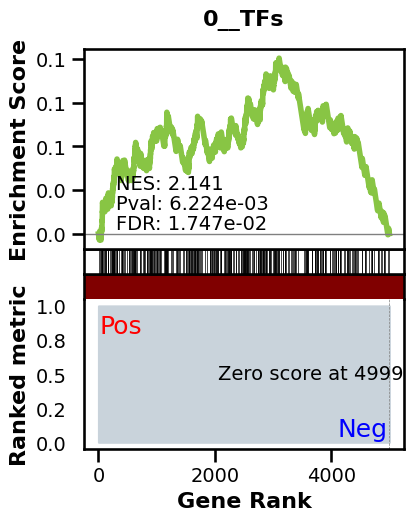

_________________________________________
TF specific enrichment


found some significant results for  30.555555555555557 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0012460602944679446 
recall:  1.0 
random precision: 0.0012464244266404952



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.24it/s]


  9%|▉         | 12/128 [00:00<00:01, 59.34it/s]


 14%|█▍        | 18/128 [00:00<00:01, 59.48it/s]


 19%|█▉        | 24/128 [00:00<00:01, 59.52it/s]


 23%|██▎       | 30/128 [00:00<00:01, 59.44it/s]


 28%|██▊       | 36/128 [00:00<00:01, 59.50it/s]


 33%|███▎      | 42/128 [00:00<00:01, 59.53it/s]


 38%|███▊      | 48/128 [00:00<00:01, 59.52it/s]


 42%|████▏     | 54/128 [00:00<00:01, 59.49it/s]


 47%|████▋     | 60/128 [00:01<00:01, 59.53it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 59.57it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 59.54it/s]


 61%|██████    | 78/128 [00:01<00:00, 59.56it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 59.58it/s]


 70%|███████   | 90/128 [00:01<00:00, 59.60it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 59.61it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 59.55it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 59.62it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 59.63it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 59.45it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 59.49it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.48it/s]

Average Precision (AP):  0.0017462810828379612
Area Under Precision-Recall Curve (AUPRC):  0.0017407140265040637


EPR: 7.027502584336947


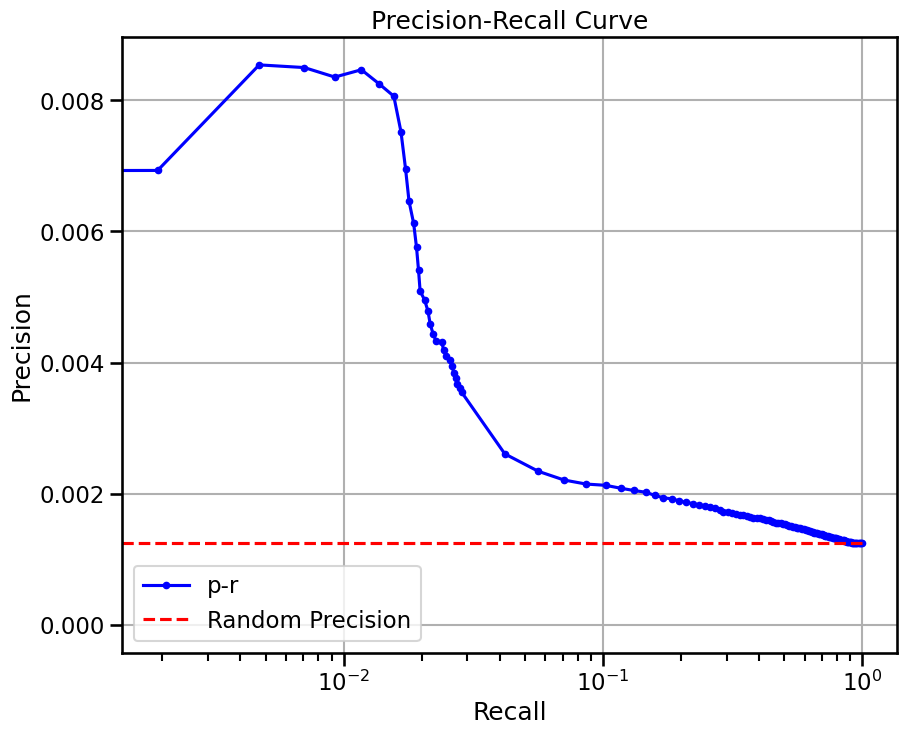

base enrichment


Top central genes: []


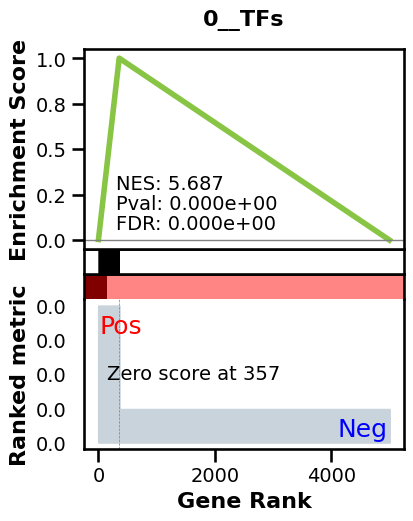

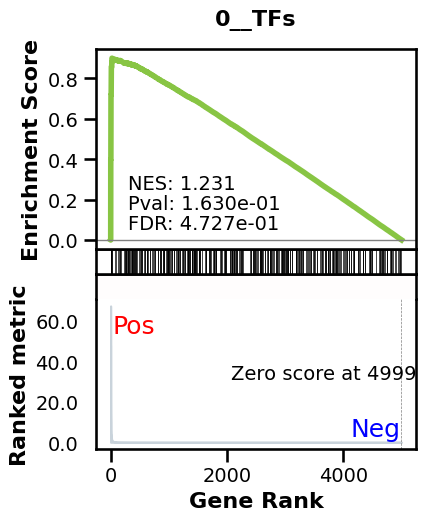

_________________________________________
TF specific enrichment


found some significant results for  2.7777777777777777 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.009027741976136058 
recall:  0.6476712328767124 
random precision: 0.0012464244266404952



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 58.48it/s]


  9%|▉         | 12/128 [00:00<00:01, 58.90it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.92it/s]


 19%|█▉        | 24/128 [00:00<00:01, 58.91it/s]


 23%|██▎       | 30/128 [00:00<00:01, 58.91it/s]


 28%|██▊       | 36/128 [00:00<00:01, 58.88it/s]


 33%|███▎      | 42/128 [00:00<00:01, 58.90it/s]


 38%|███▊      | 48/128 [00:00<00:01, 58.84it/s]


 42%|████▏     | 54/128 [00:00<00:01, 58.91it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.87it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.95it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.94it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.90it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.89it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.92it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.83it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.85it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.97it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 59.01it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 59.01it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 59.04it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 58.88it/s]

Average Precision (AP):  0.009451269272513947
Area Under Precision-Recall Curve (AUPRC):  0.008563912456559124
EPR: 19.236082396586863


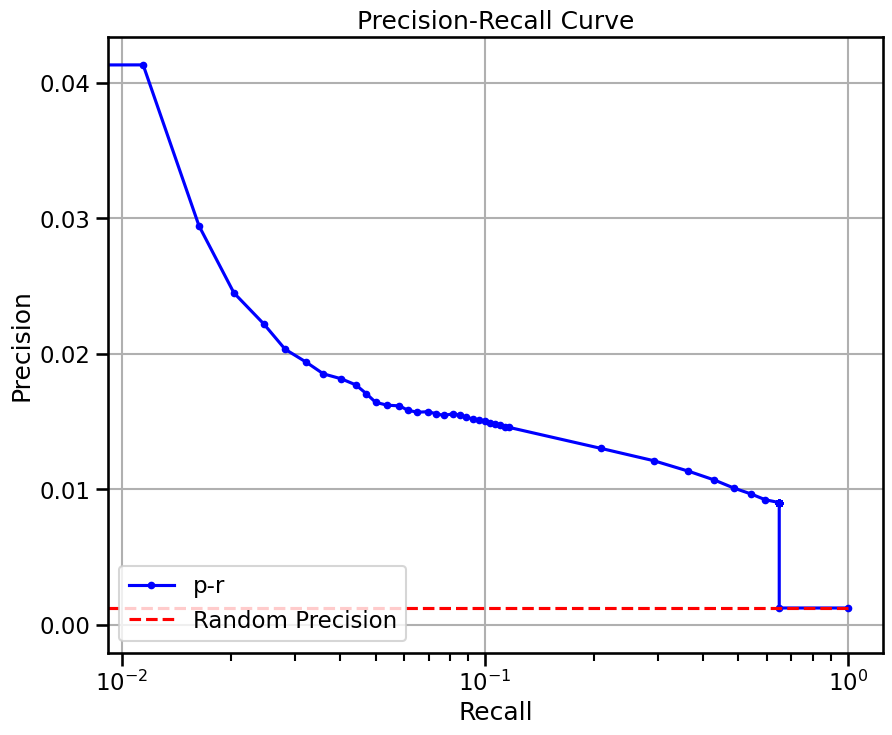


  0%|          | 0/25 [00:00<?, ?it/s]


  4%|▍         | 1/25 [00:02<00:58,  2.43s/it]


  8%|▊         | 2/25 [00:03<00:33,  1.45s/it]


 12%|█▏        | 3/25 [00:03<00:24,  1.13s/it]


 16%|█▌        | 4/25 [00:04<00:20,  1.01it/s]


 20%|██        | 5/25 [00:05<00:18,  1.10it/s]


 24%|██▍       | 6/25 [00:06<00:16,  1.15it/s]


 28%|██▊       | 7/25 [00:07<00:14,  1.21it/s]


 32%|███▏      | 8/25 [00:07<00:13,  1.24it/s]


 36%|███▌      | 9/25 [00:08<00:12,  1.27it/s]


 40%|████      | 10/25 [00:09<00:11,  1.28it/s]


 44%|████▍     | 11/25 [00:10<00:10,  1.30it/s]


 48%|████▊     | 12/25 [00:10<00:09,  1.31it/s]


 52%|█████▏    | 13/25 [00:11<00:09,  1.31it/s]


 56%|█████▌    | 14/25 [00:12<00:08,  1.32it/s]


 60%|██████    | 15/25 [00:13<00:07,  1.32it/s]


 64%|██████▍   | 16/25 [00:13<00:06,  1.29it/s]


 68%|██████▊   | 17/25 [00:14<00:06,  1.31it/s]


 72%|███████▏  | 18/25 [00:15<00:05,  1.28it/s]


 76%|███████▌  | 19/25 [00:16<00:04,  1.30it/s]


 80%|████████  | 20/25 [00:16<00:03,  1.30it/s]


 84%|████████▍ | 21/25 [00:17<00:03,  1.31it/s]


 88%|████████▊ | 22/25 [00:18<00:02,  1.32it/s]


 92%|█████████▏| 23/25 [00:19<00:01,  1.32it/s]


 96%|█████████▌| 24/25 [00:19<00:00,  1.32it/s]


100%|██████████| 25/25 [00:20<00:00,  1.42it/s]


100%|██████████| 25/25 [00:20<00:00,  1.21it/s]

avg link count: 535876201, sparsity: 1.0


base enrichment


too many genes for central computation


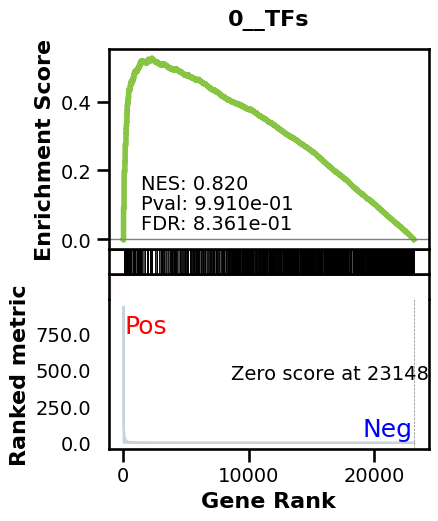

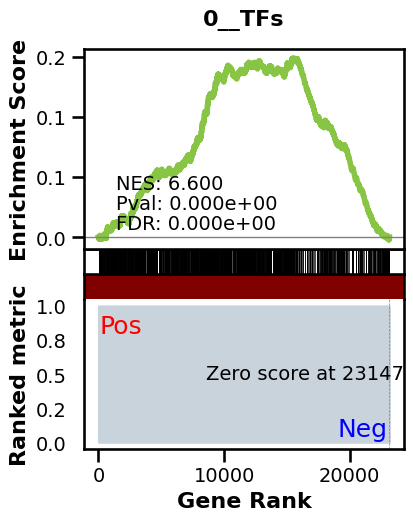

_________________________________________
TF specific enrichment


found some significant results for  58.92857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:37,  3.36it/s]


  2%|▏         | 2/128 [00:00<00:37,  3.35it/s]


  2%|▏         | 3/128 [00:00<00:37,  3.35it/s]


  3%|▎         | 4/128 [00:01<00:37,  3.35it/s]


  4%|▍         | 5/128 [00:01<00:36,  3.35it/s]


  5%|▍         | 6/128 [00:01<00:36,  3.34it/s]


  5%|▌         | 7/128 [00:02<00:36,  3.34it/s]


  6%|▋         | 8/128 [00:02<00:35,  3.34it/s]


  7%|▋         | 9/128 [00:02<00:35,  3.34it/s]


  8%|▊         | 10/128 [00:02<00:35,  3.34it/s]


  9%|▊         | 11/128 [00:03<00:35,  3.34it/s]


  9%|▉         | 12/128 [00:03<00:34,  3.34it/s]


 10%|█         | 13/128 [00:03<00:34,  3.34it/s]


 11%|█         | 14/128 [00:04<00:34,  3.35it/s]


 12%|█▏        | 15/128 [00:04<00:33,  3.35it/s]


 12%|█▎        | 16/128 [00:04<00:33,  3.35it/s]


 13%|█▎        | 17/128 [00:05<00:33,  3.35it/s]


 14%|█▍        | 18/128 [00:05<00:32,  3.35it/s]


 15%|█▍        | 19/128 [00:05<00:32,  3.35it/s]


 16%|█▌        | 20/128 [00:05<00:32,  3.34it/s]


 16%|█▋        | 21/128 [00:06<00:31,  3.34it/s]


 17%|█▋        | 22/128 [00:06<00:31,  3.35it/s]


 18%|█▊        | 23/128 [00:06<00:31,  3.35it/s]


 19%|█▉        | 24/128 [00:07<00:31,  3.35it/s]


 20%|█▉        | 25/128 [00:07<00:30,  3.35it/s]


 20%|██        | 26/128 [00:07<00:30,  3.35it/s]


 21%|██        | 27/128 [00:08<00:30,  3.35it/s]


 22%|██▏       | 28/128 [00:08<00:29,  3.35it/s]


 23%|██▎       | 29/128 [00:08<00:29,  3.34it/s]


 23%|██▎       | 30/128 [00:08<00:29,  3.34it/s]


 24%|██▍       | 31/128 [00:09<00:29,  3.34it/s]


 25%|██▌       | 32/128 [00:09<00:28,  3.34it/s]


 26%|██▌       | 33/128 [00:09<00:28,  3.34it/s]


 27%|██▋       | 34/128 [00:10<00:28,  3.34it/s]


 27%|██▋       | 35/128 [00:10<00:27,  3.34it/s]


 28%|██▊       | 36/128 [00:10<00:27,  3.34it/s]


 29%|██▉       | 37/128 [00:11<00:27,  3.34it/s]


 30%|██▉       | 38/128 [00:11<00:26,  3.35it/s]


 30%|███       | 39/128 [00:11<00:26,  3.34it/s]


 31%|███▏      | 40/128 [00:11<00:26,  3.34it/s]


 32%|███▏      | 41/128 [00:12<00:26,  3.34it/s]


 33%|███▎      | 42/128 [00:12<00:25,  3.34it/s]


 34%|███▎      | 43/128 [00:12<00:25,  3.34it/s]


 34%|███▍      | 44/128 [00:13<00:25,  3.35it/s]


 35%|███▌      | 45/128 [00:13<00:24,  3.35it/s]


 36%|███▌      | 46/128 [00:13<00:24,  3.35it/s]


 37%|███▋      | 47/128 [00:14<00:24,  3.34it/s]


 38%|███▊      | 48/128 [00:14<00:23,  3.35it/s]


 38%|███▊      | 49/128 [00:14<00:23,  3.35it/s]


 39%|███▉      | 50/128 [00:14<00:23,  3.35it/s]


 40%|███▉      | 51/128 [00:15<00:23,  3.35it/s]


 41%|████      | 52/128 [00:15<00:22,  3.35it/s]


 41%|████▏     | 53/128 [00:15<00:22,  3.34it/s]


 42%|████▏     | 54/128 [00:16<00:22,  3.34it/s]


 43%|████▎     | 55/128 [00:16<00:21,  3.34it/s]


 44%|████▍     | 56/128 [00:16<00:21,  3.34it/s]


 45%|████▍     | 57/128 [00:17<00:21,  3.34it/s]


 45%|████▌     | 58/128 [00:17<00:20,  3.34it/s]


 46%|████▌     | 59/128 [00:17<00:20,  3.34it/s]


 47%|████▋     | 60/128 [00:17<00:20,  3.34it/s]


 48%|████▊     | 61/128 [00:18<00:20,  3.35it/s]


 48%|████▊     | 62/128 [00:18<00:19,  3.35it/s]


 49%|████▉     | 63/128 [00:18<00:19,  3.34it/s]


 50%|█████     | 64/128 [00:19<00:19,  3.34it/s]


 51%|█████     | 65/128 [00:19<00:18,  3.34it/s]


 52%|█████▏    | 66/128 [00:19<00:18,  3.34it/s]


 52%|█████▏    | 67/128 [00:20<00:18,  3.34it/s]


 53%|█████▎    | 68/128 [00:20<00:17,  3.34it/s]


 54%|█████▍    | 69/128 [00:20<00:17,  3.34it/s]


 55%|█████▍    | 70/128 [00:20<00:17,  3.34it/s]


 55%|█████▌    | 71/128 [00:21<00:17,  3.34it/s]


 56%|█████▋    | 72/128 [00:21<00:16,  3.34it/s]


 57%|█████▋    | 73/128 [00:21<00:16,  3.34it/s]


 58%|█████▊    | 74/128 [00:22<00:16,  3.35it/s]


 59%|█████▊    | 75/128 [00:22<00:15,  3.35it/s]


 59%|█████▉    | 76/128 [00:22<00:15,  3.34it/s]


 60%|██████    | 77/128 [00:23<00:15,  3.34it/s]


 61%|██████    | 78/128 [00:23<00:14,  3.34it/s]


 62%|██████▏   | 79/128 [00:23<00:14,  3.35it/s]


 62%|██████▎   | 80/128 [00:23<00:14,  3.34it/s]


 63%|██████▎   | 81/128 [00:24<00:14,  3.34it/s]


 64%|██████▍   | 82/128 [00:24<00:13,  3.34it/s]


 65%|██████▍   | 83/128 [00:24<00:13,  3.34it/s]


 66%|██████▌   | 84/128 [00:25<00:13,  3.34it/s]


 66%|██████▋   | 85/128 [00:25<00:12,  3.34it/s]


 67%|██████▋   | 86/128 [00:25<00:12,  3.35it/s]


 68%|██████▊   | 87/128 [00:26<00:12,  3.34it/s]


 69%|██████▉   | 88/128 [00:26<00:11,  3.34it/s]


 70%|██████▉   | 89/128 [00:26<00:11,  3.34it/s]


 70%|███████   | 90/128 [00:26<00:11,  3.34it/s]


 71%|███████   | 91/128 [00:27<00:11,  3.34it/s]


 72%|███████▏  | 92/128 [00:27<00:10,  3.34it/s]


 73%|███████▎  | 93/128 [00:27<00:10,  3.35it/s]


 73%|███████▎  | 94/128 [00:28<00:10,  3.35it/s]


 74%|███████▍  | 95/128 [00:28<00:09,  3.35it/s]


 75%|███████▌  | 96/128 [00:28<00:09,  3.35it/s]


 76%|███████▌  | 97/128 [00:29<00:09,  3.35it/s]


 77%|███████▋  | 98/128 [00:29<00:08,  3.35it/s]


 77%|███████▋  | 99/128 [00:29<00:08,  3.35it/s]


 78%|███████▊  | 100/128 [00:29<00:08,  3.34it/s]


 79%|███████▉  | 101/128 [00:30<00:08,  3.35it/s]


 80%|███████▉  | 102/128 [00:30<00:07,  3.35it/s]


 80%|████████  | 103/128 [00:30<00:07,  3.34it/s]


 81%|████████▏ | 104/128 [00:31<00:07,  3.34it/s]


 82%|████████▏ | 105/128 [00:31<00:06,  3.34it/s]


 83%|████████▎ | 106/128 [00:31<00:06,  3.34it/s]


 84%|████████▎ | 107/128 [00:32<00:06,  3.34it/s]


 84%|████████▍ | 108/128 [00:32<00:05,  3.34it/s]


 85%|████████▌ | 109/128 [00:32<00:05,  3.35it/s]


 86%|████████▌ | 110/128 [00:32<00:05,  3.35it/s]


 87%|████████▋ | 111/128 [00:33<00:05,  3.34it/s]


 88%|████████▊ | 112/128 [00:33<00:04,  3.35it/s]


 88%|████████▊ | 113/128 [00:33<00:04,  3.35it/s]


 89%|████████▉ | 114/128 [00:34<00:04,  3.34it/s]


 90%|████████▉ | 115/128 [00:34<00:03,  3.34it/s]


 91%|█████████ | 116/128 [00:34<00:03,  3.35it/s]


 91%|█████████▏| 117/128 [00:34<00:03,  3.35it/s]


 92%|█████████▏| 118/128 [00:35<00:02,  3.34it/s]


 93%|█████████▎| 119/128 [00:35<00:02,  3.35it/s]


 94%|█████████▍| 120/128 [00:35<00:02,  3.34it/s]


 95%|█████████▍| 121/128 [00:36<00:02,  3.34it/s]


 95%|█████████▌| 122/128 [00:36<00:01,  3.34it/s]


 96%|█████████▌| 123/128 [00:36<00:01,  3.35it/s]


 97%|█████████▋| 124/128 [00:37<00:01,  3.34it/s]


 98%|█████████▊| 125/128 [00:37<00:00,  3.35it/s]


 98%|█████████▊| 126/128 [00:37<00:00,  3.35it/s]


 99%|█████████▉| 127/128 [00:37<00:00,  3.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:38<00:00,  3.34it/s]


100%|██████████| 128/128 [00:38<00:00,  3.34it/s]

Average Precision (AP):  0.0007016778326159942
Area Under Precision-Recall Curve (AUPRC):  0.0007015419484264167


EPR: 1.2152909523460125


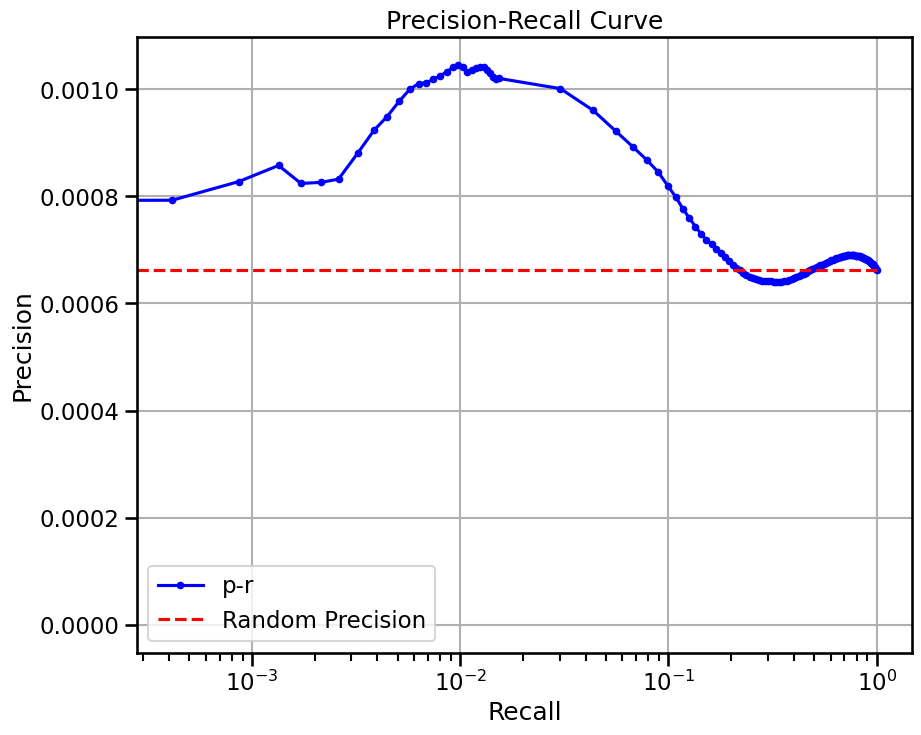


  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:02<01:48,  2.22s/it]


  4%|▍         | 2/50 [00:03<01:15,  1.57s/it]


  6%|▌         | 3/50 [00:04<01:03,  1.36s/it]


  8%|▊         | 4/50 [00:05<00:57,  1.26s/it]


 10%|█         | 5/50 [00:06<00:53,  1.20s/it]


 12%|█▏        | 6/50 [00:07<00:51,  1.16s/it]


 14%|█▍        | 7/50 [00:08<00:48,  1.14s/it]


 16%|█▌        | 8/50 [00:09<00:46,  1.12s/it]


 18%|█▊        | 9/50 [00:10<00:45,  1.10s/it]


 20%|██        | 10/50 [00:12<00:43,  1.09s/it]


 22%|██▏       | 11/50 [00:13<00:42,  1.08s/it]


 24%|██▍       | 12/50 [00:14<00:40,  1.07s/it]


 26%|██▌       | 13/50 [00:15<00:39,  1.07s/it]


 28%|██▊       | 14/50 [00:16<00:38,  1.07s/it]


 30%|███       | 15/50 [00:17<00:37,  1.07s/it]


 32%|███▏      | 16/50 [00:18<00:36,  1.06s/it]


 34%|███▍      | 17/50 [00:19<00:34,  1.06s/it]


 36%|███▌      | 18/50 [00:20<00:33,  1.06s/it]


 38%|███▊      | 19/50 [00:21<00:32,  1.05s/it]


 40%|████      | 20/50 [00:22<00:31,  1.03s/it]


 42%|████▏     | 21/50 [00:23<00:29,  1.03s/it]


 44%|████▍     | 22/50 [00:24<00:28,  1.02s/it]


 46%|████▌     | 23/50 [00:25<00:27,  1.01s/it]


 48%|████▊     | 24/50 [00:26<00:26,  1.01s/it]


 50%|█████     | 25/50 [00:27<00:25,  1.00s/it]


 52%|█████▏    | 26/50 [00:28<00:24,  1.00s/it]


 54%|█████▍    | 27/50 [00:29<00:23,  1.00s/it]


 56%|█████▌    | 28/50 [00:30<00:22,  1.00s/it]


 58%|█████▊    | 29/50 [00:31<00:21,  1.00s/it]


 60%|██████    | 30/50 [00:32<00:20,  1.00s/it]


 62%|██████▏   | 31/50 [00:33<00:19,  1.00s/it]


 64%|██████▍   | 32/50 [00:34<00:18,  1.00s/it]


 66%|██████▌   | 33/50 [00:35<00:17,  1.00s/it]


 68%|██████▊   | 34/50 [00:36<00:16,  1.00s/it]


 70%|███████   | 35/50 [00:37<00:15,  1.00s/it]


 72%|███████▏  | 36/50 [00:38<00:14,  1.00s/it]


 74%|███████▍  | 37/50 [00:39<00:12,  1.00it/s]


 76%|███████▌  | 38/50 [00:40<00:11,  1.00it/s]


 78%|███████▊  | 39/50 [00:41<00:10,  1.00it/s]


 80%|████████  | 40/50 [00:42<00:09,  1.00it/s]


 82%|████████▏ | 41/50 [00:43<00:08,  1.00it/s]


 84%|████████▍ | 42/50 [00:44<00:07,  1.00it/s]


 86%|████████▌ | 43/50 [00:45<00:06,  1.01it/s]


 88%|████████▊ | 44/50 [00:46<00:05,  1.01it/s]


 90%|█████████ | 45/50 [00:47<00:04,  1.01it/s]


 92%|█████████▏| 46/50 [00:48<00:03,  1.00it/s]


 94%|█████████▍| 47/50 [00:49<00:02,  1.00it/s]


 96%|█████████▌| 48/50 [00:50<00:01,  1.00it/s]


 98%|█████████▊| 49/50 [00:51<00:00,  1.00it/s]


100%|██████████| 50/50 [00:51<00:00,  1.18it/s]


100%|██████████| 50/50 [00:52<00:00,  1.04s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


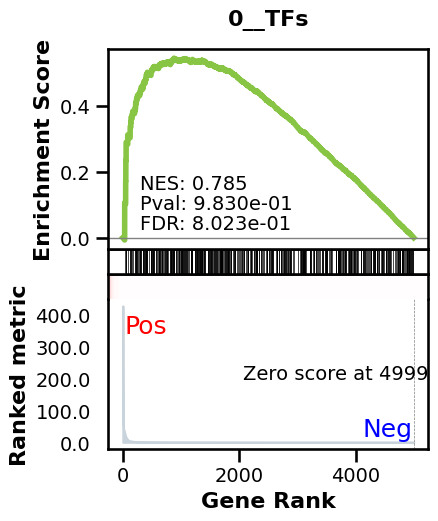

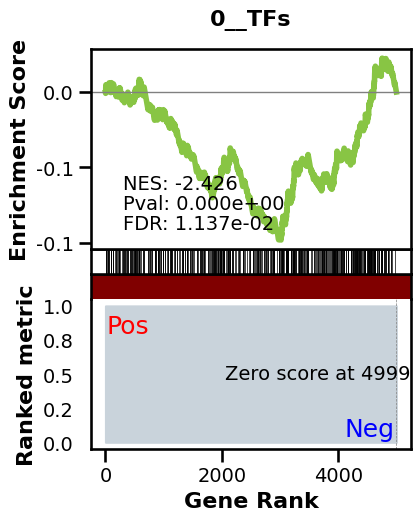

_________________________________________
TF specific enrichment


found some significant results for  21.428571428571427 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.0015901492455931698 
recall:  1.0 
random precision: 0.0015905976802365973



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.56it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.70it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.76it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.79it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.72it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.76it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.57it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.64it/s]


 42%|████▏     | 54/128 [00:01<00:01, 53.64it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.60it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.68it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.67it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.59it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.70it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.72it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.82it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.94it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.87it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.89it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.71it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.73it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.68it/s]

Average Precision (AP):  0.0017632374715720563
Area Under Precision-Recall Curve (AUPRC):  0.0017624301181962806
EPR: 1.2264686850998343


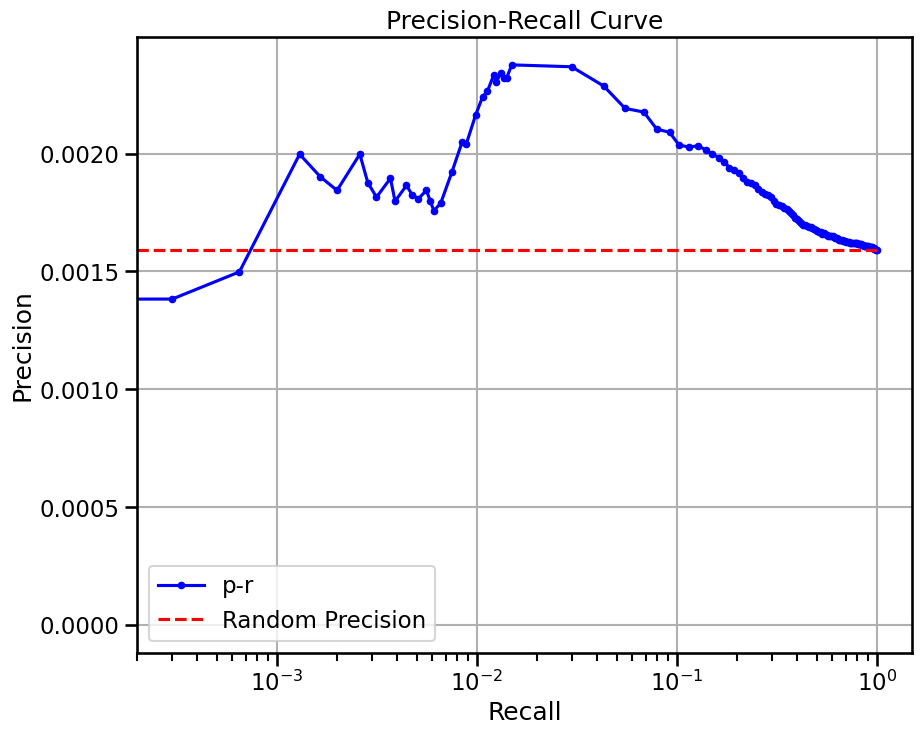

base enrichment


Top central genes: []


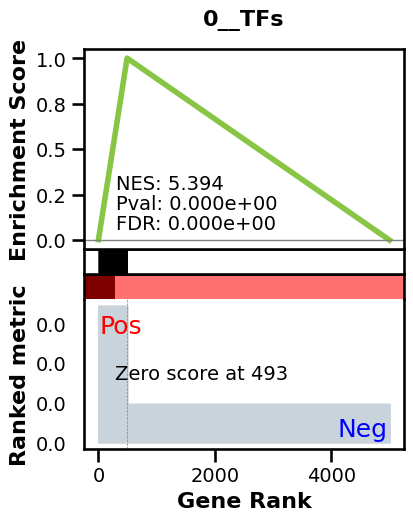

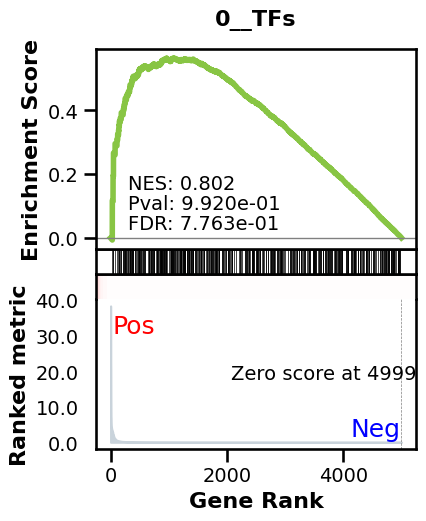

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.006406149061914498 
recall:  0.48725382385284416 
random precision: 0.0015905976802365973



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.56it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.63it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.54it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.33it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.48it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.51it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.48it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.52it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.50it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.47it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.38it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.35it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.35it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.36it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.31it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.41it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.35it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.40it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.35it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.43it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.32it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.39it/s]

Average Precision (AP):  0.00490900382815734
Area Under Precision-Recall Curve (AUPRC):  0.004525645170550714
EPR: 8.22869139176414


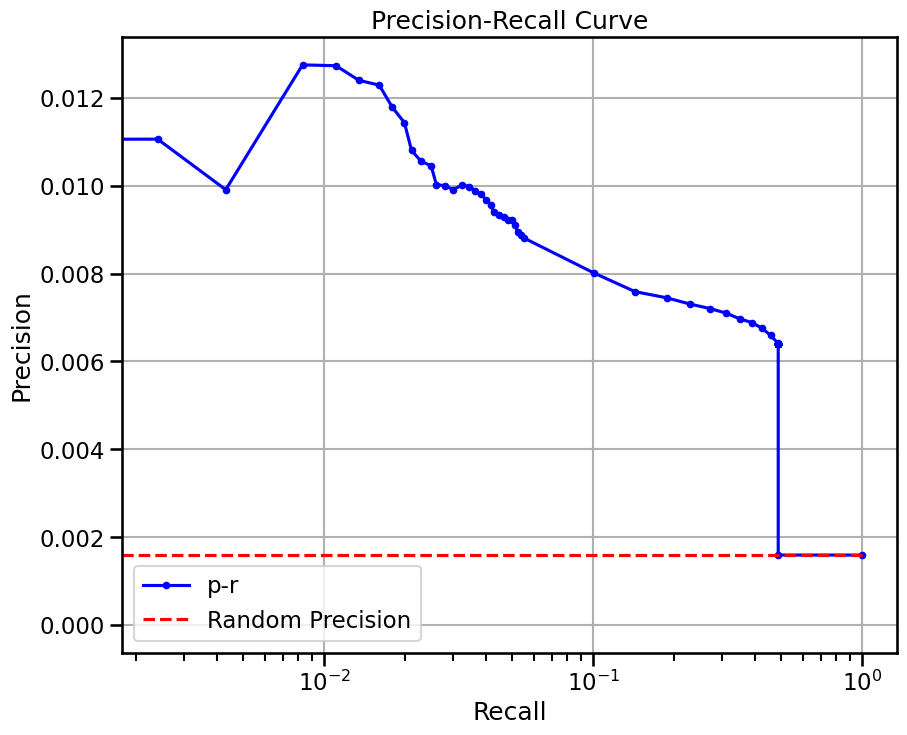

base enrichment


Top central genes: []
The DataFrame contains only the same values.


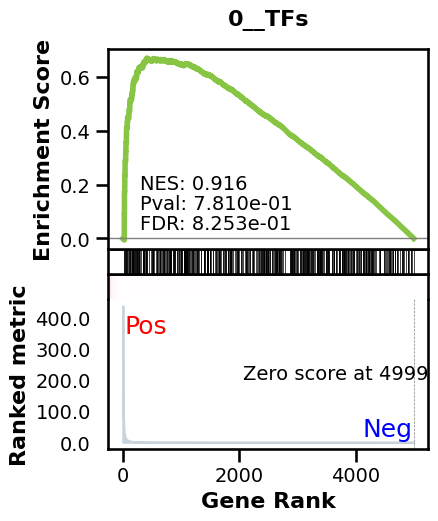

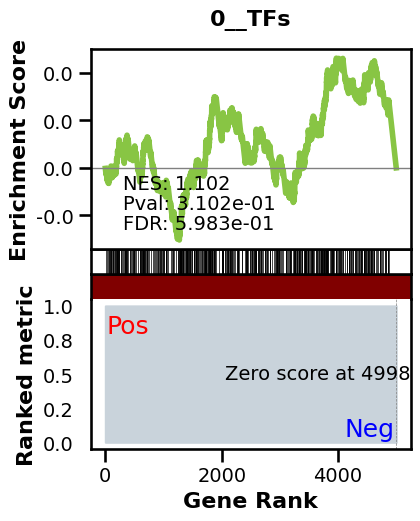

_________________________________________
TF specific enrichment


found some significant results for  33.92857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.0015901492455931698 
recall:  1.0 
random precision: 0.0015905976802365973



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.46it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.43it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.82it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.74it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.56it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.53it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.57it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.70it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.72it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.84it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.96it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.90it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.59it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.52it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.71it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.84it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.83it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.69it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.60it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.53it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.71it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.67it/s]

Average Precision (AP):  0.0018481295446268566
Area Under Precision-Recall Curve (AUPRC):  0.0018469834056235067
EPR: 1.669081111222308


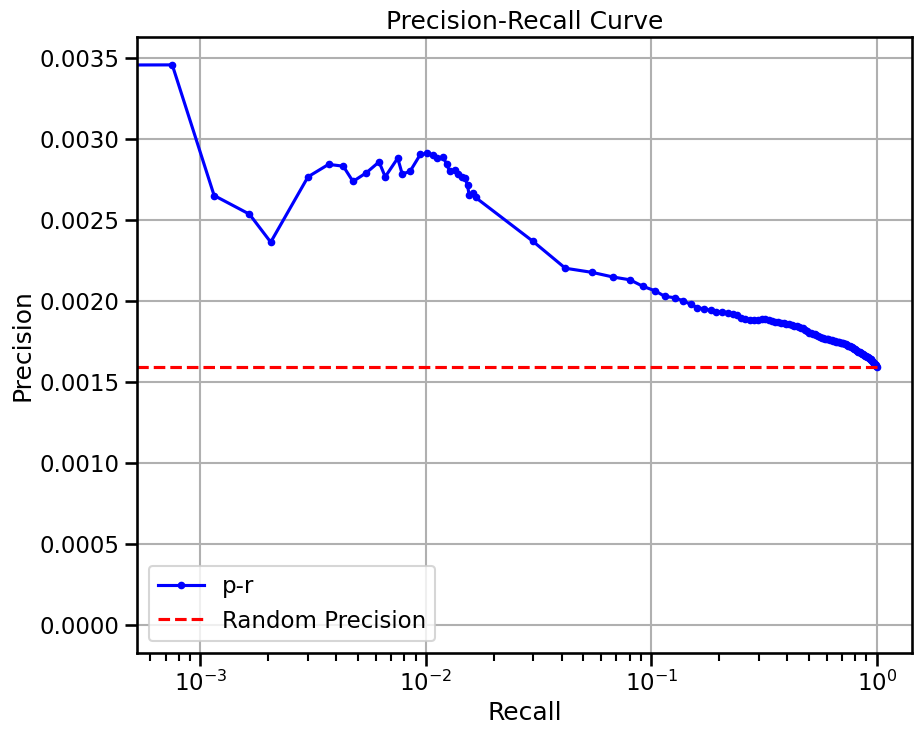

base enrichment


Top central genes: []


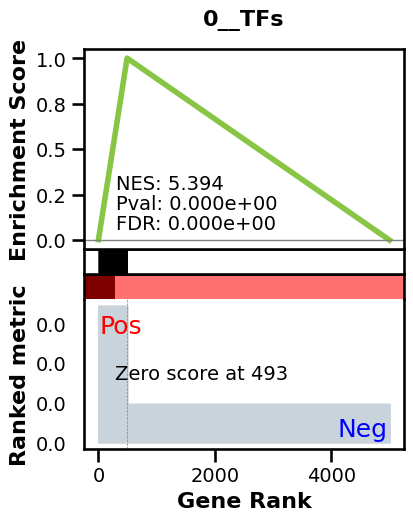

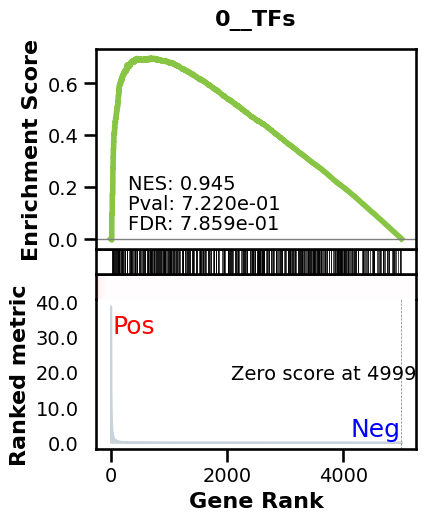

_________________________________________
TF specific enrichment


found some significant results for  8.928571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.006406149061914498 
recall:  0.48725382385284416 
random precision: 0.0015905976802365973



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.82it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.75it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.51it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.29it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.34it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.45it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.61it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.67it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.72it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.73it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.53it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.71it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.95it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.09it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.14it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.11it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.08it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.13it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.15it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.17it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.05it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.83it/s]

Average Precision (AP):  0.0049194454987546475
Area Under Precision-Recall Curve (AUPRC):  0.004507225179973745
EPR: 7.078544418202015


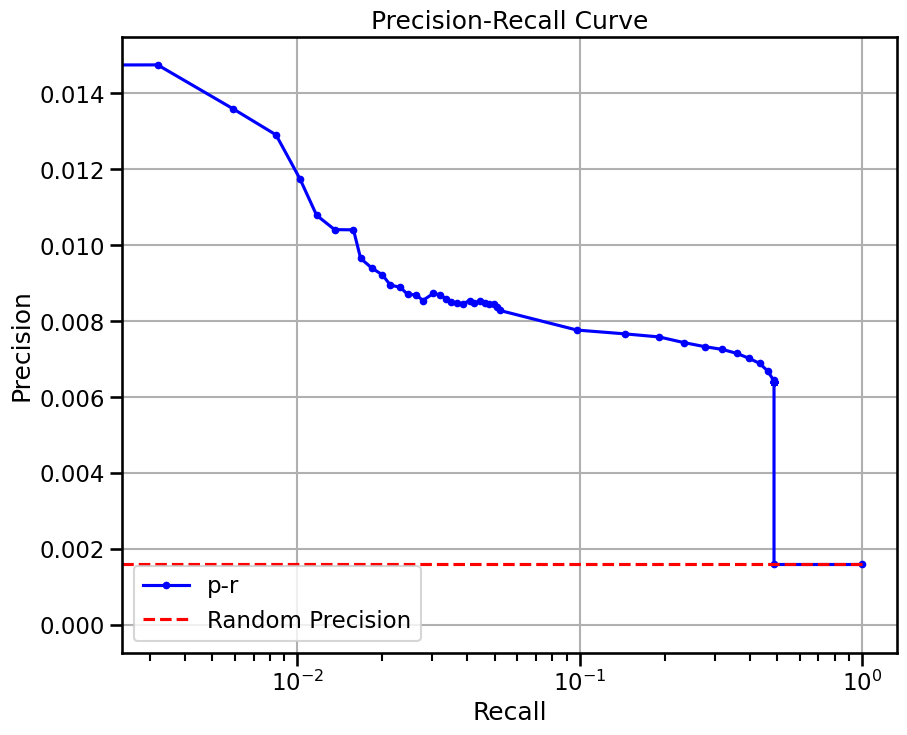


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:01<00:40,  1.94s/it]


  9%|▉         | 2/22 [00:02<00:25,  1.25s/it]


 14%|█▎        | 3/22 [00:03<00:19,  1.03s/it]


 18%|█▊        | 4/22 [00:04<00:16,  1.08it/s]


 23%|██▎       | 5/22 [00:05<00:14,  1.15it/s]


 27%|██▋       | 6/22 [00:05<00:13,  1.19it/s]


 32%|███▏      | 7/22 [00:06<00:12,  1.23it/s]


 36%|███▋      | 8/22 [00:07<00:11,  1.25it/s]


 41%|████      | 9/22 [00:08<00:10,  1.27it/s]


 45%|████▌     | 10/22 [00:08<00:09,  1.28it/s]


 50%|█████     | 11/22 [00:09<00:08,  1.29it/s]


 55%|█████▍    | 12/22 [00:10<00:07,  1.30it/s]


 59%|█████▉    | 13/22 [00:11<00:06,  1.30it/s]


 64%|██████▎   | 14/22 [00:11<00:06,  1.31it/s]


 68%|██████▊   | 15/22 [00:12<00:05,  1.31it/s]


 73%|███████▎  | 16/22 [00:13<00:04,  1.31it/s]


 77%|███████▋  | 17/22 [00:14<00:03,  1.31it/s]


 82%|████████▏ | 18/22 [00:14<00:03,  1.31it/s]


 86%|████████▋ | 19/22 [00:15<00:02,  1.31it/s]


 91%|█████████ | 20/22 [00:16<00:01,  1.31it/s]


 95%|█████████▌| 21/22 [00:17<00:00,  1.31it/s]


100%|██████████| 22/22 [00:17<00:00,  1.50it/s]


100%|██████████| 22/22 [00:17<00:00,  1.23it/s]

avg link count: 535876201, sparsity: 1.0


base enrichment


too many genes for central computation


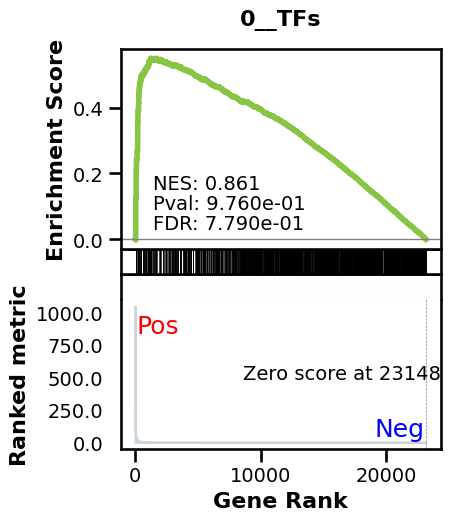

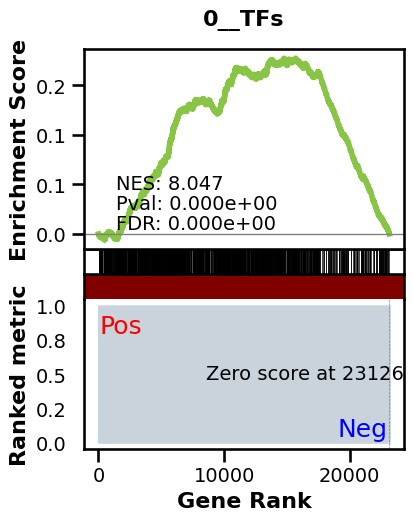

_________________________________________
TF specific enrichment


found some significant results for  52.67857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:40,  3.13it/s]


  2%|▏         | 2/128 [00:00<00:40,  3.13it/s]


  2%|▏         | 3/128 [00:00<00:39,  3.14it/s]


  3%|▎         | 4/128 [00:01<00:39,  3.15it/s]


  4%|▍         | 5/128 [00:01<00:39,  3.15it/s]


  5%|▍         | 6/128 [00:01<00:38,  3.15it/s]


  5%|▌         | 7/128 [00:02<00:38,  3.15it/s]


  6%|▋         | 8/128 [00:02<00:38,  3.16it/s]


  7%|▋         | 9/128 [00:02<00:37,  3.15it/s]


  8%|▊         | 10/128 [00:03<00:37,  3.15it/s]


  9%|▊         | 11/128 [00:03<00:37,  3.15it/s]


  9%|▉         | 12/128 [00:03<00:36,  3.16it/s]


 10%|█         | 13/128 [00:04<00:36,  3.16it/s]


 11%|█         | 14/128 [00:04<00:36,  3.15it/s]


 12%|█▏        | 15/128 [00:04<00:35,  3.16it/s]


 12%|█▎        | 16/128 [00:05<00:35,  3.15it/s]


 13%|█▎        | 17/128 [00:05<00:35,  3.16it/s]


 14%|█▍        | 18/128 [00:05<00:34,  3.16it/s]


 15%|█▍        | 19/128 [00:06<00:34,  3.15it/s]


 16%|█▌        | 20/128 [00:06<00:34,  3.15it/s]


 16%|█▋        | 21/128 [00:06<00:33,  3.15it/s]


 17%|█▋        | 22/128 [00:06<00:33,  3.15it/s]


 18%|█▊        | 23/128 [00:07<00:33,  3.15it/s]


 19%|█▉        | 24/128 [00:07<00:32,  3.15it/s]


 20%|█▉        | 25/128 [00:07<00:32,  3.16it/s]


 20%|██        | 26/128 [00:08<00:32,  3.15it/s]


 21%|██        | 27/128 [00:08<00:32,  3.15it/s]


 22%|██▏       | 28/128 [00:08<00:31,  3.15it/s]


 23%|██▎       | 29/128 [00:09<00:31,  3.16it/s]


 23%|██▎       | 30/128 [00:09<00:31,  3.16it/s]


 24%|██▍       | 31/128 [00:09<00:34,  2.81it/s]


 25%|██▌       | 32/128 [00:10<00:33,  2.90it/s]


 26%|██▌       | 33/128 [00:10<00:31,  2.98it/s]


 27%|██▋       | 34/128 [00:10<00:33,  2.81it/s]


 27%|██▋       | 35/128 [00:11<00:31,  2.94it/s]


 28%|██▊       | 36/128 [00:11<00:30,  3.03it/s]


 29%|██▉       | 37/128 [00:11<00:29,  3.11it/s]


 30%|██▉       | 38/128 [00:12<00:29,  3.02it/s]


 30%|███       | 39/128 [00:12<00:28,  3.12it/s]


 31%|███▏      | 40/128 [00:12<00:27,  3.19it/s]


 32%|███▏      | 41/128 [00:13<00:26,  3.25it/s]


 33%|███▎      | 42/128 [00:13<00:26,  3.29it/s]


 34%|███▎      | 43/128 [00:13<00:25,  3.31it/s]


 34%|███▍      | 44/128 [00:14<00:25,  3.33it/s]


 35%|███▌      | 45/128 [00:14<00:24,  3.35it/s]


 36%|███▌      | 46/128 [00:14<00:24,  3.36it/s]


 37%|███▋      | 47/128 [00:14<00:24,  3.37it/s]


 38%|███▊      | 48/128 [00:15<00:23,  3.37it/s]


 38%|███▊      | 49/128 [00:15<00:23,  3.37it/s]


 39%|███▉      | 50/128 [00:15<00:23,  3.38it/s]


 40%|███▉      | 51/128 [00:16<00:22,  3.38it/s]


 41%|████      | 52/128 [00:16<00:22,  3.38it/s]


 41%|████▏     | 53/128 [00:16<00:22,  3.38it/s]


 42%|████▏     | 54/128 [00:16<00:21,  3.38it/s]


 43%|████▎     | 55/128 [00:17<00:21,  3.39it/s]


 44%|████▍     | 56/128 [00:17<00:21,  3.39it/s]


 45%|████▍     | 57/128 [00:17<00:20,  3.39it/s]


 45%|████▌     | 58/128 [00:18<00:20,  3.38it/s]


 46%|████▌     | 59/128 [00:18<00:20,  3.38it/s]


 47%|████▋     | 60/128 [00:18<00:20,  3.38it/s]


 48%|████▊     | 61/128 [00:19<00:19,  3.38it/s]


 48%|████▊     | 62/128 [00:19<00:19,  3.39it/s]


 49%|████▉     | 63/128 [00:19<00:19,  3.38it/s]


 50%|█████     | 64/128 [00:19<00:18,  3.39it/s]


 51%|█████     | 65/128 [00:20<00:18,  3.39it/s]


 52%|█████▏    | 66/128 [00:20<00:18,  3.39it/s]


 52%|█████▏    | 67/128 [00:20<00:18,  3.38it/s]


 53%|█████▎    | 68/128 [00:21<00:17,  3.39it/s]


 54%|█████▍    | 69/128 [00:21<00:17,  3.40it/s]


 55%|█████▍    | 70/128 [00:21<00:17,  3.40it/s]


 55%|█████▌    | 71/128 [00:22<00:16,  3.40it/s]


 56%|█████▋    | 72/128 [00:22<00:16,  3.40it/s]


 57%|█████▋    | 73/128 [00:22<00:16,  3.40it/s]


 58%|█████▊    | 74/128 [00:22<00:15,  3.39it/s]


 59%|█████▊    | 75/128 [00:23<00:15,  3.39it/s]


 59%|█████▉    | 76/128 [00:23<00:15,  3.40it/s]


 60%|██████    | 77/128 [00:23<00:15,  3.39it/s]


 61%|██████    | 78/128 [00:24<00:14,  3.39it/s]


 62%|██████▏   | 79/128 [00:24<00:14,  3.39it/s]


 62%|██████▎   | 80/128 [00:24<00:14,  3.38it/s]


 63%|██████▎   | 81/128 [00:24<00:13,  3.39it/s]


 64%|██████▍   | 82/128 [00:25<00:13,  3.38it/s]


 65%|██████▍   | 83/128 [00:25<00:13,  3.38it/s]


 66%|██████▌   | 84/128 [00:25<00:13,  3.37it/s]


 66%|██████▋   | 85/128 [00:26<00:12,  3.38it/s]


 67%|██████▋   | 86/128 [00:26<00:12,  3.38it/s]


 68%|██████▊   | 87/128 [00:26<00:12,  3.39it/s]


 69%|██████▉   | 88/128 [00:27<00:11,  3.38it/s]


 70%|██████▉   | 89/128 [00:27<00:11,  3.37it/s]


 70%|███████   | 90/128 [00:27<00:11,  3.38it/s]


 71%|███████   | 91/128 [00:27<00:10,  3.38it/s]


 72%|███████▏  | 92/128 [00:28<00:10,  3.38it/s]


 73%|███████▎  | 93/128 [00:28<00:10,  3.38it/s]


 73%|███████▎  | 94/128 [00:28<00:10,  3.38it/s]


 74%|███████▍  | 95/128 [00:29<00:09,  3.38it/s]


 75%|███████▌  | 96/128 [00:29<00:09,  3.38it/s]


 76%|███████▌  | 97/128 [00:29<00:09,  3.38it/s]


 77%|███████▋  | 98/128 [00:29<00:08,  3.38it/s]


 77%|███████▋  | 99/128 [00:30<00:08,  3.38it/s]


 78%|███████▊  | 100/128 [00:30<00:08,  3.38it/s]


 79%|███████▉  | 101/128 [00:30<00:07,  3.38it/s]


 80%|███████▉  | 102/128 [00:31<00:07,  3.38it/s]


 80%|████████  | 103/128 [00:31<00:07,  3.38it/s]


 81%|████████▏ | 104/128 [00:31<00:07,  3.38it/s]


 82%|████████▏ | 105/128 [00:32<00:06,  3.37it/s]


 83%|████████▎ | 106/128 [00:32<00:06,  3.38it/s]


 84%|████████▎ | 107/128 [00:32<00:06,  3.38it/s]


 84%|████████▍ | 108/128 [00:32<00:05,  3.39it/s]


 85%|████████▌ | 109/128 [00:33<00:05,  3.38it/s]


 86%|████████▌ | 110/128 [00:33<00:05,  3.38it/s]


 87%|████████▋ | 111/128 [00:33<00:05,  3.37it/s]


 88%|████████▊ | 112/128 [00:34<00:04,  3.37it/s]


 88%|████████▊ | 113/128 [00:34<00:04,  3.38it/s]


 89%|████████▉ | 114/128 [00:34<00:04,  3.38it/s]


 90%|████████▉ | 115/128 [00:35<00:03,  3.38it/s]


 91%|█████████ | 116/128 [00:35<00:03,  3.38it/s]


 91%|█████████▏| 117/128 [00:35<00:03,  3.38it/s]


 92%|█████████▏| 118/128 [00:35<00:02,  3.38it/s]


 93%|█████████▎| 119/128 [00:36<00:02,  3.38it/s]


 94%|█████████▍| 120/128 [00:36<00:02,  3.38it/s]


 95%|█████████▍| 121/128 [00:36<00:02,  3.38it/s]


 95%|█████████▌| 122/128 [00:37<00:01,  3.38it/s]


 96%|█████████▌| 123/128 [00:37<00:01,  3.38it/s]


 97%|█████████▋| 124/128 [00:37<00:01,  3.38it/s]


 98%|█████████▊| 125/128 [00:37<00:00,  3.38it/s]


 98%|█████████▊| 126/128 [00:38<00:00,  3.38it/s]


 99%|█████████▉| 127/128 [00:38<00:00,  3.38it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:38<00:00,  3.37it/s]


100%|██████████| 128/128 [00:38<00:00,  3.29it/s]

Average Precision (AP):  0.0006777739939463059
Area Under Precision-Recall Curve (AUPRC):  0.0006777134391478622


EPR: 1.1604639505621528


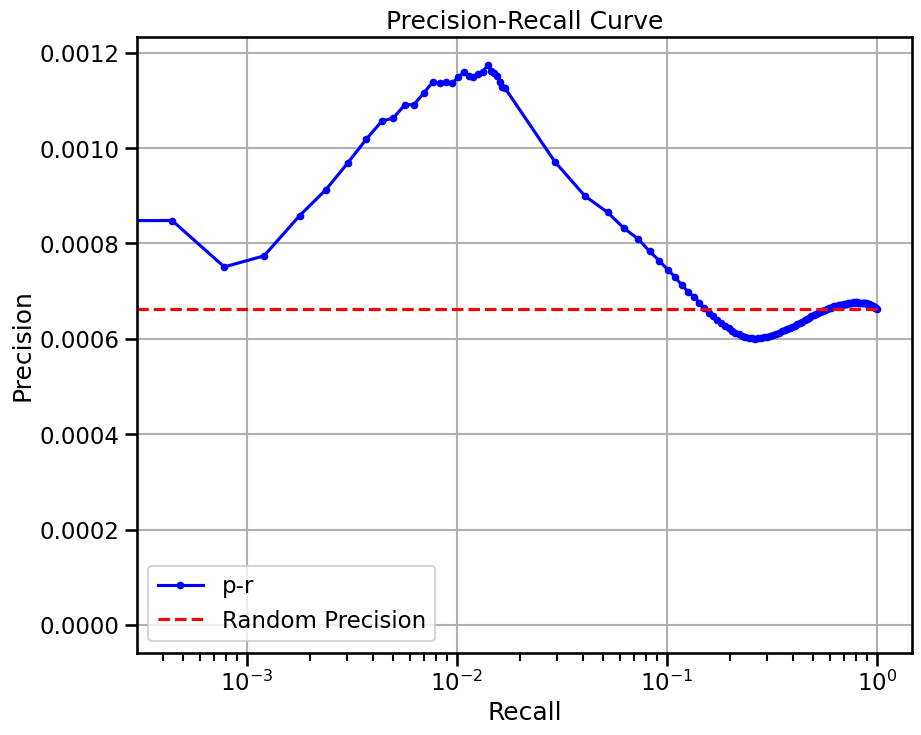


  0%|          | 0/44 [00:00<?, ?it/s]


  2%|▏         | 1/44 [00:02<01:42,  2.39s/it]


  5%|▍         | 2/44 [00:03<01:09,  1.66s/it]


  7%|▋         | 3/44 [00:04<00:58,  1.42s/it]


  9%|▉         | 4/44 [00:05<00:52,  1.30s/it]


 11%|█▏        | 5/44 [00:06<00:48,  1.24s/it]


 14%|█▎        | 6/44 [00:08<00:45,  1.20s/it]


 16%|█▌        | 7/44 [00:09<00:43,  1.17s/it]


 18%|█▊        | 8/44 [00:10<00:41,  1.15s/it]


 20%|██        | 9/44 [00:11<00:39,  1.14s/it]


 23%|██▎       | 10/44 [00:12<00:38,  1.13s/it]


 25%|██▌       | 11/44 [00:13<00:37,  1.14s/it]


 27%|██▋       | 12/44 [00:14<00:36,  1.13s/it]


 30%|██▉       | 13/44 [00:15<00:34,  1.12s/it]


 32%|███▏      | 14/44 [00:16<00:33,  1.10s/it]


 34%|███▍      | 15/44 [00:17<00:31,  1.09s/it]


 36%|███▋      | 16/44 [00:19<00:30,  1.08s/it]


 39%|███▊      | 17/44 [00:20<00:29,  1.08s/it]


 41%|████      | 18/44 [00:21<00:27,  1.07s/it]


 43%|████▎     | 19/44 [00:22<00:26,  1.07s/it]


 45%|████▌     | 20/44 [00:23<00:25,  1.06s/it]


 48%|████▊     | 21/44 [00:24<00:24,  1.06s/it]


 50%|█████     | 22/44 [00:25<00:23,  1.06s/it]


 52%|█████▏    | 23/44 [00:26<00:22,  1.06s/it]


 55%|█████▍    | 24/44 [00:27<00:21,  1.06s/it]


 57%|█████▋    | 25/44 [00:28<00:20,  1.06s/it]


 59%|█████▉    | 26/44 [00:29<00:19,  1.06s/it]


 61%|██████▏   | 27/44 [00:30<00:18,  1.06s/it]


 64%|██████▎   | 28/44 [00:31<00:17,  1.06s/it]


 66%|██████▌   | 29/44 [00:32<00:15,  1.07s/it]


 68%|██████▊   | 30/44 [00:33<00:14,  1.07s/it]


 70%|███████   | 31/44 [00:34<00:13,  1.07s/it]


 73%|███████▎  | 32/44 [00:36<00:12,  1.06s/it]


 75%|███████▌  | 33/44 [00:37<00:11,  1.05s/it]


 77%|███████▋  | 34/44 [00:38<00:10,  1.05s/it]


 80%|███████▉  | 35/44 [00:39<00:09,  1.05s/it]


 82%|████████▏ | 36/44 [00:40<00:08,  1.04s/it]


 84%|████████▍ | 37/44 [00:41<00:07,  1.04s/it]


 86%|████████▋ | 38/44 [00:42<00:06,  1.03s/it]


 89%|████████▊ | 39/44 [00:43<00:05,  1.03s/it]


 91%|█████████ | 40/44 [00:44<00:04,  1.02s/it]


 93%|█████████▎| 41/44 [00:45<00:03,  1.02s/it]


 95%|█████████▌| 42/44 [00:46<00:02,  1.03s/it]


 98%|█████████▊| 43/44 [00:47<00:01,  1.03s/it]


100%|██████████| 44/44 [00:47<00:00,  1.31it/s]


100%|██████████| 44/44 [00:47<00:00,  1.08s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


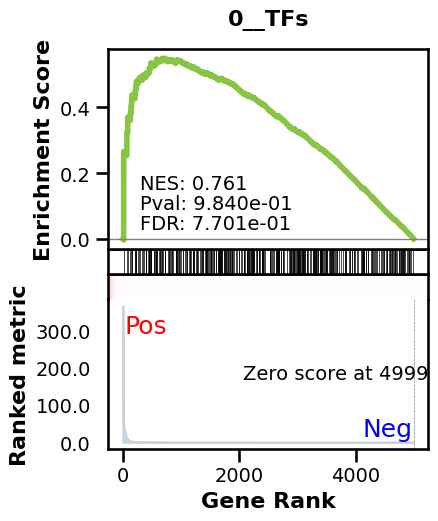

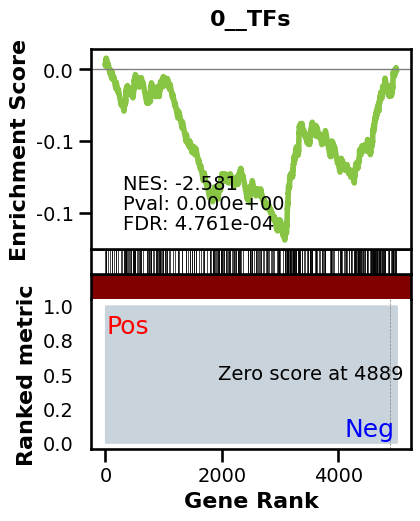

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0008040620608093005 
recall:  1.0 
random precision: 0.0008042949872463833



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:02, 60.22it/s]


 11%|█         | 14/128 [00:00<00:01, 60.22it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.27it/s]


 22%|██▏       | 28/128 [00:00<00:01, 60.02it/s]


 27%|██▋       | 35/128 [00:00<00:01, 60.08it/s]


 33%|███▎      | 42/128 [00:00<00:01, 60.13it/s]


 38%|███▊      | 49/128 [00:00<00:01, 60.14it/s]


 44%|████▍     | 56/128 [00:00<00:01, 60.18it/s]


 49%|████▉     | 63/128 [00:01<00:01, 60.16it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 60.19it/s]


 60%|██████    | 77/128 [00:01<00:00, 60.20it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 60.21it/s]


 71%|███████   | 91/128 [00:01<00:00, 60.22it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 60.20it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 60.20it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 60.20it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 59.75it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 59.88it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.06it/s]

Average Precision (AP):  0.0009211435611214878
Area Under Precision-Recall Curve (AUPRC):  0.0009199866638812779
EPR: 1.297506646637795


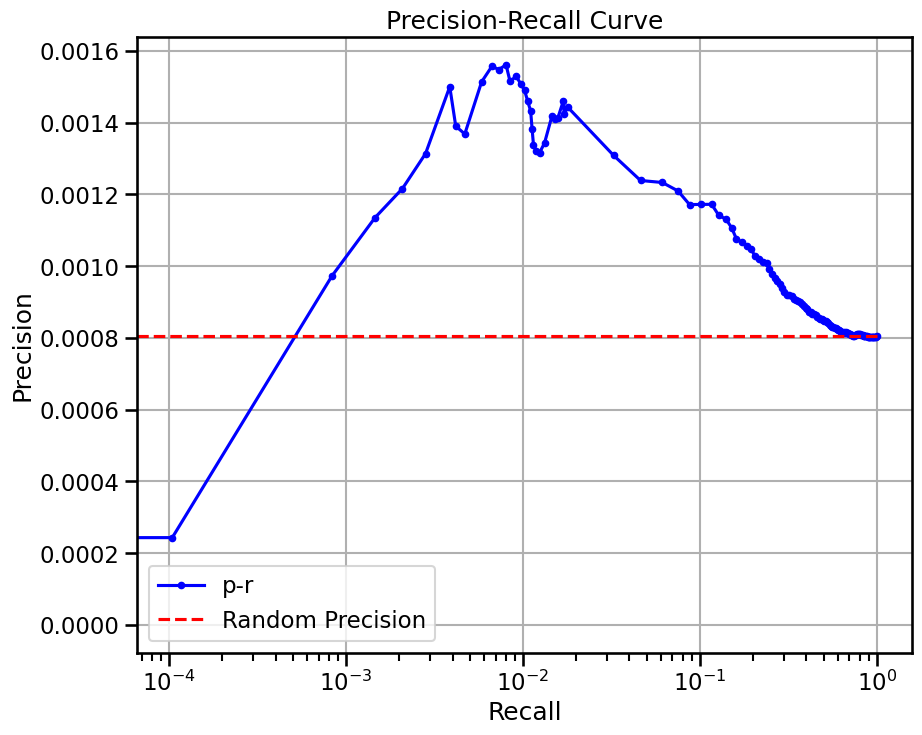

base enrichment


Top central genes: []


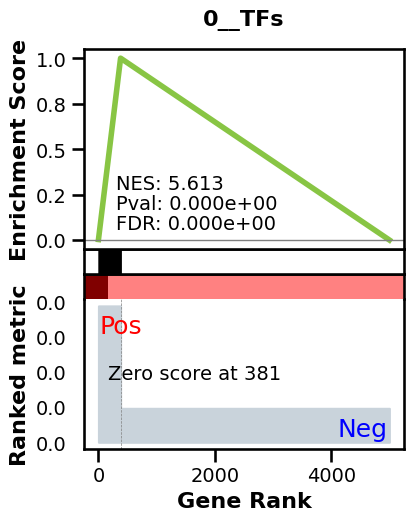

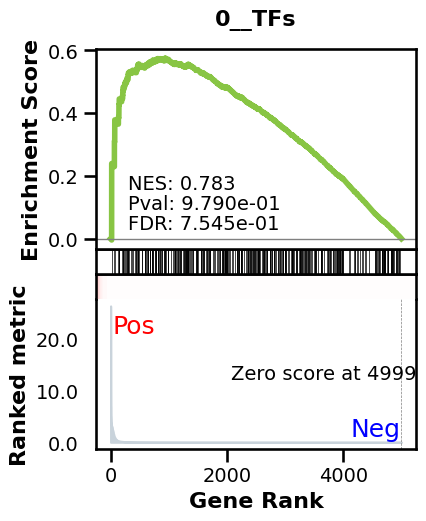

_________________________________________
TF specific enrichment


found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0032449520061130707 
recall:  0.3880254511317409 
random precision: 0.0008042949872463833



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.86it/s]


 10%|█         | 13/128 [00:00<00:01, 60.21it/s]


 16%|█▌        | 20/128 [00:00<00:01, 60.11it/s]


 21%|██        | 27/128 [00:00<00:01, 60.15it/s]


 27%|██▋       | 34/128 [00:00<00:01, 60.21it/s]


 32%|███▏      | 41/128 [00:00<00:01, 60.13it/s]


 38%|███▊      | 48/128 [00:00<00:01, 60.33it/s]


 43%|████▎     | 55/128 [00:00<00:01, 60.27it/s]


 48%|████▊     | 62/128 [00:01<00:01, 60.22it/s]


 54%|█████▍    | 69/128 [00:01<00:00, 60.22it/s]


 59%|█████▉    | 76/128 [00:01<00:00, 60.37it/s]


 65%|██████▍   | 83/128 [00:01<00:00, 60.36it/s]


 70%|███████   | 90/128 [00:01<00:00, 60.33it/s]


 76%|███████▌  | 97/128 [00:01<00:00, 60.32it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 60.28it/s]


 87%|████████▋ | 111/128 [00:01<00:00, 60.25it/s]


 92%|█████████▏| 118/128 [00:01<00:00, 60.20it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 60.23it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.21it/s]

Average Precision (AP):  0.002263360341484988
Area Under Precision-Recall Curve (AUPRC):  0.0020001562089462183
EPR: 7.071389276242374


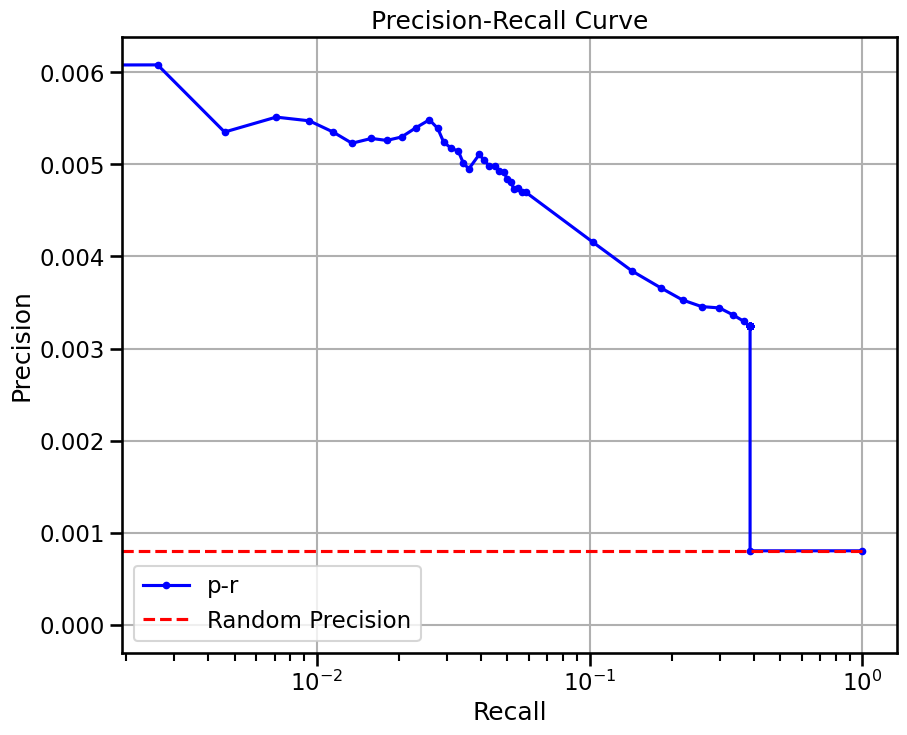

base enrichment


Top central genes: []
The DataFrame contains only the same values.


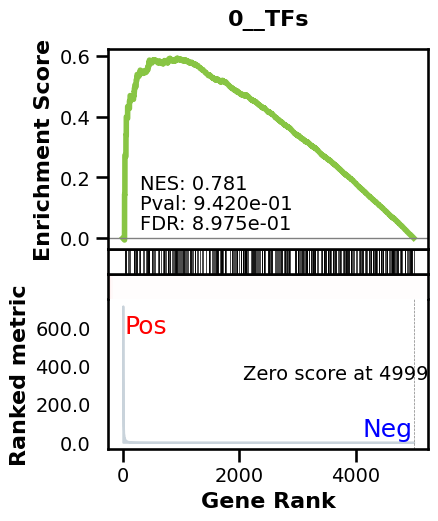

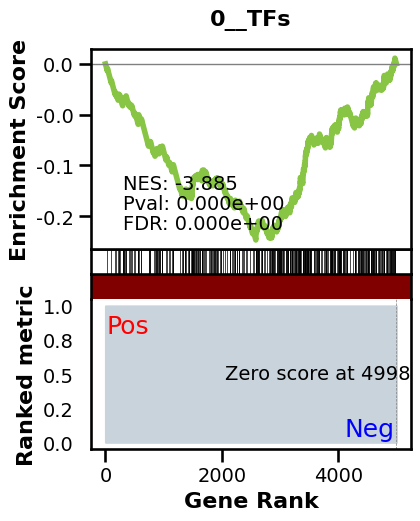

_________________________________________
TF specific enrichment


found some significant results for  10.714285714285714 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0008040620608093005 
recall:  1.0 
random precision: 0.0008042949872463833



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:02, 60.29it/s]


 11%|█         | 14/128 [00:00<00:01, 60.14it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.13it/s]


 22%|██▏       | 28/128 [00:00<00:01, 60.09it/s]


 27%|██▋       | 35/128 [00:00<00:01, 60.08it/s]


 33%|███▎      | 42/128 [00:00<00:01, 60.08it/s]


 38%|███▊      | 49/128 [00:00<00:01, 60.08it/s]


 44%|████▍     | 56/128 [00:00<00:01, 60.08it/s]


 49%|████▉     | 63/128 [00:01<00:01, 60.08it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 60.06it/s]


 60%|██████    | 77/128 [00:01<00:00, 60.07it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 60.10it/s]


 71%|███████   | 91/128 [00:01<00:00, 60.08it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 60.08it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 60.09it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 60.08it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 60.08it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 60.02it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.07it/s]

Average Precision (AP):  0.000930589587797983
Area Under Precision-Recall Curve (AUPRC):  0.0009274889027236515
EPR: 4.039975618595835


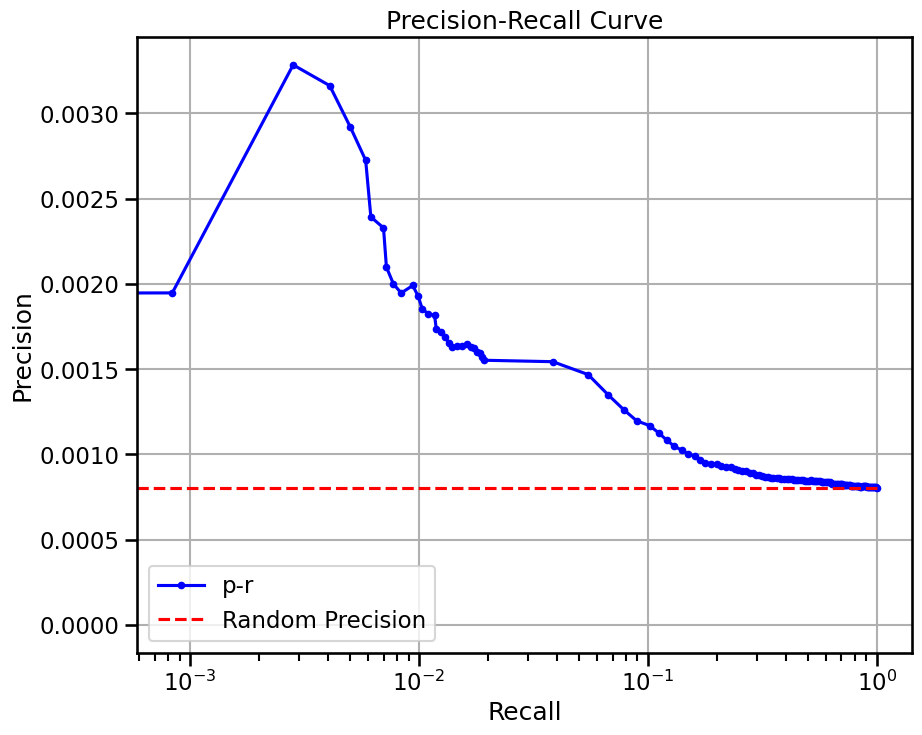

base enrichment


Top central genes: []


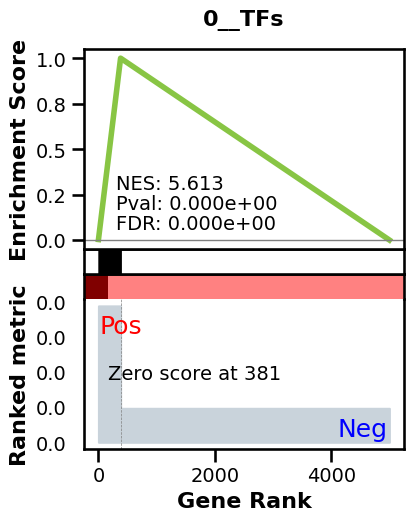

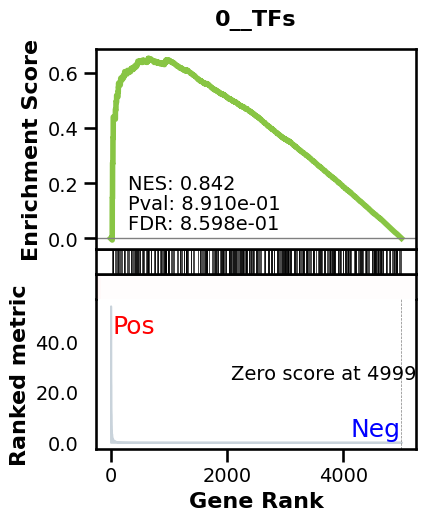

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0032449520061130707 
recall:  0.3880254511317409 
random precision: 0.0008042949872463833



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 60.54it/s]


 11%|█         | 14/128 [00:00<00:01, 60.45it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.45it/s]


 22%|██▏       | 28/128 [00:00<00:01, 60.46it/s]


 27%|██▋       | 35/128 [00:00<00:01, 60.42it/s]


 33%|███▎      | 42/128 [00:00<00:01, 60.40it/s]


 38%|███▊      | 49/128 [00:00<00:01, 60.41it/s]


 44%|████▍     | 56/128 [00:00<00:01, 60.41it/s]


 49%|████▉     | 63/128 [00:01<00:01, 60.38it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 60.39it/s]


 60%|██████    | 77/128 [00:01<00:00, 60.39it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 60.37it/s]


 71%|███████   | 91/128 [00:01<00:00, 60.38it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 60.37it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 60.36it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 60.36it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 60.36it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 60.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.35it/s]

Average Precision (AP):  0.0021267634376413718
Area Under Precision-Recall Curve (AUPRC):  0.0018439576060983037
EPR: 7.73426180673199


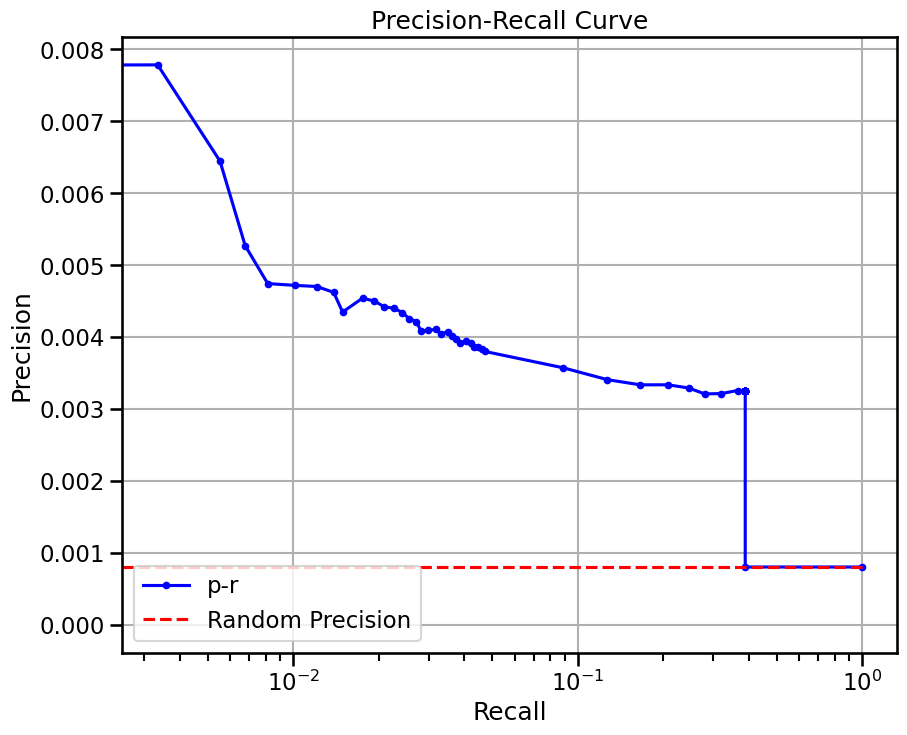


  0%|          | 0/12 [00:00<?, ?it/s]


  8%|▊         | 1/12 [00:01<00:19,  1.78s/it]


 17%|█▋        | 2/12 [00:02<00:11,  1.18s/it]


 25%|██▌       | 3/12 [00:03<00:08,  1.02it/s]


 33%|███▎      | 4/12 [00:04<00:07,  1.12it/s]


 42%|████▏     | 5/12 [00:04<00:05,  1.19it/s]


 50%|█████     | 6/12 [00:05<00:04,  1.23it/s]


 58%|█████▊    | 7/12 [00:06<00:03,  1.26it/s]


 67%|██████▋   | 8/12 [00:07<00:03,  1.28it/s]


 75%|███████▌  | 9/12 [00:07<00:02,  1.29it/s]


 83%|████████▎ | 10/12 [00:08<00:01,  1.30it/s]


 92%|█████████▏| 11/12 [00:09<00:00,  1.31it/s]


100%|██████████| 12/12 [00:09<00:00,  1.37it/s]


100%|██████████| 12/12 [00:10<00:00,  1.18it/s]

avg link count: 535876201, sparsity: 1.0


base enrichment


too many genes for central computation


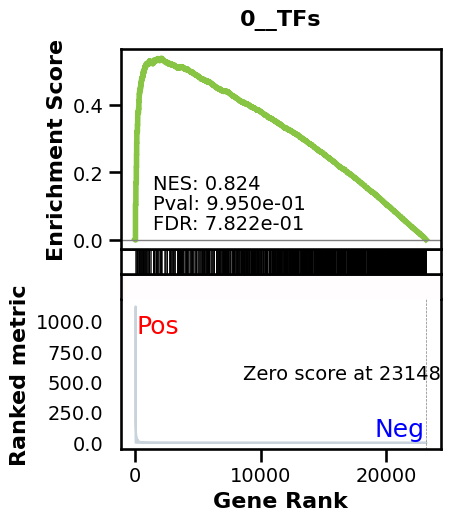

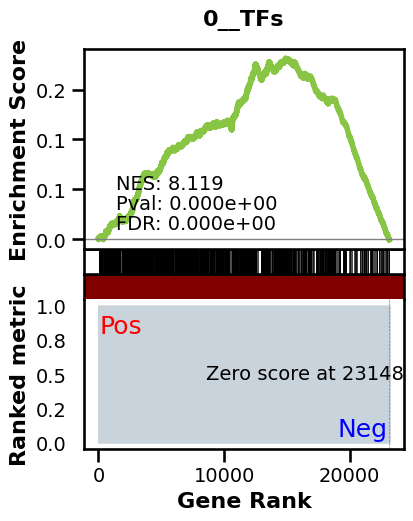

_________________________________________
TF specific enrichment


found some significant results for  58.035714285714285 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:37,  3.36it/s]


  2%|▏         | 2/128 [00:00<00:37,  3.37it/s]


  2%|▏         | 3/128 [00:00<00:37,  3.37it/s]


  3%|▎         | 4/128 [00:01<00:36,  3.37it/s]


  4%|▍         | 5/128 [00:01<00:36,  3.38it/s]


  5%|▍         | 6/128 [00:01<00:36,  3.38it/s]


  5%|▌         | 7/128 [00:02<00:35,  3.37it/s]


  6%|▋         | 8/128 [00:02<00:35,  3.38it/s]


  7%|▋         | 9/128 [00:02<00:35,  3.38it/s]


  8%|▊         | 10/128 [00:02<00:34,  3.38it/s]


  9%|▊         | 11/128 [00:03<00:34,  3.38it/s]


  9%|▉         | 12/128 [00:03<00:34,  3.37it/s]


 10%|█         | 13/128 [00:03<00:34,  3.37it/s]


 11%|█         | 14/128 [00:04<00:33,  3.37it/s]


 12%|█▏        | 15/128 [00:04<00:33,  3.38it/s]


 12%|█▎        | 16/128 [00:04<00:33,  3.38it/s]


 13%|█▎        | 17/128 [00:05<00:32,  3.37it/s]


 14%|█▍        | 18/128 [00:05<00:32,  3.38it/s]


 15%|█▍        | 19/128 [00:05<00:32,  3.37it/s]


 16%|█▌        | 20/128 [00:05<00:31,  3.38it/s]


 16%|█▋        | 21/128 [00:06<00:31,  3.38it/s]


 17%|█▋        | 22/128 [00:06<00:31,  3.37it/s]


 18%|█▊        | 23/128 [00:06<00:31,  3.37it/s]


 19%|█▉        | 24/128 [00:07<00:30,  3.37it/s]


 20%|█▉        | 25/128 [00:07<00:30,  3.37it/s]


 20%|██        | 26/128 [00:07<00:30,  3.37it/s]


 21%|██        | 27/128 [00:08<00:29,  3.37it/s]


 22%|██▏       | 28/128 [00:08<00:29,  3.37it/s]


 23%|██▎       | 29/128 [00:08<00:29,  3.37it/s]


 23%|██▎       | 30/128 [00:08<00:29,  3.37it/s]


 24%|██▍       | 31/128 [00:09<00:28,  3.37it/s]


 25%|██▌       | 32/128 [00:09<00:28,  3.37it/s]


 26%|██▌       | 33/128 [00:09<00:28,  3.37it/s]


 27%|██▋       | 34/128 [00:10<00:27,  3.37it/s]


 27%|██▋       | 35/128 [00:10<00:27,  3.37it/s]


 28%|██▊       | 36/128 [00:10<00:27,  3.31it/s]


 29%|██▉       | 37/128 [00:10<00:27,  3.33it/s]


 30%|██▉       | 38/128 [00:11<00:26,  3.35it/s]


 30%|███       | 39/128 [00:11<00:27,  3.29it/s]


 31%|███▏      | 40/128 [00:11<00:26,  3.28it/s]


 32%|███▏      | 41/128 [00:12<00:26,  3.30it/s]


 33%|███▎      | 42/128 [00:12<00:26,  3.29it/s]


 34%|███▎      | 43/128 [00:12<00:25,  3.29it/s]


 34%|███▍      | 44/128 [00:13<00:25,  3.30it/s]


 35%|███▌      | 45/128 [00:13<00:24,  3.32it/s]


 36%|███▌      | 46/128 [00:13<00:24,  3.33it/s]


 37%|███▋      | 47/128 [00:14<00:24,  3.34it/s]


 38%|███▊      | 48/128 [00:14<00:23,  3.35it/s]


 38%|███▊      | 49/128 [00:14<00:23,  3.35it/s]


 39%|███▉      | 50/128 [00:14<00:23,  3.36it/s]


 40%|███▉      | 51/128 [00:15<00:22,  3.35it/s]


 41%|████      | 52/128 [00:15<00:22,  3.37it/s]


 41%|████▏     | 53/128 [00:15<00:22,  3.38it/s]


 42%|████▏     | 54/128 [00:16<00:21,  3.39it/s]


 43%|████▎     | 55/128 [00:16<00:21,  3.39it/s]


 44%|████▍     | 56/128 [00:16<00:21,  3.38it/s]


 45%|████▍     | 57/128 [00:16<00:21,  3.38it/s]


 45%|████▌     | 58/128 [00:17<00:20,  3.38it/s]


 46%|████▌     | 59/128 [00:17<00:20,  3.37it/s]


 47%|████▋     | 60/128 [00:17<00:20,  3.38it/s]


 48%|████▊     | 61/128 [00:18<00:19,  3.38it/s]


 48%|████▊     | 62/128 [00:18<00:19,  3.37it/s]


 49%|████▉     | 63/128 [00:18<00:19,  3.37it/s]


 50%|█████     | 64/128 [00:19<00:19,  3.36it/s]


 51%|█████     | 65/128 [00:19<00:18,  3.36it/s]


 52%|█████▏    | 66/128 [00:19<00:18,  3.36it/s]


 52%|█████▏    | 67/128 [00:19<00:18,  3.36it/s]


 53%|█████▎    | 68/128 [00:20<00:17,  3.36it/s]


 54%|█████▍    | 69/128 [00:20<00:17,  3.36it/s]


 55%|█████▍    | 70/128 [00:20<00:17,  3.37it/s]


 55%|█████▌    | 71/128 [00:21<00:16,  3.36it/s]


 56%|█████▋    | 72/128 [00:21<00:16,  3.36it/s]


 57%|█████▋    | 73/128 [00:21<00:16,  3.36it/s]


 58%|█████▊    | 74/128 [00:22<00:16,  3.36it/s]


 59%|█████▊    | 75/128 [00:22<00:15,  3.36it/s]


 59%|█████▉    | 76/128 [00:22<00:15,  3.36it/s]


 60%|██████    | 77/128 [00:22<00:15,  3.36it/s]


 61%|██████    | 78/128 [00:23<00:14,  3.36it/s]


 62%|██████▏   | 79/128 [00:23<00:14,  3.36it/s]


 62%|██████▎   | 80/128 [00:23<00:14,  3.36it/s]


 63%|██████▎   | 81/128 [00:24<00:13,  3.36it/s]


 64%|██████▍   | 82/128 [00:24<00:13,  3.36it/s]


 65%|██████▍   | 83/128 [00:24<00:13,  3.36it/s]


 66%|██████▌   | 84/128 [00:24<00:13,  3.35it/s]


 66%|██████▋   | 85/128 [00:25<00:12,  3.36it/s]


 67%|██████▋   | 86/128 [00:25<00:12,  3.36it/s]


 68%|██████▊   | 87/128 [00:25<00:12,  3.36it/s]


 69%|██████▉   | 88/128 [00:26<00:11,  3.36it/s]


 70%|██████▉   | 89/128 [00:26<00:11,  3.36it/s]


 70%|███████   | 90/128 [00:26<00:11,  3.36it/s]


 71%|███████   | 91/128 [00:27<00:11,  3.36it/s]


 72%|███████▏  | 92/128 [00:27<00:10,  3.36it/s]


 73%|███████▎  | 93/128 [00:27<00:10,  3.36it/s]


 73%|███████▎  | 94/128 [00:27<00:10,  3.36it/s]


 74%|███████▍  | 95/128 [00:28<00:09,  3.36it/s]


 75%|███████▌  | 96/128 [00:28<00:09,  3.36it/s]


 76%|███████▌  | 97/128 [00:28<00:09,  3.36it/s]


 77%|███████▋  | 98/128 [00:29<00:08,  3.36it/s]


 77%|███████▋  | 99/128 [00:29<00:08,  3.37it/s]


 78%|███████▊  | 100/128 [00:29<00:08,  3.36it/s]


 79%|███████▉  | 101/128 [00:30<00:08,  3.36it/s]


 80%|███████▉  | 102/128 [00:30<00:07,  3.36it/s]


 80%|████████  | 103/128 [00:30<00:07,  3.36it/s]


 81%|████████▏ | 104/128 [00:30<00:07,  3.36it/s]


 82%|████████▏ | 105/128 [00:31<00:06,  3.36it/s]


 83%|████████▎ | 106/128 [00:31<00:06,  3.36it/s]


 84%|████████▎ | 107/128 [00:31<00:06,  3.36it/s]


 84%|████████▍ | 108/128 [00:32<00:05,  3.35it/s]


 85%|████████▌ | 109/128 [00:32<00:05,  3.34it/s]


 86%|████████▌ | 110/128 [00:32<00:05,  3.34it/s]


 87%|████████▋ | 111/128 [00:33<00:05,  3.34it/s]


 88%|████████▊ | 112/128 [00:33<00:04,  3.34it/s]


 88%|████████▊ | 113/128 [00:33<00:04,  3.35it/s]


 89%|████████▉ | 114/128 [00:33<00:04,  3.34it/s]


 90%|████████▉ | 115/128 [00:34<00:03,  3.34it/s]


 91%|█████████ | 116/128 [00:34<00:03,  3.34it/s]


 91%|█████████▏| 117/128 [00:34<00:03,  3.36it/s]


 92%|█████████▏| 118/128 [00:35<00:02,  3.36it/s]


 93%|█████████▎| 119/128 [00:35<00:02,  3.36it/s]


 94%|█████████▍| 120/128 [00:35<00:02,  3.36it/s]


 95%|█████████▍| 121/128 [00:36<00:02,  3.30it/s]


 95%|█████████▌| 122/128 [00:36<00:01,  3.32it/s]


 96%|█████████▌| 123/128 [00:36<00:01,  3.28it/s]


 97%|█████████▋| 124/128 [00:36<00:01,  3.27it/s]


 98%|█████████▊| 125/128 [00:37<00:00,  3.30it/s]


 98%|█████████▊| 126/128 [00:37<00:00,  3.27it/s]


 99%|█████████▉| 127/128 [00:37<00:00,  3.30it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:38<00:00,  3.32it/s]


100%|██████████| 128/128 [00:38<00:00,  3.35it/s]

Average Precision (AP):  0.000726174715836351
Area Under Precision-Recall Curve (AUPRC):  0.0007259454603489612


EPR: 1.4456511913061356


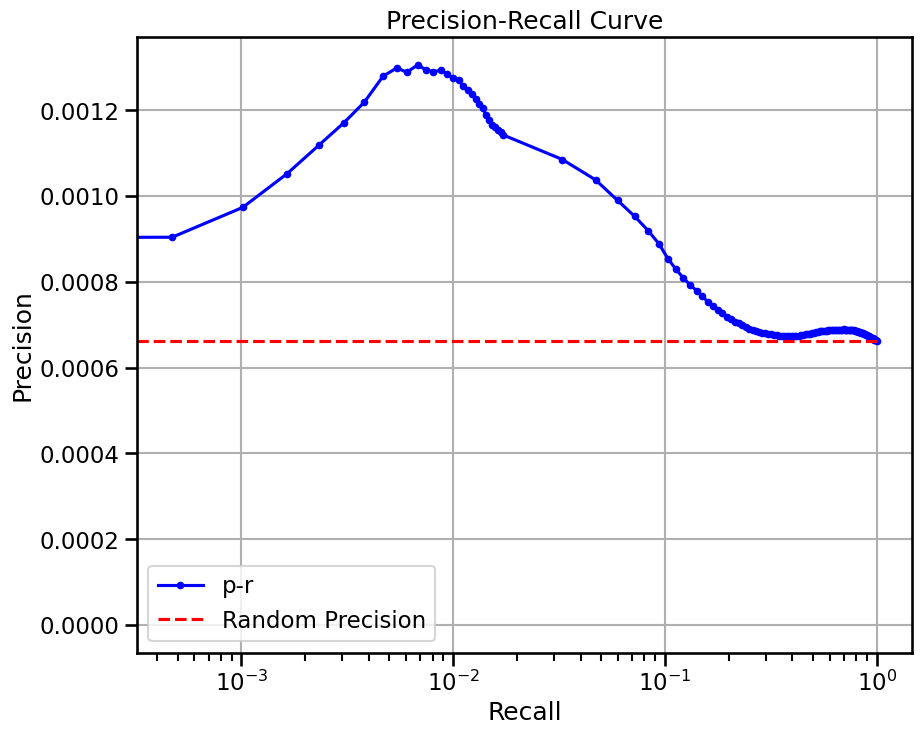


  0%|          | 0/24 [00:00<?, ?it/s]


  4%|▍         | 1/24 [00:02<00:54,  2.35s/it]


  8%|▊         | 2/24 [00:04<00:43,  1.97s/it]


 12%|█▎        | 3/24 [00:05<00:32,  1.57s/it]


 17%|█▋        | 4/24 [00:06<00:27,  1.37s/it]


 21%|██        | 5/24 [00:07<00:23,  1.26s/it]


 25%|██▌       | 6/24 [00:08<00:21,  1.20s/it]


 29%|██▉       | 7/24 [00:09<00:19,  1.17s/it]


 33%|███▎      | 8/24 [00:10<00:18,  1.14s/it]


 38%|███▊      | 9/24 [00:11<00:17,  1.13s/it]


 42%|████▏     | 10/24 [00:12<00:15,  1.13s/it]


 46%|████▌     | 11/24 [00:13<00:14,  1.11s/it]


 50%|█████     | 12/24 [00:14<00:13,  1.10s/it]


 54%|█████▍    | 13/24 [00:16<00:12,  1.10s/it]


 58%|█████▊    | 14/24 [00:17<00:11,  1.10s/it]


 62%|██████▎   | 15/24 [00:18<00:09,  1.10s/it]


 67%|██████▋   | 16/24 [00:19<00:08,  1.11s/it]


 71%|███████   | 17/24 [00:20<00:07,  1.10s/it]


 75%|███████▌  | 18/24 [00:21<00:06,  1.09s/it]


 79%|███████▉  | 19/24 [00:22<00:05,  1.16s/it]


 83%|████████▎ | 20/24 [00:23<00:04,  1.12s/it]


 88%|████████▊ | 21/24 [00:24<00:03,  1.09s/it]


 92%|█████████▏| 22/24 [00:25<00:02,  1.07s/it]


 96%|█████████▌| 23/24 [00:26<00:01,  1.05s/it]


100%|██████████| 24/24 [00:27<00:00,  1.05it/s]


100%|██████████| 24/24 [00:27<00:00,  1.16s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


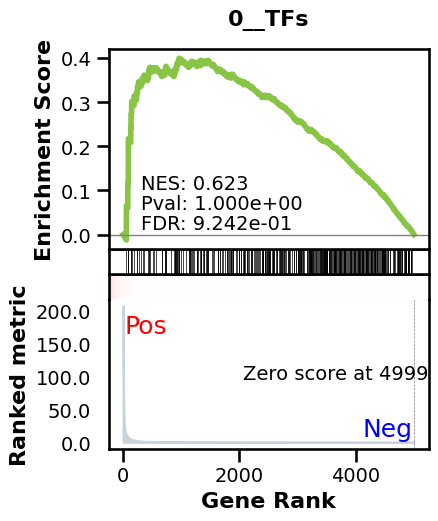

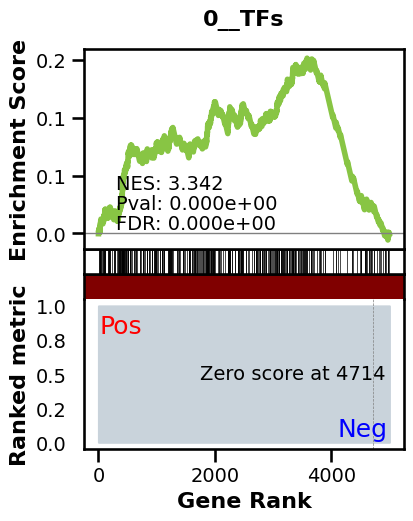

_________________________________________
TF specific enrichment


found some significant results for  33.333333333333336 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.0005733902527305975 
recall:  1.0 
random precision: 0.0005735728610913398



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 75.19it/s]


 12%|█▎        | 16/128 [00:00<00:01, 75.16it/s]


 19%|█▉        | 24/128 [00:00<00:01, 75.19it/s]


 25%|██▌       | 32/128 [00:00<00:01, 75.18it/s]


 31%|███▏      | 40/128 [00:00<00:01, 75.23it/s]


 38%|███▊      | 48/128 [00:00<00:01, 75.30it/s]


 44%|████▍     | 56/128 [00:00<00:00, 75.17it/s]


 50%|█████     | 64/128 [00:00<00:00, 75.53it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 75.49it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 75.48it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 75.50it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 75.50it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 75.98it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 76.28it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 76.61it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:01<00:00, 76.71it/s]


100%|██████████| 128/128 [00:01<00:00, 75.78it/s]

Average Precision (AP):  0.0006303958000448767
Area Under Precision-Recall Curve (AUPRC):  0.0006270936157409494
EPR: 4.64221078403592


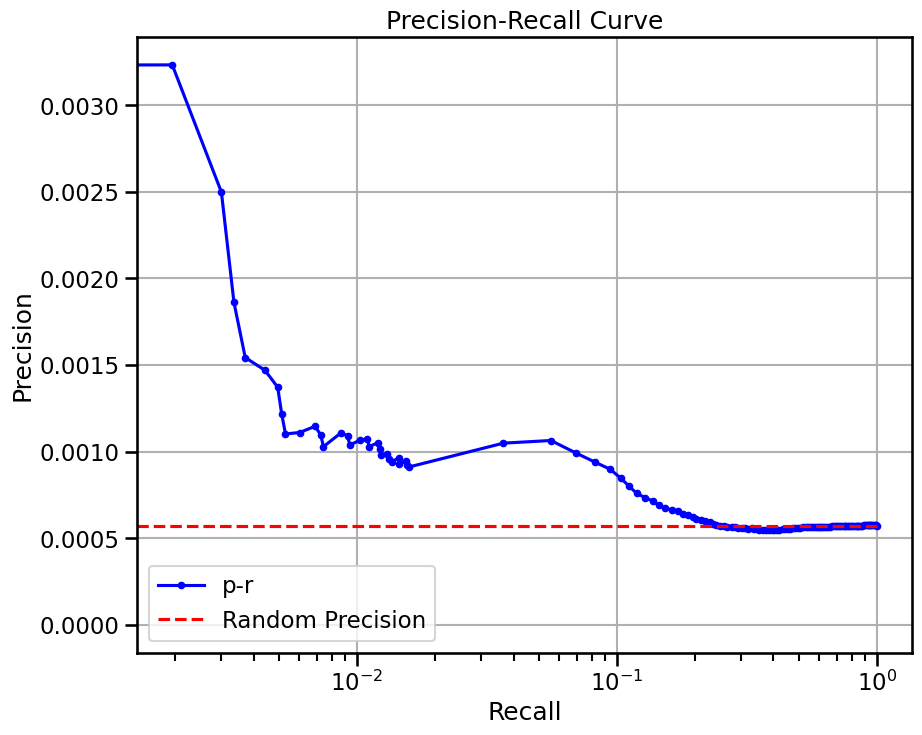

base enrichment


Top central genes: []


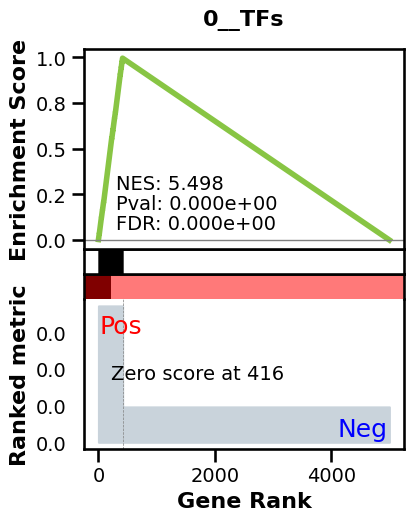

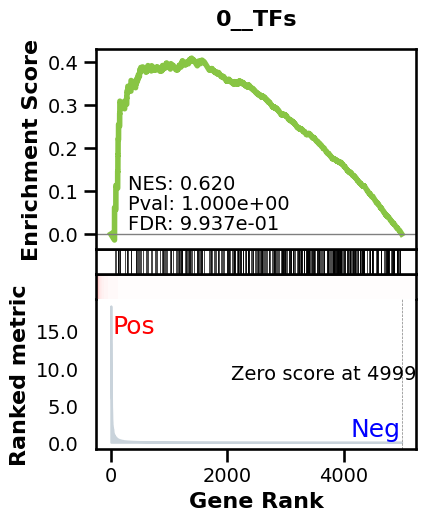

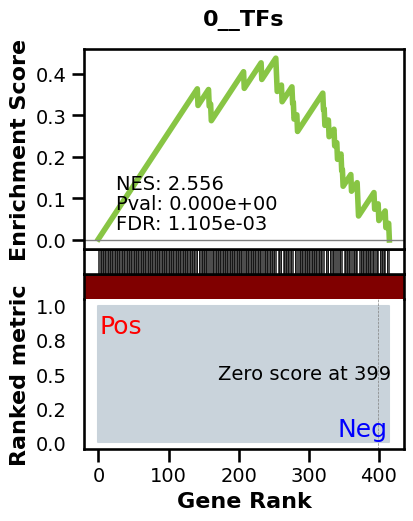

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.002626778812706861 
recall:  0.5119321194979671 
random precision: 0.0005735728610913398



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 75.55it/s]


 12%|█▎        | 16/128 [00:00<00:01, 75.85it/s]


 19%|█▉        | 24/128 [00:00<00:01, 75.68it/s]


 25%|██▌       | 32/128 [00:00<00:01, 74.99it/s]


 31%|███▏      | 40/128 [00:00<00:01, 74.72it/s]


 38%|███▊      | 48/128 [00:00<00:01, 74.86it/s]


 44%|████▍     | 56/128 [00:00<00:00, 74.91it/s]


 50%|█████     | 64/128 [00:00<00:00, 75.05it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 74.89it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 75.03it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 75.18it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 75.37it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 75.26it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 75.36it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 75.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 75.44it/s]


100%|██████████| 128/128 [00:01<00:00, 75.19it/s]

Average Precision (AP):  0.0018833801490041402
Area Under Precision-Recall Curve (AUPRC):  0.0017015761057995423
EPR: 10.278361071682223


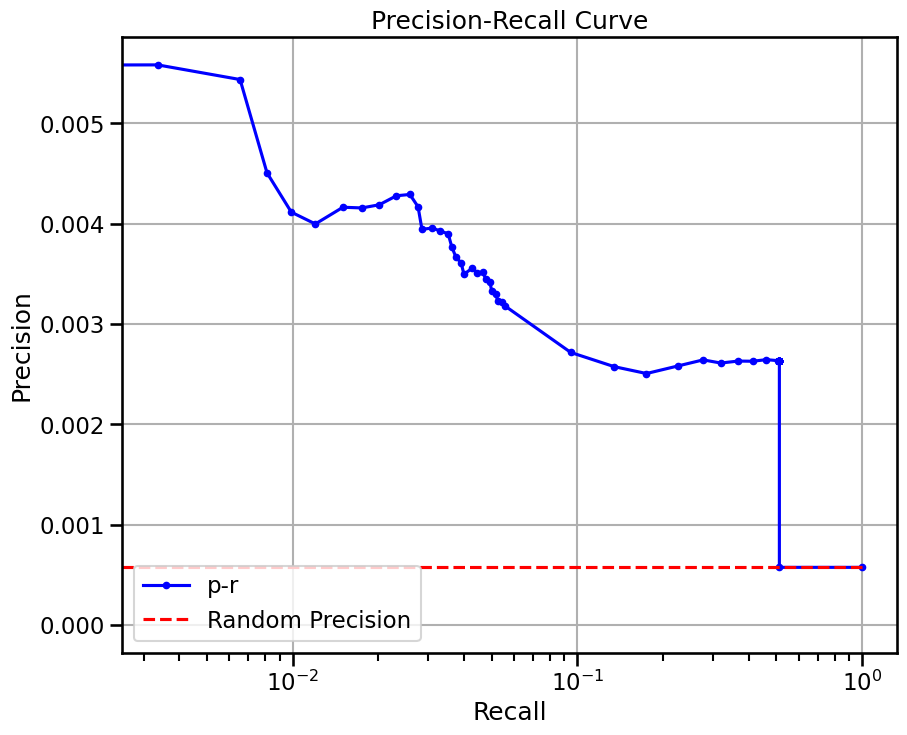

base enrichment


Top central genes: []
The DataFrame contains only the same values.


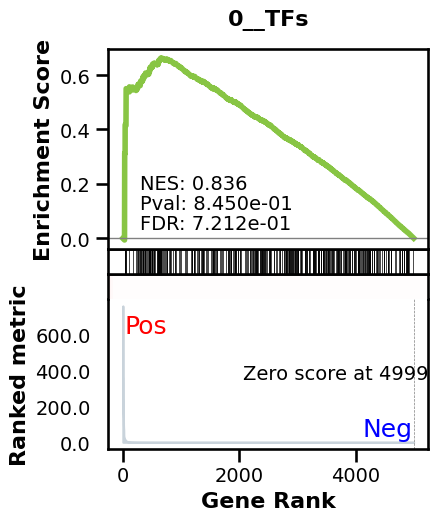

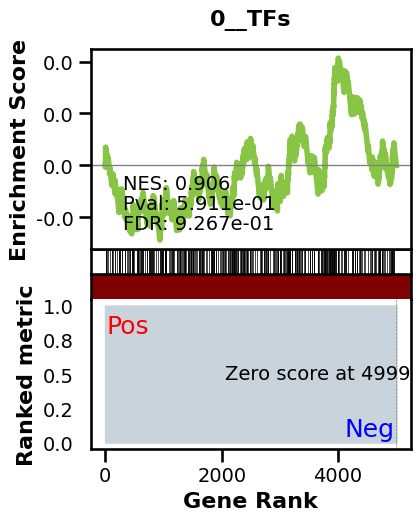

_________________________________________
TF specific enrichment


found some significant results for  22.22222222222222 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.0005733902527305975 
recall:  1.0 
random precision: 0.0005735728610913398



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 74.63it/s]


 12%|█▎        | 16/128 [00:00<00:01, 74.31it/s]


 19%|█▉        | 24/128 [00:00<00:01, 74.42it/s]


 25%|██▌       | 32/128 [00:00<00:01, 74.49it/s]


 31%|███▏      | 40/128 [00:00<00:01, 74.49it/s]


 38%|███▊      | 48/128 [00:00<00:01, 74.10it/s]


 44%|████▍     | 56/128 [00:00<00:00, 74.16it/s]


 50%|█████     | 64/128 [00:00<00:00, 74.17it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 74.39it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 74.60it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 74.31it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 74.51it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 74.58it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 74.42it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 74.52it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 74.37it/s]


100%|██████████| 128/128 [00:01<00:00, 74.37it/s]

Average Precision (AP):  0.0006795469071960208
Area Under Precision-Recall Curve (AUPRC):  0.0006741099741902608
EPR: 4.020397689059486


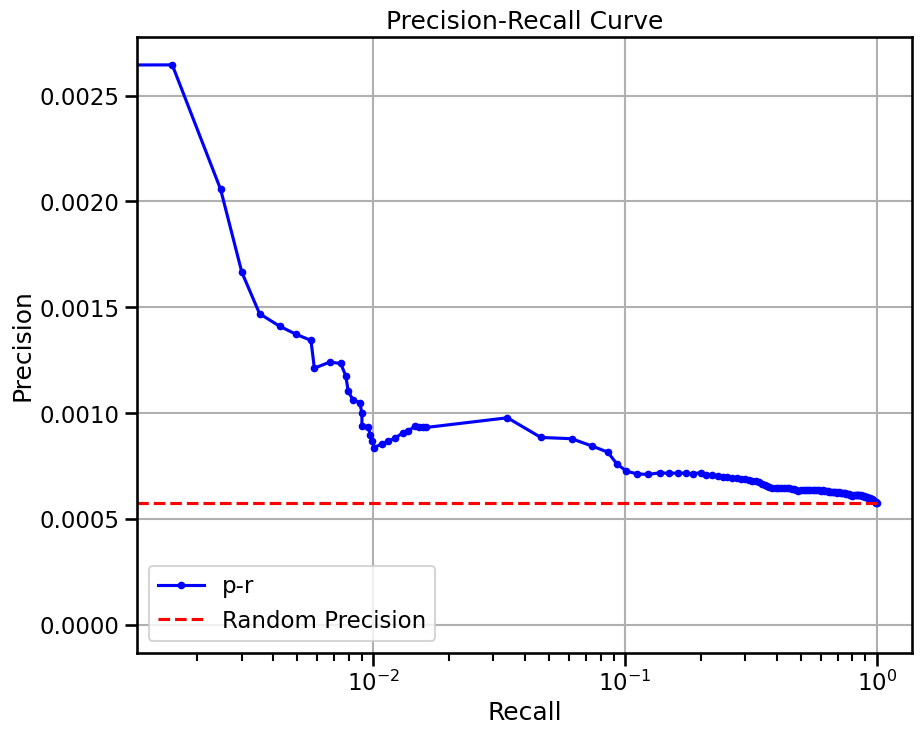

base enrichment


Top central genes: []


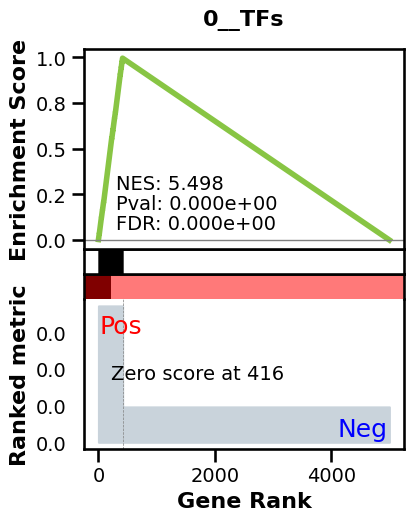

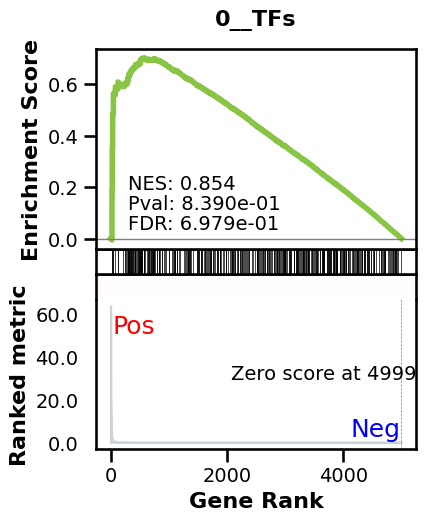

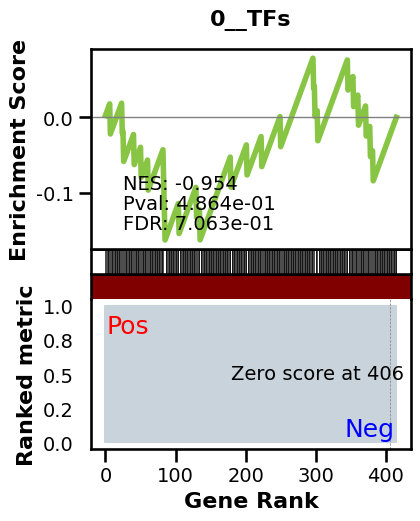

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.002626778812706861 
recall:  0.5119321194979671 
random precision: 0.0005735728610913398



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 76.10it/s]


 12%|█▎        | 16/128 [00:00<00:01, 76.27it/s]


 19%|█▉        | 24/128 [00:00<00:01, 76.26it/s]


 25%|██▌       | 32/128 [00:00<00:01, 76.36it/s]


 31%|███▏      | 40/128 [00:00<00:01, 76.53it/s]


 38%|███▊      | 48/128 [00:00<00:01, 76.54it/s]


 44%|████▍     | 56/128 [00:00<00:00, 76.49it/s]


 50%|█████     | 64/128 [00:00<00:00, 76.58it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 76.56it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 76.59it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 76.75it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 76.60it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 76.52it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 76.49it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 76.62it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 76.45it/s]


100%|██████████| 128/128 [00:01<00:00, 76.48it/s]

Average Precision (AP):  0.0022283578394252557
Area Under Precision-Recall Curve (AUPRC):  0.0019873934264115637
EPR: 8.391648110698522


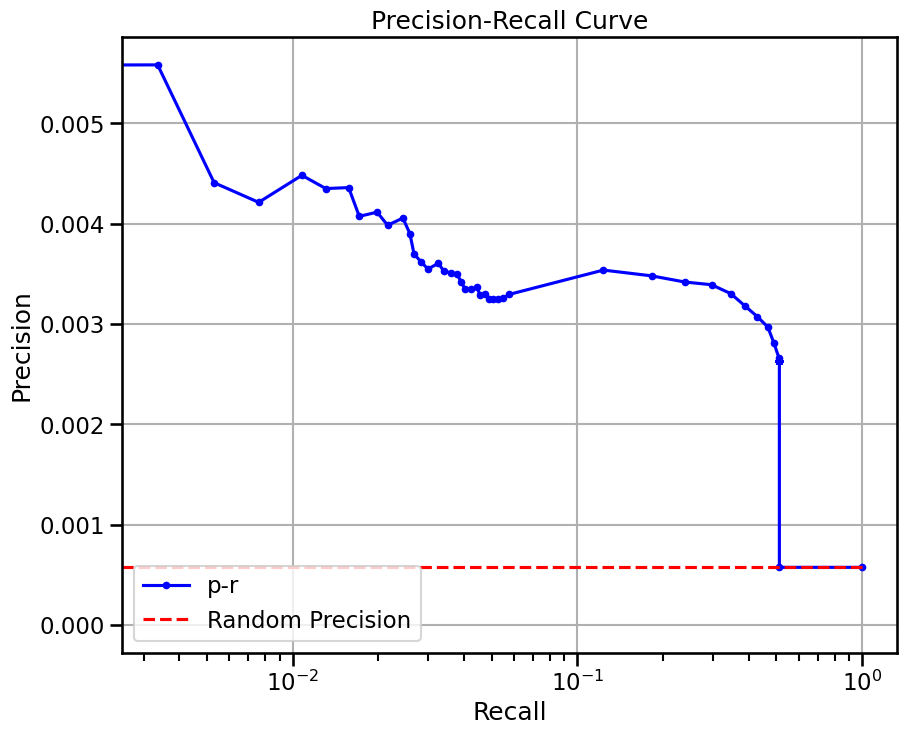


  0%|          | 0/8 [00:00<?, ?it/s]


 12%|█▎        | 1/8 [00:01<00:11,  1.70s/it]


 25%|██▌       | 2/8 [00:02<00:06,  1.15s/it]


 38%|███▊      | 3/8 [00:03<00:04,  1.03it/s]


 50%|█████     | 4/8 [00:03<00:03,  1.14it/s]


 62%|██████▎   | 5/8 [00:04<00:02,  1.19it/s]


 75%|███████▌  | 6/8 [00:05<00:01,  1.23it/s]


 88%|████████▊ | 7/8 [00:06<00:00,  1.26it/s]


100%|██████████| 8/8 [00:06<00:00,  1.36it/s]


100%|██████████| 8/8 [00:07<00:00,  1.14it/s]

avg link count: 535876201, sparsity: 1.0


base enrichment


too many genes for central computation


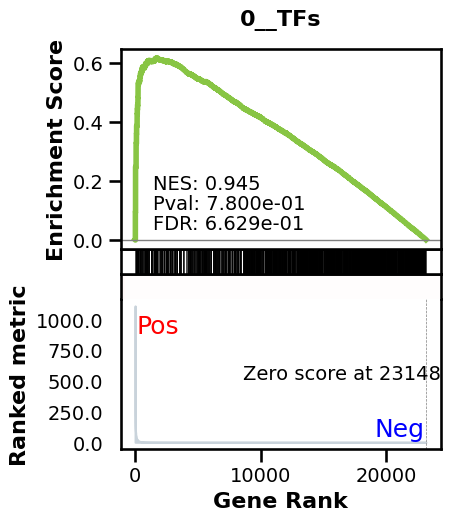

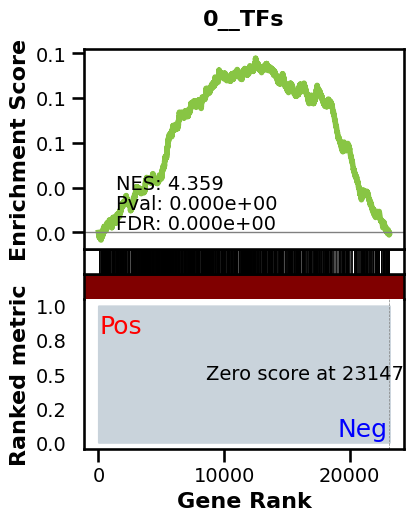

_________________________________________
TF specific enrichment


found some significant results for  52.67857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:38,  3.33it/s]


  2%|▏         | 2/128 [00:00<00:37,  3.33it/s]


  2%|▏         | 3/128 [00:00<00:37,  3.34it/s]


  3%|▎         | 4/128 [00:01<00:37,  3.33it/s]


  4%|▍         | 5/128 [00:01<00:36,  3.33it/s]


  5%|▍         | 6/128 [00:01<00:36,  3.33it/s]


  5%|▌         | 7/128 [00:02<00:36,  3.33it/s]


  6%|▋         | 8/128 [00:02<00:36,  3.33it/s]


  7%|▋         | 9/128 [00:02<00:35,  3.33it/s]


  8%|▊         | 10/128 [00:03<00:35,  3.32it/s]


  9%|▊         | 11/128 [00:03<00:35,  3.32it/s]


  9%|▉         | 12/128 [00:03<00:34,  3.32it/s]


 10%|█         | 13/128 [00:03<00:34,  3.32it/s]


 11%|█         | 14/128 [00:04<00:34,  3.32it/s]


 12%|█▏        | 15/128 [00:04<00:33,  3.33it/s]


 12%|█▎        | 16/128 [00:04<00:33,  3.33it/s]


 13%|█▎        | 17/128 [00:05<00:33,  3.33it/s]


 14%|█▍        | 18/128 [00:05<00:33,  3.33it/s]


 15%|█▍        | 19/128 [00:05<00:32,  3.33it/s]


 16%|█▌        | 20/128 [00:06<00:32,  3.34it/s]


 16%|█▋        | 21/128 [00:06<00:32,  3.34it/s]


 17%|█▋        | 22/128 [00:06<00:31,  3.33it/s]


 18%|█▊        | 23/128 [00:06<00:31,  3.33it/s]


 19%|█▉        | 24/128 [00:07<00:31,  3.33it/s]


 20%|█▉        | 25/128 [00:07<00:30,  3.33it/s]


 20%|██        | 26/128 [00:07<00:30,  3.33it/s]


 21%|██        | 27/128 [00:08<00:30,  3.33it/s]


 22%|██▏       | 28/128 [00:08<00:30,  3.33it/s]


 23%|██▎       | 29/128 [00:08<00:29,  3.33it/s]


 23%|██▎       | 30/128 [00:09<00:29,  3.33it/s]


 24%|██▍       | 31/128 [00:09<00:29,  3.33it/s]


 25%|██▌       | 32/128 [00:09<00:28,  3.33it/s]


 26%|██▌       | 33/128 [00:09<00:28,  3.33it/s]


 27%|██▋       | 34/128 [00:10<00:28,  3.34it/s]


 27%|██▋       | 35/128 [00:10<00:27,  3.34it/s]


 28%|██▊       | 36/128 [00:10<00:27,  3.35it/s]


 29%|██▉       | 37/128 [00:11<00:27,  3.35it/s]


 30%|██▉       | 38/128 [00:11<00:26,  3.35it/s]


 30%|███       | 39/128 [00:11<00:26,  3.35it/s]


 31%|███▏      | 40/128 [00:11<00:26,  3.35it/s]


 32%|███▏      | 41/128 [00:12<00:25,  3.35it/s]


 33%|███▎      | 42/128 [00:12<00:25,  3.35it/s]


 34%|███▎      | 43/128 [00:12<00:25,  3.35it/s]


 34%|███▍      | 44/128 [00:13<00:25,  3.35it/s]


 35%|███▌      | 45/128 [00:13<00:24,  3.34it/s]


 36%|███▌      | 46/128 [00:13<00:24,  3.34it/s]


 37%|███▋      | 47/128 [00:14<00:24,  3.34it/s]


 38%|███▊      | 48/128 [00:14<00:23,  3.34it/s]


 38%|███▊      | 49/128 [00:14<00:23,  3.34it/s]


 39%|███▉      | 50/128 [00:14<00:23,  3.33it/s]


 40%|███▉      | 51/128 [00:15<00:23,  3.34it/s]


 41%|████      | 52/128 [00:15<00:22,  3.34it/s]


 41%|████▏     | 53/128 [00:15<00:22,  3.33it/s]


 42%|████▏     | 54/128 [00:16<00:22,  3.34it/s]


 43%|████▎     | 55/128 [00:16<00:21,  3.33it/s]


 44%|████▍     | 56/128 [00:16<00:21,  3.34it/s]


 45%|████▍     | 57/128 [00:17<00:21,  3.33it/s]


 45%|████▌     | 58/128 [00:17<00:20,  3.34it/s]


 46%|████▌     | 59/128 [00:17<00:20,  3.34it/s]


 47%|████▋     | 60/128 [00:17<00:20,  3.33it/s]


 48%|████▊     | 61/128 [00:18<00:20,  3.34it/s]


 48%|████▊     | 62/128 [00:18<00:19,  3.33it/s]


 49%|████▉     | 63/128 [00:18<00:19,  3.33it/s]


 50%|█████     | 64/128 [00:19<00:19,  3.33it/s]


 51%|█████     | 65/128 [00:19<00:18,  3.33it/s]


 52%|█████▏    | 66/128 [00:19<00:18,  3.34it/s]


 52%|█████▏    | 67/128 [00:20<00:18,  3.33it/s]


 53%|█████▎    | 68/128 [00:20<00:18,  3.33it/s]


 54%|█████▍    | 69/128 [00:20<00:17,  3.33it/s]


 55%|█████▍    | 70/128 [00:20<00:17,  3.33it/s]


 55%|█████▌    | 71/128 [00:21<00:17,  3.33it/s]


 56%|█████▋    | 72/128 [00:21<00:16,  3.33it/s]


 57%|█████▋    | 73/128 [00:21<00:16,  3.33it/s]


 58%|█████▊    | 74/128 [00:22<00:16,  3.34it/s]


 59%|█████▊    | 75/128 [00:22<00:15,  3.33it/s]


 59%|█████▉    | 76/128 [00:22<00:15,  3.34it/s]


 60%|██████    | 77/128 [00:23<00:15,  3.33it/s]


 61%|██████    | 78/128 [00:23<00:14,  3.34it/s]


 62%|██████▏   | 79/128 [00:23<00:14,  3.33it/s]


 62%|██████▎   | 80/128 [00:23<00:14,  3.33it/s]


 63%|██████▎   | 81/128 [00:24<00:14,  3.33it/s]


 64%|██████▍   | 82/128 [00:24<00:13,  3.33it/s]


 65%|██████▍   | 83/128 [00:24<00:13,  3.33it/s]


 66%|██████▌   | 84/128 [00:25<00:13,  3.32it/s]


 66%|██████▋   | 85/128 [00:25<00:12,  3.32it/s]


 67%|██████▋   | 86/128 [00:25<00:12,  3.33it/s]


 68%|██████▊   | 87/128 [00:26<00:12,  3.33it/s]


 69%|██████▉   | 88/128 [00:26<00:12,  3.33it/s]


 70%|██████▉   | 89/128 [00:26<00:11,  3.33it/s]


 70%|███████   | 90/128 [00:26<00:11,  3.33it/s]


 71%|███████   | 91/128 [00:27<00:11,  3.33it/s]


 72%|███████▏  | 92/128 [00:27<00:10,  3.33it/s]


 73%|███████▎  | 93/128 [00:27<00:10,  3.33it/s]


 73%|███████▎  | 94/128 [00:28<00:10,  3.33it/s]


 74%|███████▍  | 95/128 [00:28<00:09,  3.33it/s]


 75%|███████▌  | 96/128 [00:28<00:09,  3.33it/s]


 76%|███████▌  | 97/128 [00:29<00:09,  3.33it/s]


 77%|███████▋  | 98/128 [00:29<00:08,  3.34it/s]


 77%|███████▋  | 99/128 [00:29<00:08,  3.34it/s]


 78%|███████▊  | 100/128 [00:29<00:08,  3.33it/s]


 79%|███████▉  | 101/128 [00:30<00:08,  3.33it/s]


 80%|███████▉  | 102/128 [00:30<00:07,  3.33it/s]


 80%|████████  | 103/128 [00:30<00:07,  3.33it/s]


 81%|████████▏ | 104/128 [00:31<00:07,  3.33it/s]


 82%|████████▏ | 105/128 [00:31<00:06,  3.33it/s]


 83%|████████▎ | 106/128 [00:31<00:06,  3.33it/s]


 84%|████████▎ | 107/128 [00:32<00:06,  3.33it/s]


 84%|████████▍ | 108/128 [00:32<00:06,  3.33it/s]


 85%|████████▌ | 109/128 [00:32<00:05,  3.33it/s]


 86%|████████▌ | 110/128 [00:33<00:05,  3.32it/s]


 87%|████████▋ | 111/128 [00:33<00:05,  3.32it/s]


 88%|████████▊ | 112/128 [00:33<00:04,  3.33it/s]


 88%|████████▊ | 113/128 [00:33<00:04,  3.33it/s]


 89%|████████▉ | 114/128 [00:34<00:04,  3.33it/s]


 90%|████████▉ | 115/128 [00:34<00:03,  3.33it/s]


 91%|█████████ | 116/128 [00:34<00:03,  3.33it/s]


 91%|█████████▏| 117/128 [00:35<00:03,  3.33it/s]


 92%|█████████▏| 118/128 [00:35<00:02,  3.34it/s]


 93%|█████████▎| 119/128 [00:35<00:02,  3.34it/s]


 94%|█████████▍| 120/128 [00:35<00:02,  3.34it/s]


 95%|█████████▍| 121/128 [00:36<00:02,  3.34it/s]


 95%|█████████▌| 122/128 [00:36<00:01,  3.34it/s]


 96%|█████████▌| 123/128 [00:36<00:01,  3.33it/s]


 97%|█████████▋| 124/128 [00:37<00:01,  3.34it/s]


 98%|█████████▊| 125/128 [00:37<00:00,  3.34it/s]


 98%|█████████▊| 126/128 [00:37<00:00,  3.33it/s]


 99%|█████████▉| 127/128 [00:38<00:00,  3.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:38<00:00,  3.33it/s]


100%|██████████| 128/128 [00:38<00:00,  3.33it/s]

Average Precision (AP):  0.0007038651550594161
Area Under Precision-Recall Curve (AUPRC):  0.0007039133566764323


EPR: 1.4237060761357068


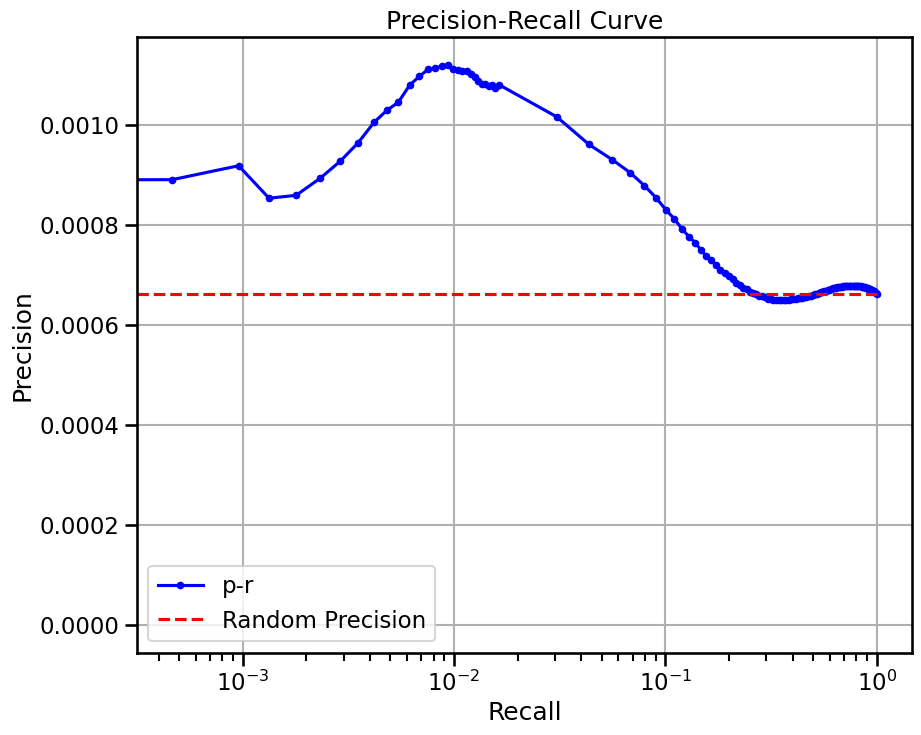


  0%|          | 0/16 [00:00<?, ?it/s]


  6%|▋         | 1/16 [00:02<00:36,  2.43s/it]


 12%|█▎        | 2/16 [00:03<00:24,  1.72s/it]


 19%|█▉        | 3/16 [00:06<00:27,  2.14s/it]


 25%|██▌       | 4/16 [00:07<00:21,  1.76s/it]


 31%|███▏      | 5/16 [00:08<00:17,  1.55s/it]


 38%|███▊      | 6/16 [00:09<00:14,  1.42s/it]


 44%|████▍     | 7/16 [00:10<00:12,  1.34s/it]


 50%|█████     | 8/16 [00:12<00:10,  1.29s/it]


 56%|█████▋    | 9/16 [00:13<00:08,  1.25s/it]


 62%|██████▎   | 10/16 [00:14<00:07,  1.23s/it]


 69%|██████▉   | 11/16 [00:15<00:06,  1.20s/it]


 75%|███████▌  | 12/16 [00:16<00:04,  1.18s/it]


 81%|████████▏ | 13/16 [00:17<00:03,  1.16s/it]


 88%|████████▊ | 14/16 [00:19<00:02,  1.15s/it]


 94%|█████████▍| 15/16 [00:20<00:01,  1.21s/it]


100%|██████████| 16/16 [00:21<00:00,  1.06s/it]


100%|██████████| 16/16 [00:21<00:00,  1.33s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


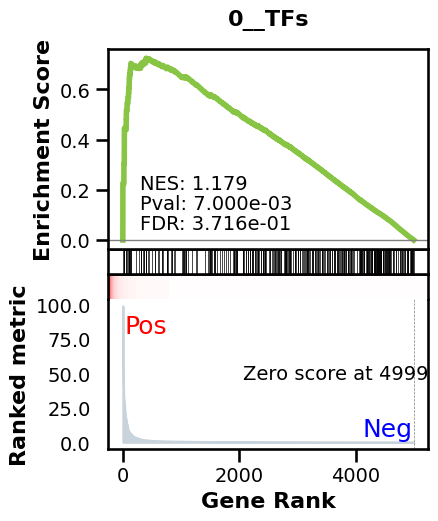

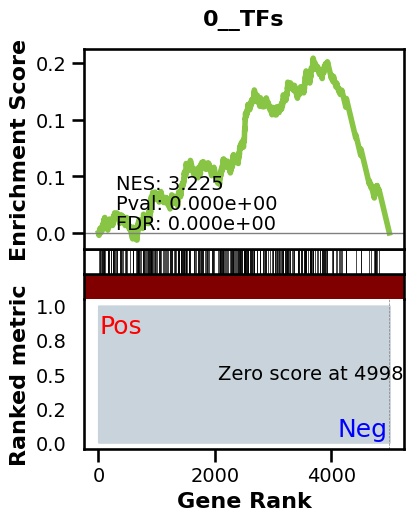

_________________________________________
TF specific enrichment


found some significant results for  30.434782608695652 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.000710707345411276 
recall:  1.0 
random precision: 0.0007109307680285068



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 72.20it/s]


 12%|█▎        | 16/128 [00:00<00:01, 72.21it/s]


 19%|█▉        | 24/128 [00:00<00:01, 72.22it/s]


 25%|██▌       | 32/128 [00:00<00:01, 72.16it/s]


 31%|███▏      | 40/128 [00:00<00:01, 71.99it/s]


 38%|███▊      | 48/128 [00:00<00:01, 72.38it/s]


 44%|████▍     | 56/128 [00:00<00:00, 72.56it/s]


 50%|█████     | 64/128 [00:00<00:00, 72.48it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 72.40it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 72.63it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 72.44it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 72.37it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 72.28it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 72.20it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 72.16it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 72.03it/s]


100%|██████████| 128/128 [00:01<00:00, 72.24it/s]

Average Precision (AP):  0.0008521303935608548
Area Under Precision-Recall Curve (AUPRC):  0.000848006500995123
EPR: 1.7611384739568408


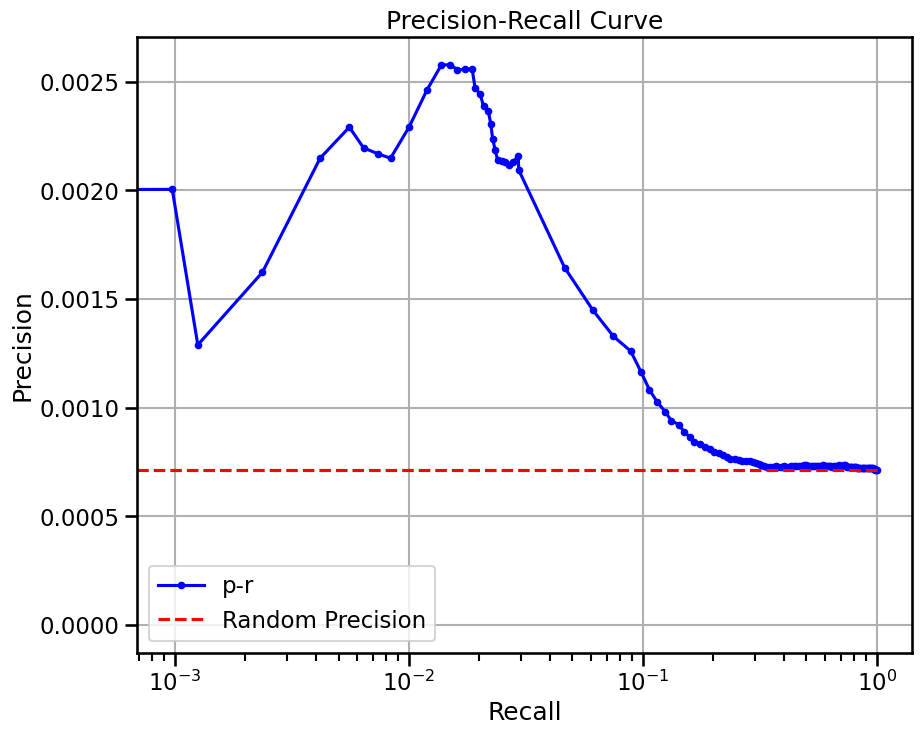

base enrichment


Top central genes: []


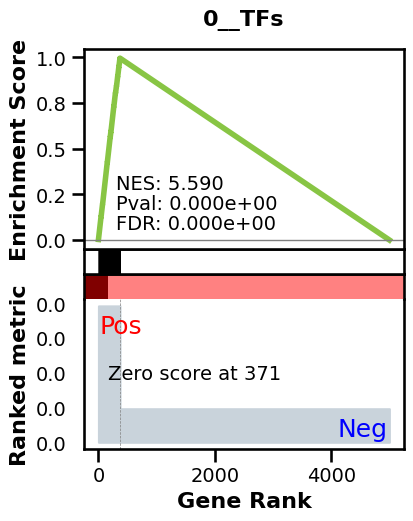

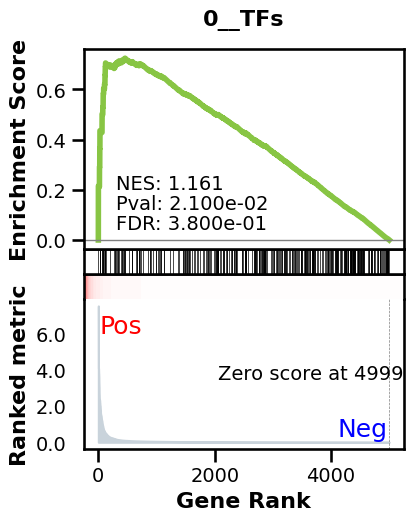

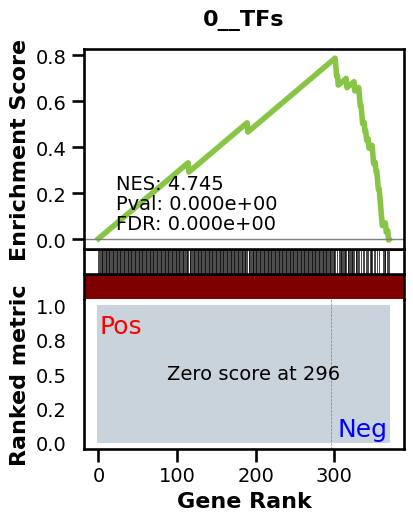

_________________________________________
TF specific enrichment


found some significant results for  8.695652173913043 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.0038823077261827075 
recall:  0.5390494719288493 
random precision: 0.0007109307680285068



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 73.17it/s]


 12%|█▎        | 16/128 [00:00<00:01, 72.56it/s]


 19%|█▉        | 24/128 [00:00<00:01, 72.68it/s]


 25%|██▌       | 32/128 [00:00<00:01, 72.35it/s]


 31%|███▏      | 40/128 [00:00<00:01, 72.38it/s]


 38%|███▊      | 48/128 [00:00<00:01, 71.95it/s]


 44%|████▍     | 56/128 [00:00<00:01, 71.71it/s]


 50%|█████     | 64/128 [00:00<00:00, 71.50it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 71.20it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 71.22it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 71.66it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 71.57it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 71.48it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 71.47it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 71.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 71.32it/s]


100%|██████████| 128/128 [00:01<00:00, 71.64it/s]

Average Precision (AP):  0.0031328943433263927
Area Under Precision-Recall Curve (AUPRC):  0.0028790894858540866
EPR: 15.153144647140513


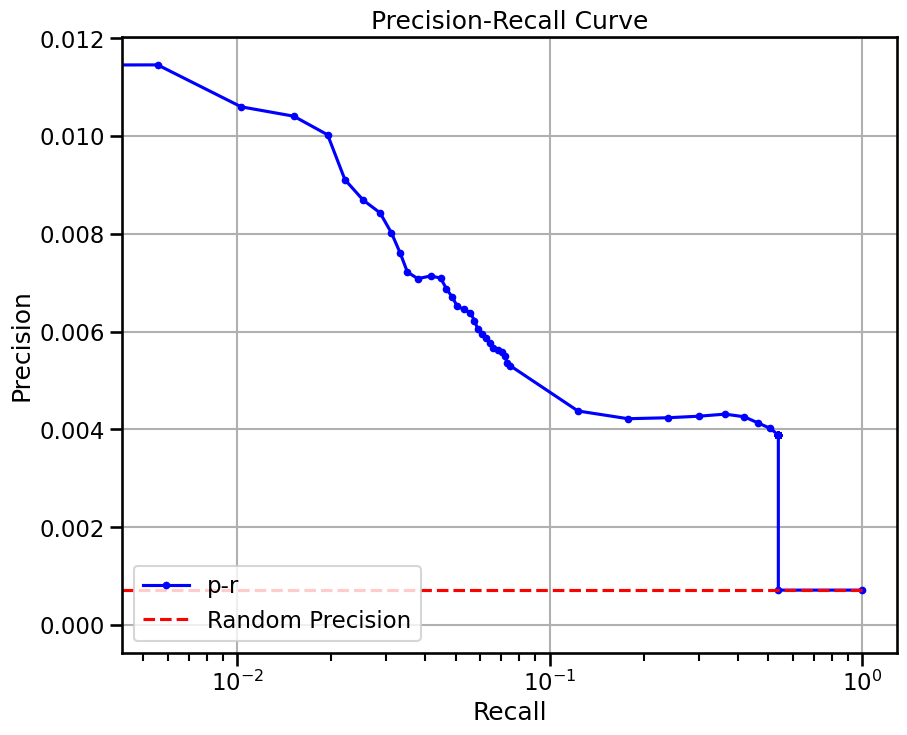

base enrichment


Top central genes: []
The DataFrame contains only the same values.


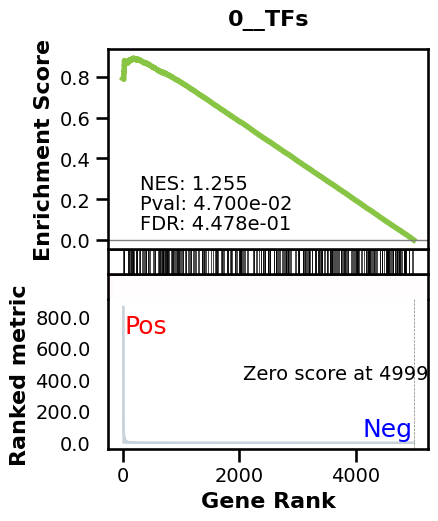

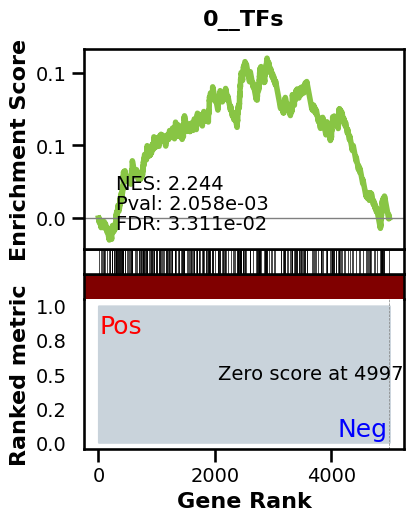

_________________________________________
TF specific enrichment


found some significant results for  39.130434782608695 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.000710707345411276 
recall:  1.0 
random precision: 0.0007109307680285068



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 71.73it/s]


 12%|█▎        | 16/128 [00:00<00:01, 70.96it/s]


 19%|█▉        | 24/128 [00:00<00:01, 71.17it/s]


 25%|██▌       | 32/128 [00:00<00:01, 71.37it/s]


 31%|███▏      | 40/128 [00:00<00:01, 71.48it/s]


 38%|███▊      | 48/128 [00:00<00:01, 71.64it/s]


 44%|████▍     | 56/128 [00:00<00:01, 71.63it/s]


 50%|█████     | 64/128 [00:00<00:00, 71.67it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 71.56it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 71.52it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 71.60it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 71.18it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 70.88it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 70.91it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 70.88it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 70.77it/s]


100%|██████████| 128/128 [00:01<00:00, 71.19it/s]

Average Precision (AP):  0.0009335971652077507
Area Under Precision-Recall Curve (AUPRC):  0.0009253623262536121
EPR: 6.103466071646841


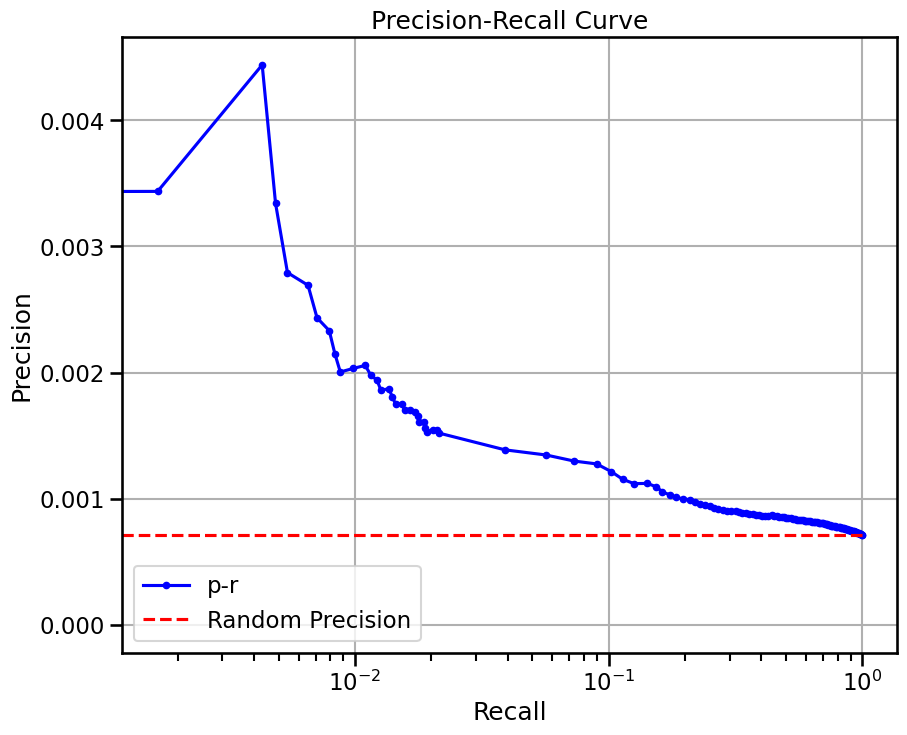

base enrichment


Top central genes: []


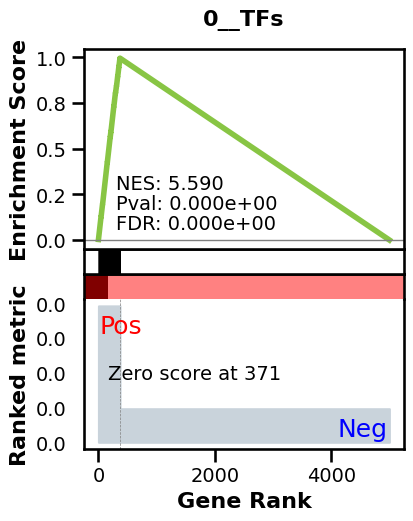

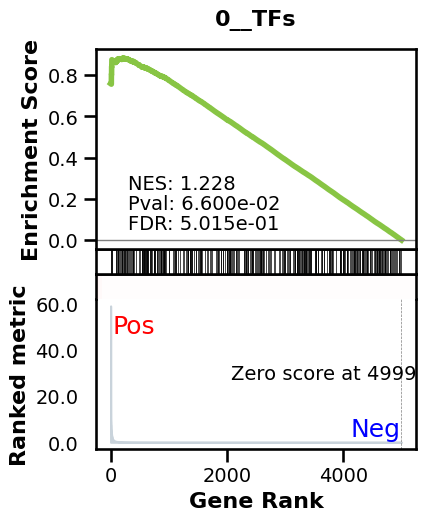

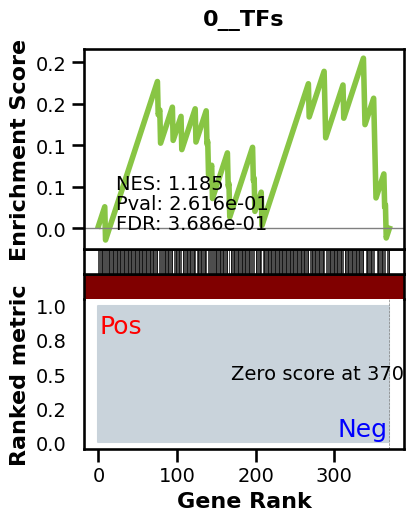

_________________________________________
TF specific enrichment


found some significant results for  8.695652173913043 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.0038823077261827075 
recall:  0.5390494719288493 
random precision: 0.0007109307680285068



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 69.97it/s]


 12%|█▎        | 16/128 [00:00<00:01, 71.30it/s]


 19%|█▉        | 24/128 [00:00<00:01, 71.95it/s]


 25%|██▌       | 32/128 [00:00<00:01, 71.18it/s]


 31%|███▏      | 40/128 [00:00<00:01, 71.58it/s]


 38%|███▊      | 48/128 [00:00<00:01, 71.56it/s]


 44%|████▍     | 56/128 [00:00<00:01, 71.51it/s]


 50%|█████     | 64/128 [00:00<00:00, 71.68it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 70.05it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 70.56it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 70.93it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 71.23it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 71.33it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 71.25it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 71.43it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 71.47it/s]


100%|██████████| 128/128 [00:01<00:00, 71.23it/s]

Average Precision (AP):  0.003328122905486021
Area Under Precision-Recall Curve (AUPRC):  0.0029787379882804488
EPR: 13.122410217774885


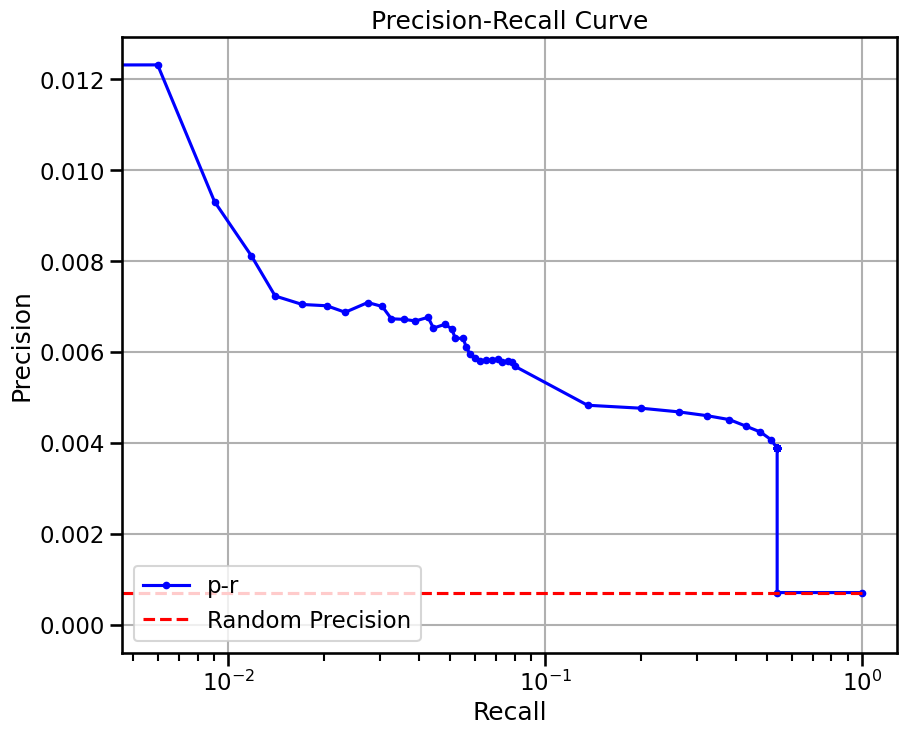


  0%|          | 0/8 [00:00<?, ?it/s]


 12%|█▎        | 1/8 [00:01<00:12,  1.74s/it]


 25%|██▌       | 2/8 [00:02<00:06,  1.16s/it]


 38%|███▊      | 3/8 [00:03<00:04,  1.02it/s]


 50%|█████     | 4/8 [00:04<00:03,  1.13it/s]


 62%|██████▎   | 5/8 [00:04<00:02,  1.19it/s]


 75%|███████▌  | 6/8 [00:05<00:01,  1.23it/s]


 88%|████████▊ | 7/8 [00:06<00:00,  1.26it/s]


100%|██████████| 8/8 [00:06<00:00,  1.74it/s]


100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

avg link count: 535829904, sparsity: 1.0


base enrichment


too many genes for central computation


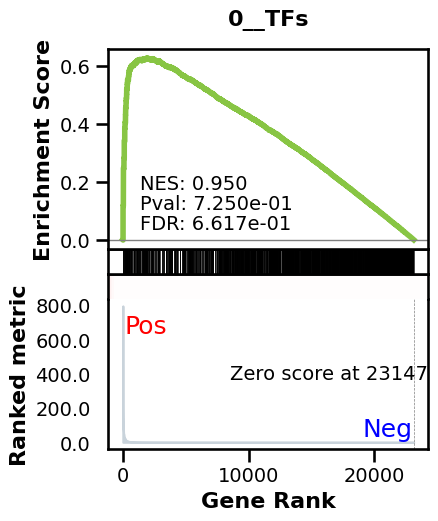

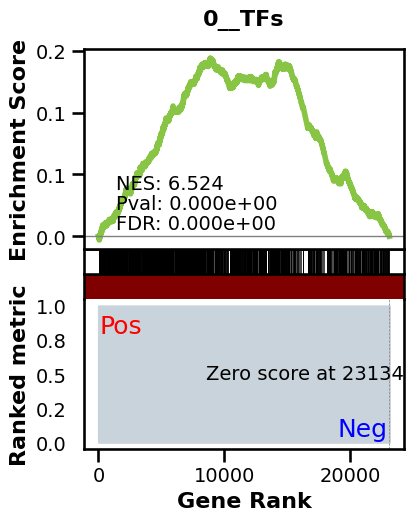

_________________________________________
TF specific enrichment


found some significant results for  52.67857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5384050457922931


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:39,  3.23it/s]


  2%|▏         | 2/128 [00:00<00:37,  3.32it/s]


  2%|▏         | 3/128 [00:00<00:37,  3.36it/s]


  3%|▎         | 4/128 [00:01<00:36,  3.37it/s]


  4%|▍         | 5/128 [00:01<00:36,  3.38it/s]


  5%|▍         | 6/128 [00:01<00:36,  3.39it/s]


  5%|▌         | 7/128 [00:02<00:35,  3.39it/s]


  6%|▋         | 8/128 [00:02<00:35,  3.39it/s]


  7%|▋         | 9/128 [00:02<00:35,  3.40it/s]


  8%|▊         | 10/128 [00:02<00:34,  3.39it/s]


  9%|▊         | 11/128 [00:03<00:34,  3.40it/s]


  9%|▉         | 12/128 [00:03<00:34,  3.39it/s]


 10%|█         | 13/128 [00:03<00:33,  3.40it/s]


 11%|█         | 14/128 [00:04<00:33,  3.40it/s]


 12%|█▏        | 15/128 [00:04<00:33,  3.39it/s]


 12%|█▎        | 16/128 [00:04<00:33,  3.39it/s]


 13%|█▎        | 17/128 [00:05<00:32,  3.39it/s]


 14%|█▍        | 18/128 [00:05<00:32,  3.39it/s]


 15%|█▍        | 19/128 [00:05<00:32,  3.38it/s]


 16%|█▌        | 20/128 [00:05<00:31,  3.38it/s]


 16%|█▋        | 21/128 [00:06<00:31,  3.39it/s]


 17%|█▋        | 22/128 [00:06<00:31,  3.39it/s]


 18%|█▊        | 23/128 [00:06<00:30,  3.40it/s]


 19%|█▉        | 24/128 [00:07<00:30,  3.40it/s]


 20%|█▉        | 25/128 [00:07<00:30,  3.40it/s]


 20%|██        | 26/128 [00:07<00:29,  3.40it/s]


 21%|██        | 27/128 [00:07<00:29,  3.40it/s]


 22%|██▏       | 28/128 [00:08<00:29,  3.40it/s]


 23%|██▎       | 29/128 [00:08<00:29,  3.39it/s]


 23%|██▎       | 30/128 [00:08<00:28,  3.39it/s]


 24%|██▍       | 31/128 [00:09<00:28,  3.39it/s]


 25%|██▌       | 32/128 [00:09<00:28,  3.39it/s]


 26%|██▌       | 33/128 [00:09<00:27,  3.39it/s]


 27%|██▋       | 34/128 [00:10<00:27,  3.39it/s]


 27%|██▋       | 35/128 [00:10<00:27,  3.39it/s]


 28%|██▊       | 36/128 [00:10<00:27,  3.40it/s]


 29%|██▉       | 37/128 [00:10<00:26,  3.40it/s]


 30%|██▉       | 38/128 [00:11<00:26,  3.39it/s]


 30%|███       | 39/128 [00:11<00:26,  3.39it/s]


 31%|███▏      | 40/128 [00:11<00:25,  3.39it/s]


 32%|███▏      | 41/128 [00:12<00:25,  3.40it/s]


 33%|███▎      | 42/128 [00:12<00:25,  3.39it/s]


 34%|███▎      | 43/128 [00:12<00:25,  3.39it/s]


 34%|███▍      | 44/128 [00:12<00:24,  3.39it/s]


 35%|███▌      | 45/128 [00:13<00:24,  3.39it/s]


 36%|███▌      | 46/128 [00:13<00:24,  3.39it/s]


 37%|███▋      | 47/128 [00:13<00:23,  3.39it/s]


 38%|███▊      | 48/128 [00:14<00:23,  3.39it/s]


 38%|███▊      | 49/128 [00:14<00:23,  3.39it/s]


 39%|███▉      | 50/128 [00:14<00:23,  3.39it/s]


 40%|███▉      | 51/128 [00:15<00:22,  3.39it/s]


 41%|████      | 52/128 [00:15<00:22,  3.39it/s]


 41%|████▏     | 53/128 [00:15<00:22,  3.39it/s]


 42%|████▏     | 54/128 [00:15<00:21,  3.39it/s]


 43%|████▎     | 55/128 [00:16<00:21,  3.39it/s]


 44%|████▍     | 56/128 [00:16<00:21,  3.39it/s]


 45%|████▍     | 57/128 [00:16<00:20,  3.39it/s]


 45%|████▌     | 58/128 [00:17<00:20,  3.39it/s]


 46%|████▌     | 59/128 [00:17<00:20,  3.40it/s]


 47%|████▋     | 60/128 [00:17<00:20,  3.39it/s]


 48%|████▊     | 61/128 [00:17<00:19,  3.39it/s]


 48%|████▊     | 62/128 [00:18<00:19,  3.39it/s]


 49%|████▉     | 63/128 [00:18<00:19,  3.39it/s]


 50%|█████     | 64/128 [00:18<00:18,  3.40it/s]


 51%|█████     | 65/128 [00:19<00:18,  3.40it/s]


 52%|█████▏    | 66/128 [00:19<00:18,  3.40it/s]


 52%|█████▏    | 67/128 [00:19<00:17,  3.39it/s]


 53%|█████▎    | 68/128 [00:20<00:17,  3.39it/s]


 54%|█████▍    | 69/128 [00:20<00:17,  3.39it/s]


 55%|█████▍    | 70/128 [00:20<00:17,  3.39it/s]


 55%|█████▌    | 71/128 [00:20<00:16,  3.39it/s]


 56%|█████▋    | 72/128 [00:21<00:16,  3.39it/s]


 57%|█████▋    | 73/128 [00:21<00:16,  3.39it/s]


 58%|█████▊    | 74/128 [00:21<00:15,  3.39it/s]


 59%|█████▊    | 75/128 [00:22<00:15,  3.39it/s]


 59%|█████▉    | 76/128 [00:22<00:15,  3.39it/s]


 60%|██████    | 77/128 [00:22<00:15,  3.39it/s]


 61%|██████    | 78/128 [00:23<00:14,  3.39it/s]


 62%|██████▏   | 79/128 [00:23<00:14,  3.39it/s]


 62%|██████▎   | 80/128 [00:23<00:14,  3.39it/s]


 63%|██████▎   | 81/128 [00:23<00:13,  3.39it/s]


 64%|██████▍   | 82/128 [00:24<00:13,  3.39it/s]


 65%|██████▍   | 83/128 [00:24<00:13,  3.39it/s]


 66%|██████▌   | 84/128 [00:24<00:12,  3.39it/s]


 66%|██████▋   | 85/128 [00:25<00:12,  3.39it/s]


 67%|██████▋   | 86/128 [00:25<00:12,  3.39it/s]


 68%|██████▊   | 87/128 [00:25<00:12,  3.39it/s]


 69%|██████▉   | 88/128 [00:25<00:11,  3.39it/s]


 70%|██████▉   | 89/128 [00:26<00:11,  3.39it/s]


 70%|███████   | 90/128 [00:26<00:11,  3.39it/s]


 71%|███████   | 91/128 [00:26<00:10,  3.39it/s]


 72%|███████▏  | 92/128 [00:27<00:10,  3.39it/s]


 73%|███████▎  | 93/128 [00:27<00:10,  3.39it/s]


 73%|███████▎  | 94/128 [00:27<00:10,  3.39it/s]


 74%|███████▍  | 95/128 [00:28<00:09,  3.39it/s]


 75%|███████▌  | 96/128 [00:28<00:09,  3.40it/s]


 76%|███████▌  | 97/128 [00:28<00:09,  3.39it/s]


 77%|███████▋  | 98/128 [00:28<00:08,  3.39it/s]


 77%|███████▋  | 99/128 [00:29<00:08,  3.39it/s]


 78%|███████▊  | 100/128 [00:29<00:08,  3.39it/s]


 79%|███████▉  | 101/128 [00:29<00:07,  3.39it/s]


 80%|███████▉  | 102/128 [00:30<00:07,  3.39it/s]


 80%|████████  | 103/128 [00:30<00:07,  3.39it/s]


 81%|████████▏ | 104/128 [00:30<00:07,  3.39it/s]


 82%|████████▏ | 105/128 [00:30<00:06,  3.39it/s]


 83%|████████▎ | 106/128 [00:31<00:06,  3.39it/s]


 84%|████████▎ | 107/128 [00:31<00:06,  3.39it/s]


 84%|████████▍ | 108/128 [00:31<00:05,  3.39it/s]


 85%|████████▌ | 109/128 [00:32<00:05,  3.39it/s]


 86%|████████▌ | 110/128 [00:32<00:05,  3.40it/s]


 87%|████████▋ | 111/128 [00:32<00:05,  3.39it/s]


 88%|████████▊ | 112/128 [00:33<00:04,  3.39it/s]


 88%|████████▊ | 113/128 [00:33<00:04,  3.39it/s]


 89%|████████▉ | 114/128 [00:33<00:04,  3.40it/s]


 90%|████████▉ | 115/128 [00:33<00:03,  3.40it/s]


 91%|█████████ | 116/128 [00:34<00:03,  3.39it/s]


 91%|█████████▏| 117/128 [00:34<00:03,  3.39it/s]


 92%|█████████▏| 118/128 [00:34<00:02,  3.39it/s]


 93%|█████████▎| 119/128 [00:35<00:02,  3.39it/s]


 94%|█████████▍| 120/128 [00:35<00:02,  3.38it/s]


 95%|█████████▍| 121/128 [00:35<00:02,  3.37it/s]


 95%|█████████▌| 122/128 [00:35<00:01,  3.38it/s]


 96%|█████████▌| 123/128 [00:36<00:01,  3.38it/s]


 97%|█████████▋| 124/128 [00:36<00:01,  3.38it/s]


 98%|█████████▊| 125/128 [00:36<00:00,  3.39it/s]


 98%|█████████▊| 126/128 [00:37<00:00,  3.38it/s]


 99%|█████████▉| 127/128 [00:37<00:00,  3.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:37<00:00,  3.39it/s]


100%|██████████| 128/128 [00:37<00:00,  3.39it/s]

Average Precision (AP):  0.000688546692505316
Area Under Precision-Recall Curve (AUPRC):  0.0006879083048140491


EPR: 1.3469081959780886


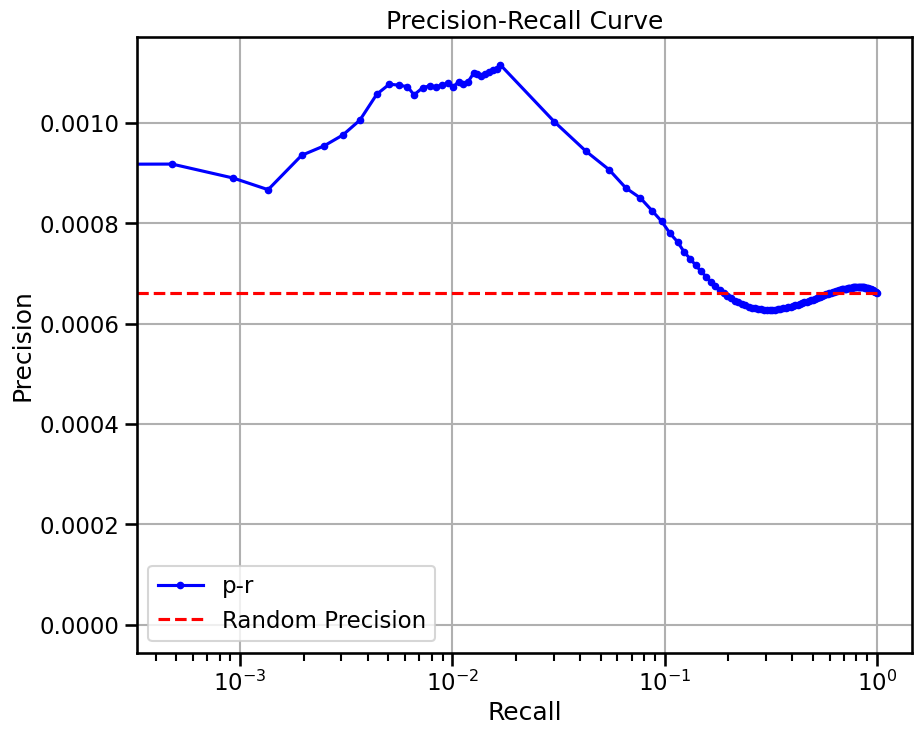


  0%|          | 0/15 [00:00<?, ?it/s]


  7%|▋         | 1/15 [00:03<00:42,  3.05s/it]


 13%|█▎        | 2/15 [00:04<00:24,  1.91s/it]


 20%|██        | 3/15 [00:05<00:18,  1.55s/it]


 27%|██▋       | 4/15 [00:06<00:15,  1.37s/it]


 33%|███▎      | 5/15 [00:07<00:12,  1.27s/it]


 40%|████      | 6/15 [00:08<00:10,  1.21s/it]


 47%|████▋     | 7/15 [00:09<00:09,  1.20s/it]


 53%|█████▎    | 8/15 [00:10<00:08,  1.18s/it]


 60%|██████    | 9/15 [00:11<00:06,  1.16s/it]


 67%|██████▋   | 10/15 [00:13<00:05,  1.14s/it]


 73%|███████▎  | 11/15 [00:14<00:04,  1.13s/it]


 80%|████████  | 12/15 [00:15<00:03,  1.13s/it]


 87%|████████▋ | 13/15 [00:16<00:02,  1.12s/it]


 93%|█████████▎| 14/15 [00:17<00:01,  1.11s/it]


100%|██████████| 15/15 [00:17<00:00,  1.16it/s]


100%|██████████| 15/15 [00:17<00:00,  1.20s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


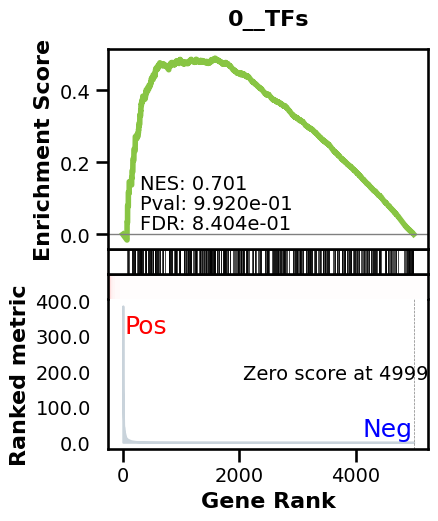

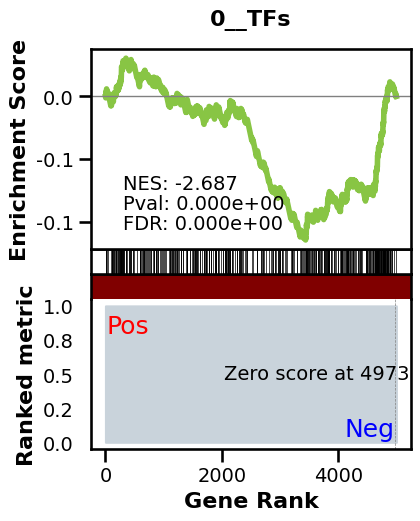

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.001192520141082607 
recall:  1.0 
random precision: 0.0011928575831146055



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.37it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.37it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.24it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.52it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.58it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.54it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.51it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.41it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.25it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.27it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.37it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.49it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.40it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.39it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.47it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.21it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.37it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.51it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.66it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.04it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.21it/s]

Average Precision (AP):  0.0013408196939190687
Area Under Precision-Recall Curve (AUPRC):  0.00133935325760052


EPR: 1.125451319497098


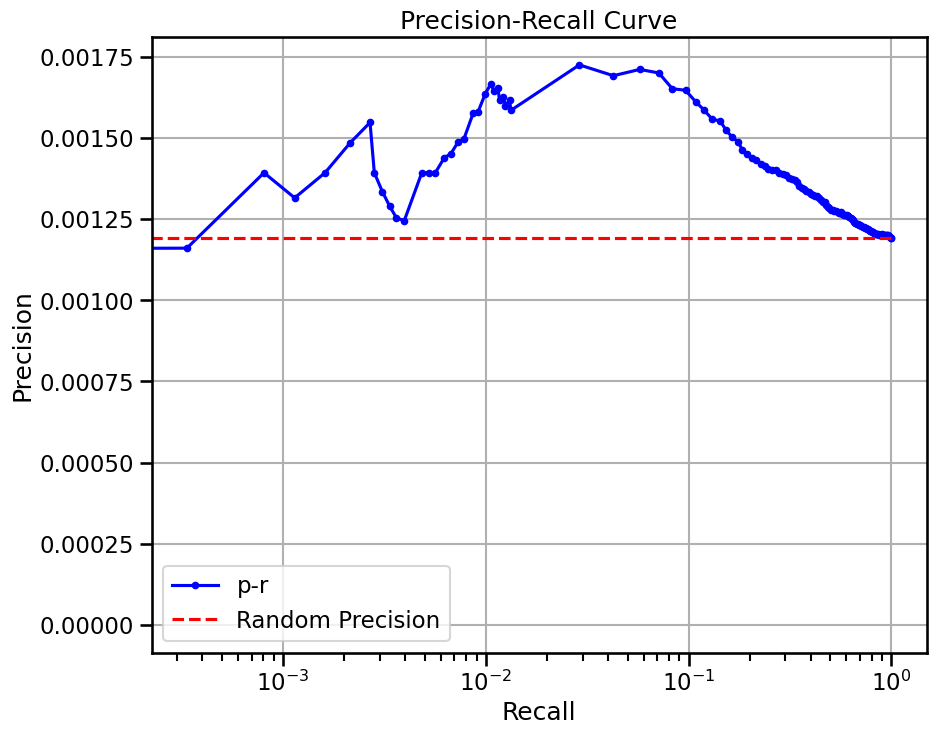

base enrichment


Top central genes: []


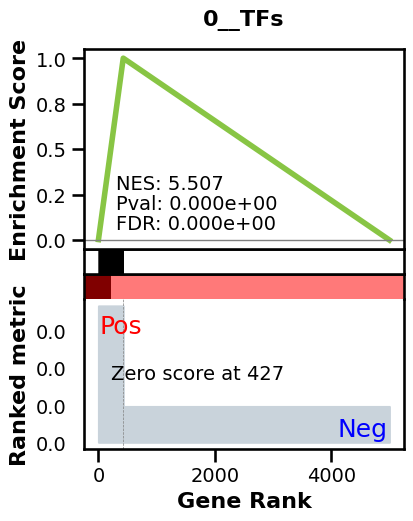

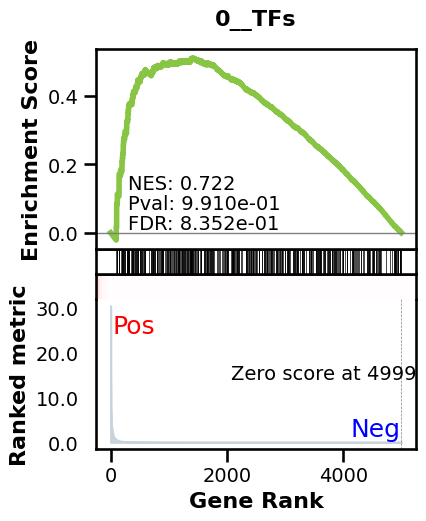

_________________________________________
TF specific enrichment


found some significant results for  15.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.0052568900331060745 
recall:  0.4576566903771306 
random precision: 0.0011928575831146055



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.79it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.30it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.00it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.63it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.24it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.67it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.77it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.89it/s]


 42%|████▏     | 54/128 [00:00<00:01, 57.05it/s]


 47%|████▋     | 60/128 [00:01<00:01, 57.01it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.89it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.90it/s]


 61%|██████    | 78/128 [00:01<00:00, 57.16it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 57.16it/s]


 70%|███████   | 90/128 [00:01<00:00, 57.13it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.16it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.70it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.08it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.24it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.58it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.55it/s]

Average Precision (AP):  0.00386367812103191
Area Under Precision-Recall Curve (AUPRC):  0.0034923372480756
EPR: 7.076415159637595


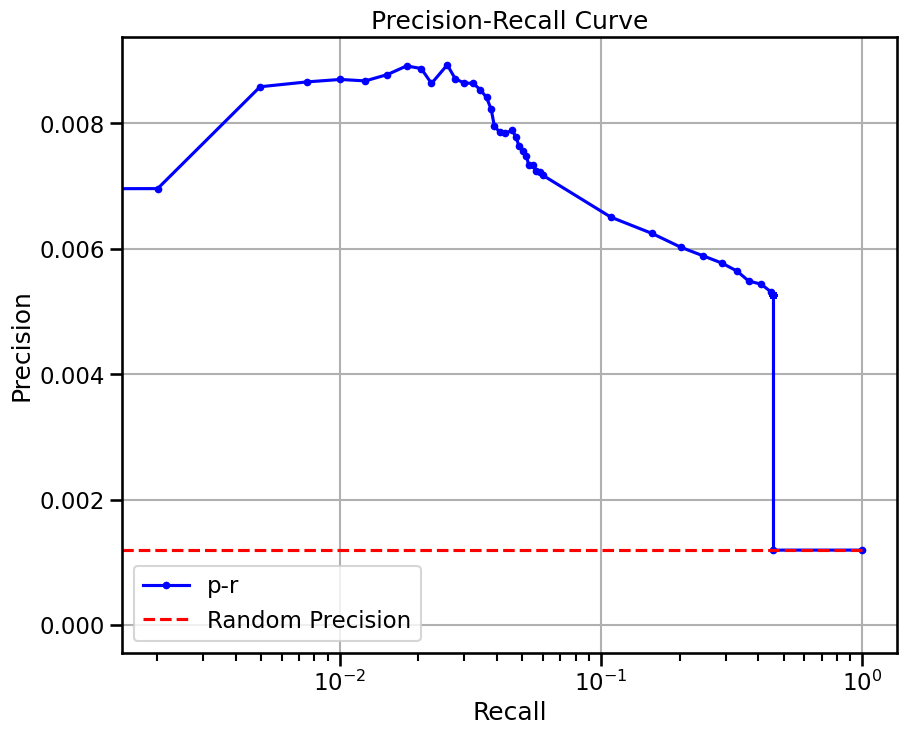

base enrichment


Top central genes: []
The DataFrame contains only the same values.


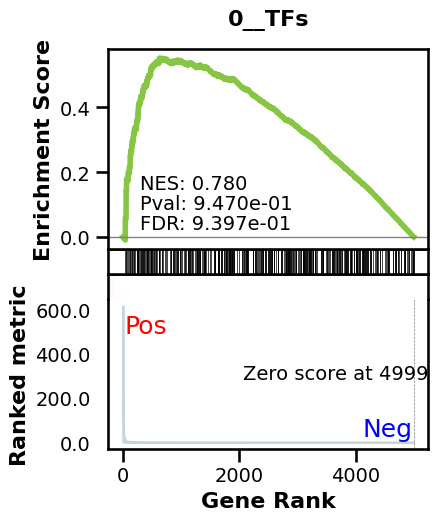

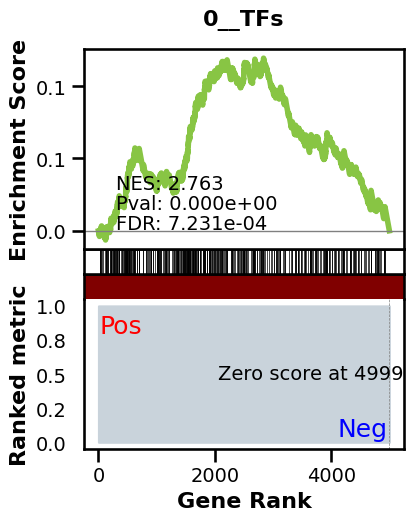

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.001192520141082607 
recall:  1.0 
random precision: 0.0011928575831146055



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.23it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.27it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.30it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.29it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.26it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.03it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.15it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.15it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.85it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.04it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.05it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.10it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.13it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.24it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.23it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.15it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.12it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.13it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.06it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.16it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.23it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.12it/s]

Average Precision (AP):  0.0014097469770021395
Area Under Precision-Recall Curve (AUPRC):  0.0014089871823794622
EPR: 1.5207904571711037


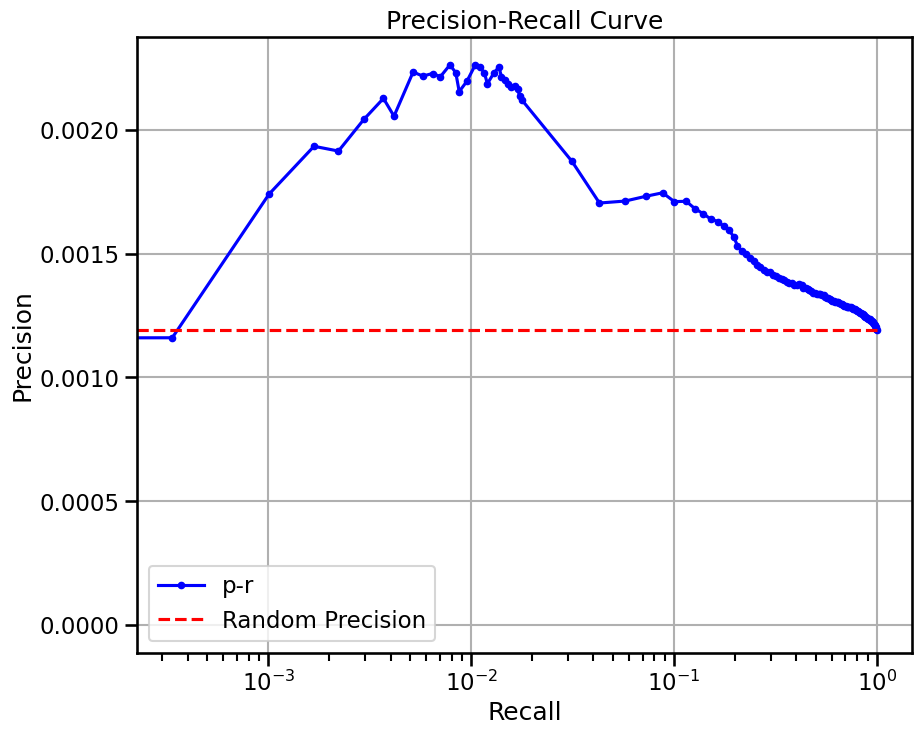

base enrichment


Top central genes: []


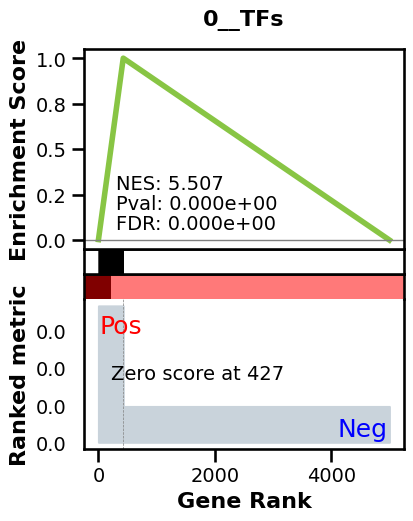

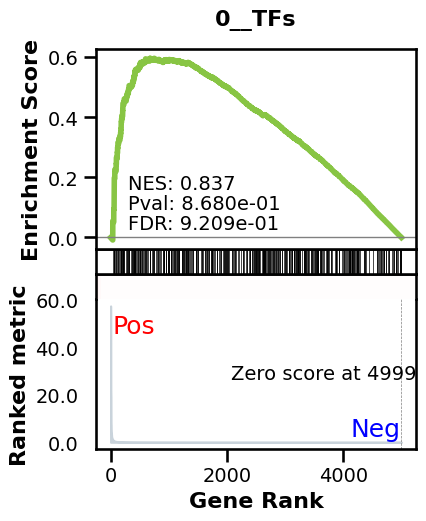

_________________________________________
TF specific enrichment


found some significant results for  10.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.0052568900331060745 
recall:  0.4576566903771306 
random precision: 0.0011928575831146055



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.78it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.71it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.74it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.71it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.61it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.61it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.85it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.02it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.34it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.15it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.40it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.57it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.42it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.40it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.63it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.64it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.74it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.56it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.27it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.95it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.85it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.12it/s]

Average Precision (AP):  0.003928696179153813
Area Under Precision-Recall Curve (AUPRC):  0.003548551820614699
EPR: 8.473560545951665


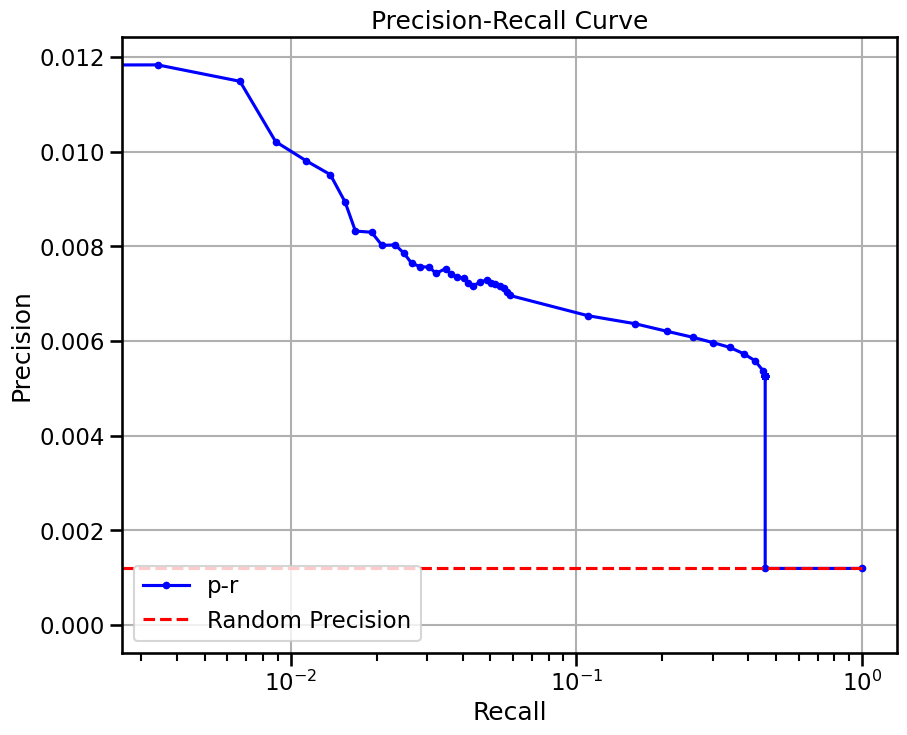


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [00:01<00:01,  1.72s/it]


100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

avg link count: 386869561, sparsity: 1.0


base enrichment


too many genes for central computation


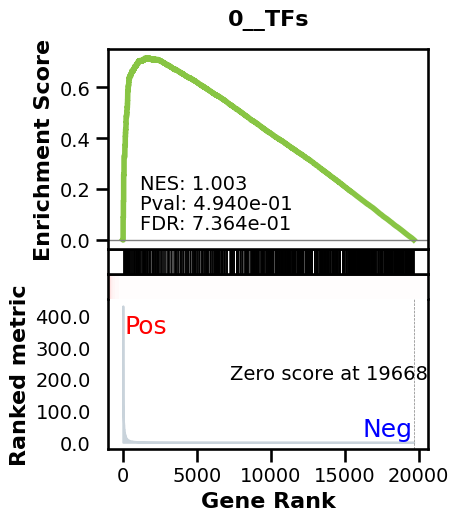

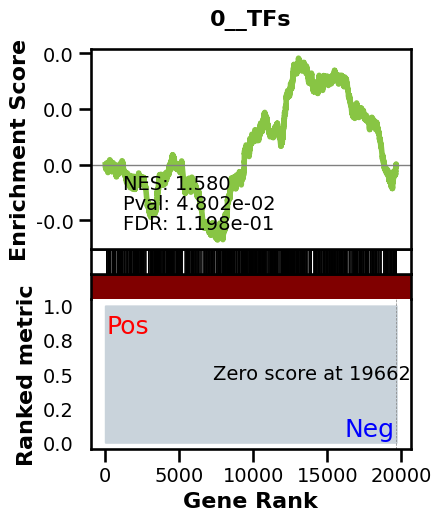

_________________________________________
TF specific enrichment


found some significant results for  56.60377358490566 % TFs

_________________________________________
loading GT,  omnipath


intersection of 11028 genes
intersection pct: 0.5606792414459302


precision:  0.0007188033180661677 
recall:  1.0 
random precision: 0.0007188611275657709



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:27,  4.62it/s]


  2%|▏         | 2/128 [00:00<00:27,  4.62it/s]


  2%|▏         | 3/128 [00:00<00:26,  4.63it/s]


  3%|▎         | 4/128 [00:00<00:26,  4.63it/s]


  4%|▍         | 5/128 [00:01<00:26,  4.63it/s]


  5%|▍         | 6/128 [00:01<00:26,  4.63it/s]


  5%|▌         | 7/128 [00:01<00:26,  4.63it/s]


  6%|▋         | 8/128 [00:01<00:25,  4.62it/s]


  7%|▋         | 9/128 [00:01<00:25,  4.62it/s]


  8%|▊         | 10/128 [00:02<00:25,  4.62it/s]


  9%|▊         | 11/128 [00:02<00:25,  4.61it/s]


  9%|▉         | 12/128 [00:02<00:25,  4.61it/s]


 10%|█         | 13/128 [00:02<00:24,  4.61it/s]


 11%|█         | 14/128 [00:03<00:24,  4.62it/s]


 12%|█▏        | 15/128 [00:03<00:24,  4.61it/s]


 12%|█▎        | 16/128 [00:03<00:24,  4.60it/s]


 13%|█▎        | 17/128 [00:03<00:24,  4.58it/s]


 14%|█▍        | 18/128 [00:03<00:24,  4.58it/s]


 15%|█▍        | 19/128 [00:04<00:23,  4.58it/s]


 16%|█▌        | 20/128 [00:04<00:23,  4.58it/s]


 16%|█▋        | 21/128 [00:04<00:23,  4.57it/s]


 17%|█▋        | 22/128 [00:04<00:23,  4.57it/s]


 18%|█▊        | 23/128 [00:04<00:22,  4.57it/s]


 19%|█▉        | 24/128 [00:05<00:22,  4.57it/s]


 20%|█▉        | 25/128 [00:05<00:22,  4.57it/s]


 20%|██        | 26/128 [00:05<00:22,  4.58it/s]


 21%|██        | 27/128 [00:05<00:22,  4.58it/s]


 22%|██▏       | 28/128 [00:06<00:21,  4.58it/s]


 23%|██▎       | 29/128 [00:06<00:21,  4.57it/s]


 23%|██▎       | 30/128 [00:06<00:21,  4.57it/s]


 24%|██▍       | 31/128 [00:06<00:21,  4.57it/s]


 25%|██▌       | 32/128 [00:06<00:20,  4.58it/s]


 26%|██▌       | 33/128 [00:07<00:20,  4.58it/s]


 27%|██▋       | 34/128 [00:07<00:20,  4.58it/s]


 27%|██▋       | 35/128 [00:07<00:20,  4.58it/s]


 28%|██▊       | 36/128 [00:07<00:20,  4.58it/s]


 29%|██▉       | 37/128 [00:08<00:19,  4.57it/s]


 30%|██▉       | 38/128 [00:08<00:19,  4.58it/s]


 30%|███       | 39/128 [00:08<00:19,  4.57it/s]


 31%|███▏      | 40/128 [00:08<00:19,  4.57it/s]


 32%|███▏      | 41/128 [00:08<00:19,  4.57it/s]


 33%|███▎      | 42/128 [00:09<00:18,  4.56it/s]


 34%|███▎      | 43/128 [00:09<00:18,  4.56it/s]


 34%|███▍      | 44/128 [00:09<00:18,  4.57it/s]


 35%|███▌      | 45/128 [00:09<00:18,  4.56it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.55it/s]


 37%|███▋      | 47/128 [00:10<00:17,  4.56it/s]


 38%|███▊      | 48/128 [00:10<00:17,  4.56it/s]


 38%|███▊      | 49/128 [00:10<00:17,  4.56it/s]


 39%|███▉      | 50/128 [00:10<00:17,  4.57it/s]


 40%|███▉      | 51/128 [00:11<00:16,  4.57it/s]


 41%|████      | 52/128 [00:11<00:16,  4.56it/s]


 41%|████▏     | 53/128 [00:11<00:16,  4.57it/s]


 42%|████▏     | 54/128 [00:11<00:16,  4.55it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.56it/s]


 44%|████▍     | 56/128 [00:12<00:15,  4.56it/s]


 45%|████▍     | 57/128 [00:12<00:15,  4.56it/s]


 45%|████▌     | 58/128 [00:12<00:15,  4.56it/s]


 46%|████▌     | 59/128 [00:12<00:15,  4.56it/s]


 47%|████▋     | 60/128 [00:13<00:14,  4.57it/s]


 48%|████▊     | 61/128 [00:13<00:14,  4.56it/s]


 48%|████▊     | 62/128 [00:13<00:14,  4.57it/s]


 49%|████▉     | 63/128 [00:13<00:14,  4.56it/s]


 50%|█████     | 64/128 [00:13<00:14,  4.57it/s]


 51%|█████     | 65/128 [00:14<00:13,  4.57it/s]


 52%|█████▏    | 66/128 [00:14<00:13,  4.58it/s]


 52%|█████▏    | 67/128 [00:14<00:13,  4.59it/s]


 53%|█████▎    | 68/128 [00:14<00:13,  4.58it/s]


 54%|█████▍    | 69/128 [00:15<00:12,  4.58it/s]


 55%|█████▍    | 70/128 [00:15<00:12,  4.57it/s]


 55%|█████▌    | 71/128 [00:15<00:12,  4.57it/s]


 56%|█████▋    | 72/128 [00:15<00:12,  4.57it/s]


 57%|█████▋    | 73/128 [00:15<00:12,  4.57it/s]


 58%|█████▊    | 74/128 [00:16<00:11,  4.56it/s]


 59%|█████▊    | 75/128 [00:16<00:11,  4.56it/s]


 59%|█████▉    | 76/128 [00:16<00:11,  4.56it/s]


 60%|██████    | 77/128 [00:16<00:11,  4.56it/s]


 61%|██████    | 78/128 [00:17<00:10,  4.57it/s]


 62%|██████▏   | 79/128 [00:17<00:10,  4.57it/s]


 62%|██████▎   | 80/128 [00:17<00:10,  4.57it/s]


 63%|██████▎   | 81/128 [00:17<00:10,  4.57it/s]


 64%|██████▍   | 82/128 [00:17<00:10,  4.57it/s]


 65%|██████▍   | 83/128 [00:18<00:09,  4.58it/s]


 66%|██████▌   | 84/128 [00:18<00:09,  4.58it/s]


 66%|██████▋   | 85/128 [00:18<00:09,  4.58it/s]


 67%|██████▋   | 86/128 [00:18<00:09,  4.58it/s]


 68%|██████▊   | 87/128 [00:19<00:08,  4.56it/s]


 69%|██████▉   | 88/128 [00:19<00:08,  4.56it/s]


 70%|██████▉   | 89/128 [00:19<00:08,  4.57it/s]


 70%|███████   | 90/128 [00:19<00:08,  4.57it/s]


 71%|███████   | 91/128 [00:19<00:08,  4.57it/s]


 72%|███████▏  | 92/128 [00:20<00:07,  4.58it/s]


 73%|███████▎  | 93/128 [00:20<00:07,  4.58it/s]


 73%|███████▎  | 94/128 [00:20<00:07,  4.58it/s]


 74%|███████▍  | 95/128 [00:20<00:07,  4.58it/s]


 75%|███████▌  | 96/128 [00:20<00:06,  4.57it/s]


 76%|███████▌  | 97/128 [00:21<00:06,  4.58it/s]


 77%|███████▋  | 98/128 [00:21<00:06,  4.58it/s]


 77%|███████▋  | 99/128 [00:21<00:06,  4.58it/s]


 78%|███████▊  | 100/128 [00:21<00:06,  4.58it/s]


 79%|███████▉  | 101/128 [00:22<00:05,  4.58it/s]


 80%|███████▉  | 102/128 [00:22<00:05,  4.57it/s]


 80%|████████  | 103/128 [00:22<00:05,  4.57it/s]


 81%|████████▏ | 104/128 [00:22<00:05,  4.45it/s]


 82%|████████▏ | 105/128 [00:22<00:05,  4.49it/s]


 83%|████████▎ | 106/128 [00:23<00:04,  4.51it/s]


 84%|████████▎ | 107/128 [00:23<00:04,  4.54it/s]


 84%|████████▍ | 108/128 [00:23<00:04,  4.56it/s]


 85%|████████▌ | 109/128 [00:23<00:04,  4.59it/s]


 86%|████████▌ | 110/128 [00:24<00:03,  4.60it/s]


 87%|████████▋ | 111/128 [00:24<00:03,  4.59it/s]


 88%|████████▊ | 112/128 [00:24<00:03,  4.60it/s]


 88%|████████▊ | 113/128 [00:24<00:03,  4.59it/s]


 89%|████████▉ | 114/128 [00:24<00:03,  4.59it/s]


 90%|████████▉ | 115/128 [00:25<00:02,  4.59it/s]


 91%|█████████ | 116/128 [00:25<00:02,  4.60it/s]


 91%|█████████▏| 117/128 [00:25<00:02,  4.60it/s]


 92%|█████████▏| 118/128 [00:25<00:02,  4.61it/s]


 93%|█████████▎| 119/128 [00:26<00:01,  4.61it/s]


 94%|█████████▍| 120/128 [00:26<00:01,  4.58it/s]


 95%|█████████▍| 121/128 [00:26<00:01,  4.60it/s]


 95%|█████████▌| 122/128 [00:26<00:01,  4.60it/s]


 96%|█████████▌| 123/128 [00:26<00:01,  4.62it/s]


 97%|█████████▋| 124/128 [00:27<00:00,  4.61it/s]


 98%|█████████▊| 125/128 [00:27<00:00,  4.61it/s]


 98%|█████████▊| 126/128 [00:27<00:00,  4.61it/s]


 99%|█████████▉| 127/128 [00:27<00:00,  4.62it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:27<00:00,  4.53it/s]


100%|██████████| 128/128 [00:27<00:00,  4.58it/s]

Average Precision (AP):  0.0007779622106933223
Area Under Precision-Recall Curve (AUPRC):  0.000777513217918416


EPR: 1.5155152432287538


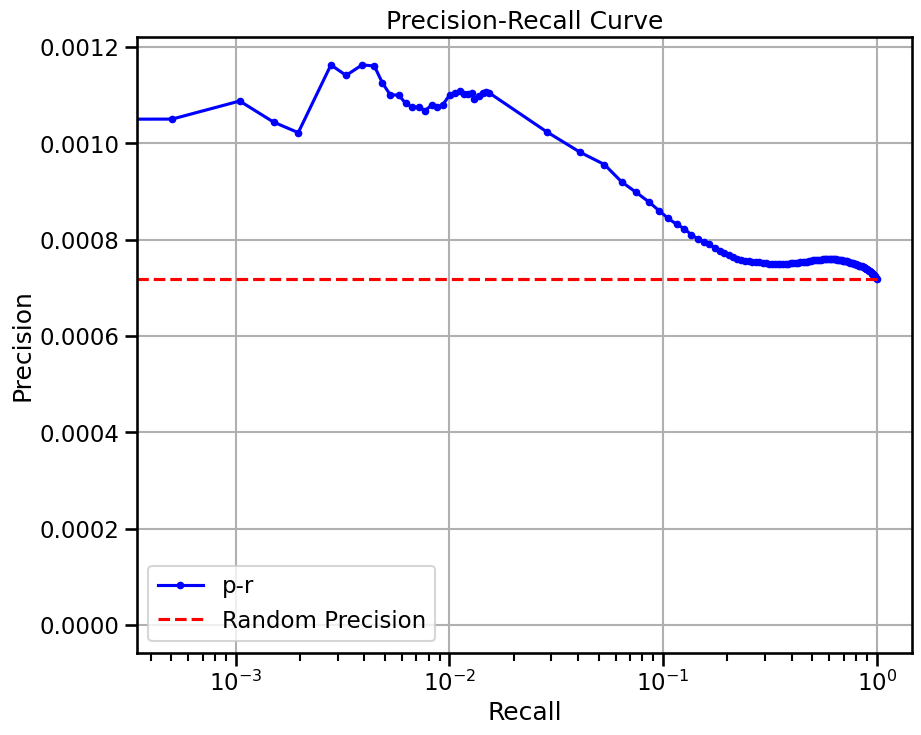


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:02<00:04,  2.24s/it]


 67%|██████▋   | 2/3 [00:03<00:01,  1.56s/it]


100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


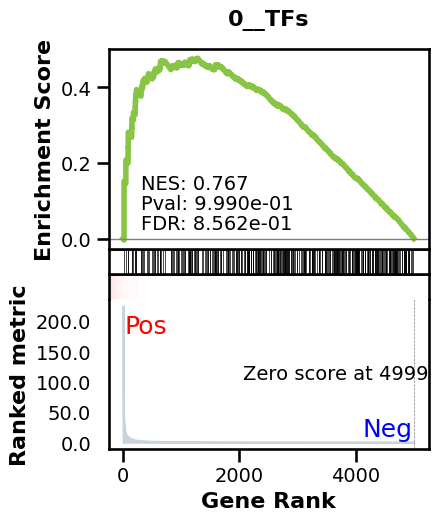

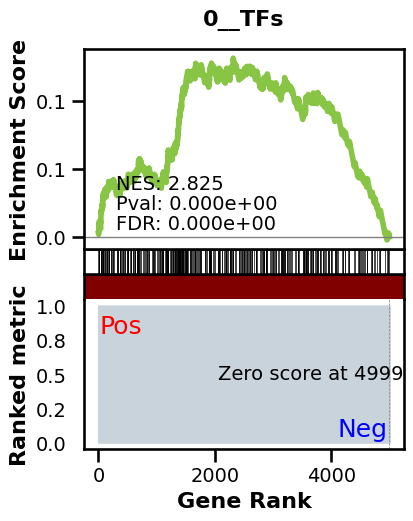

_________________________________________
TF specific enrichment


found some significant results for  30.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.0009807661569609463 
recall:  1.0 
random precision: 0.000981052595675012



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 62.03it/s]


 11%|█         | 14/128 [00:00<00:01, 61.86it/s]


 16%|█▋        | 21/128 [00:00<00:01, 61.75it/s]


 22%|██▏       | 28/128 [00:00<00:01, 61.83it/s]


 27%|██▋       | 35/128 [00:00<00:01, 61.62it/s]


 33%|███▎      | 42/128 [00:00<00:01, 61.56it/s]


 38%|███▊      | 49/128 [00:00<00:01, 61.60it/s]


 44%|████▍     | 56/128 [00:00<00:01, 61.65it/s]


 49%|████▉     | 63/128 [00:01<00:01, 61.70it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 61.77it/s]


 60%|██████    | 77/128 [00:01<00:00, 61.71it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 61.71it/s]


 71%|███████   | 91/128 [00:01<00:00, 61.78it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 61.78it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 61.80it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 61.77it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 61.73it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 61.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 61.68it/s]

Average Precision (AP):  0.001075151626295269
Area Under Precision-Recall Curve (AUPRC):  0.0010746860786426723
EPR: 1.1521100454693645


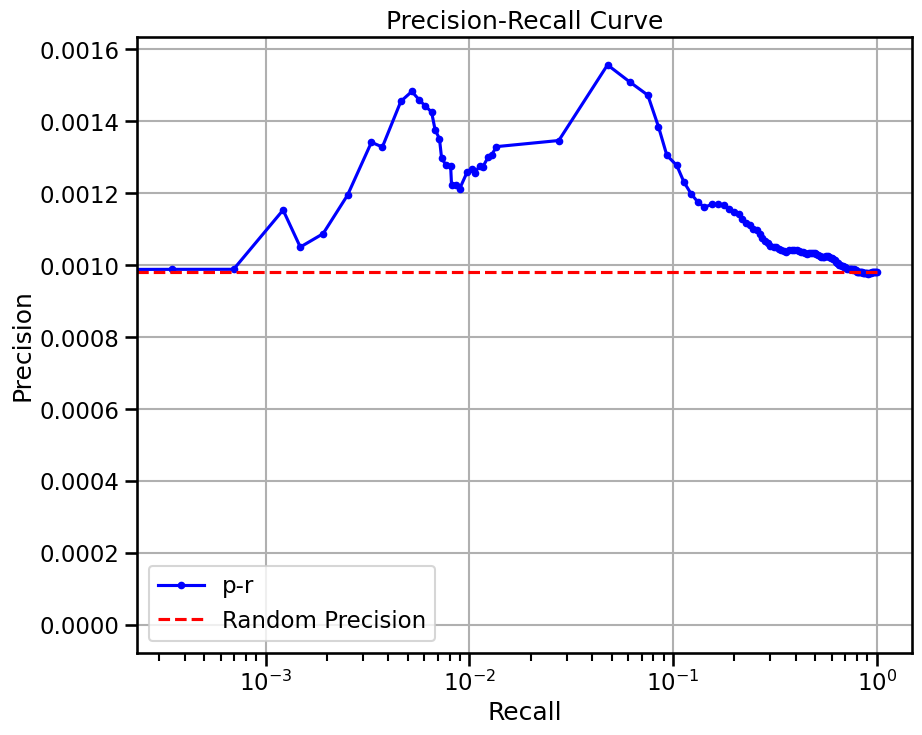

base enrichment


Top central genes: []


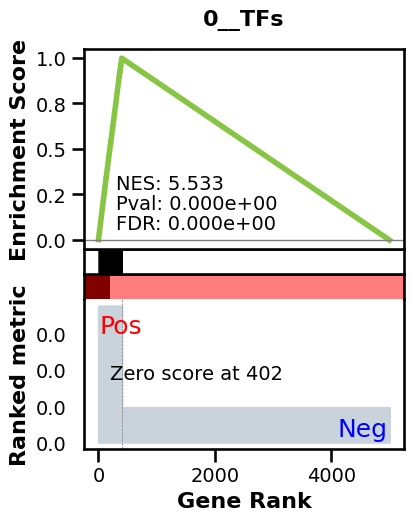

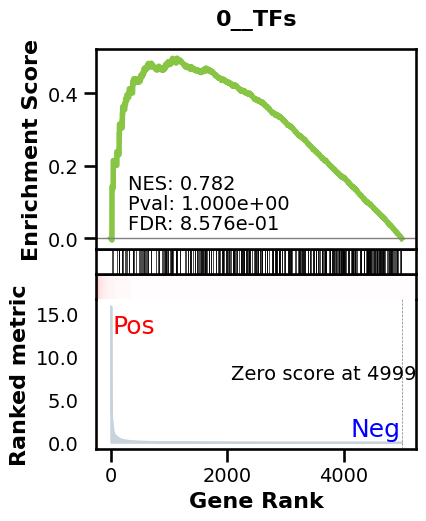

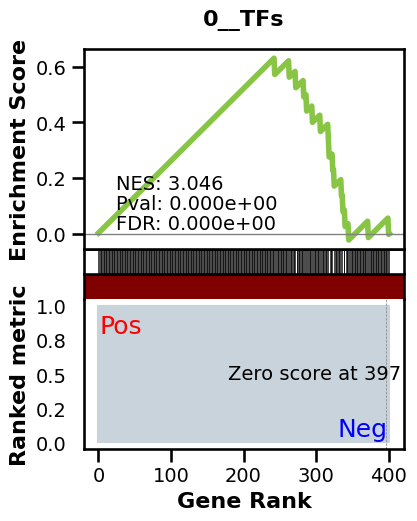

_________________________________________
TF specific enrichment


found some significant results for  10.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.004688075101838258 
recall:  0.49265536723163844 
random precision: 0.000981052595675012



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.51it/s]


  9%|▉         | 12/128 [00:00<00:01, 59.67it/s]


 14%|█▍        | 18/128 [00:00<00:01, 59.76it/s]


 20%|█▉        | 25/128 [00:00<00:01, 59.94it/s]


 25%|██▌       | 32/128 [00:00<00:01, 60.04it/s]


 30%|███       | 39/128 [00:00<00:01, 60.07it/s]


 36%|███▌      | 46/128 [00:00<00:01, 60.23it/s]


 41%|████▏     | 53/128 [00:00<00:01, 60.23it/s]


 47%|████▋     | 60/128 [00:00<00:01, 60.19it/s]


 52%|█████▏    | 67/128 [00:01<00:01, 60.19it/s]


 58%|█████▊    | 74/128 [00:01<00:00, 60.24it/s]


 63%|██████▎   | 81/128 [00:01<00:00, 60.26it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 60.27it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 60.27it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 60.33it/s]


 85%|████████▌ | 109/128 [00:01<00:00, 60.30it/s]


 91%|█████████ | 116/128 [00:01<00:00, 60.34it/s]


 96%|█████████▌| 123/128 [00:02<00:00, 60.46it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.19it/s]

Average Precision (AP):  0.003447386258767806
Area Under Precision-Recall Curve (AUPRC):  0.003001167256016196
EPR: 6.62837971180971


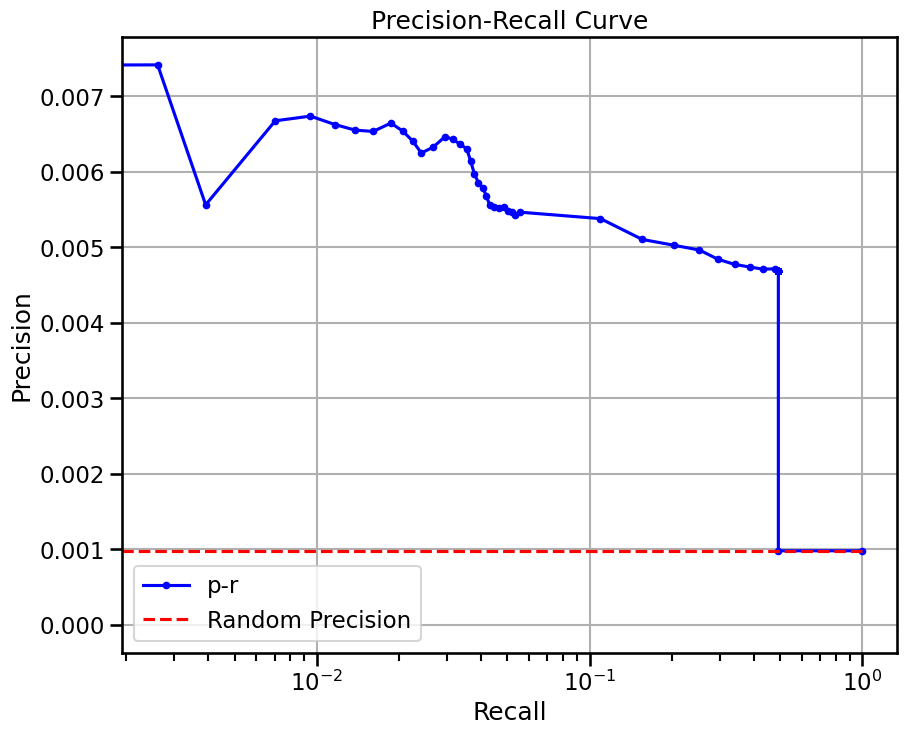

base enrichment


Top central genes: []
The DataFrame contains only the same values.


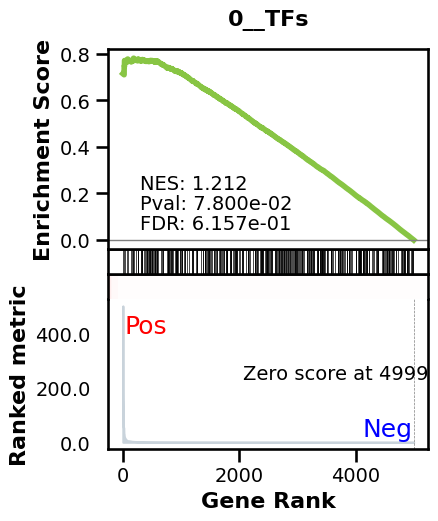

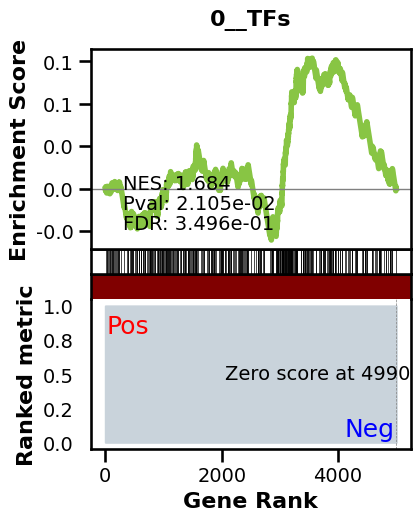

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.0009807661569609463 
recall:  1.0 
random precision: 0.000981052595675012



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:02, 60.30it/s]


 11%|█         | 14/128 [00:00<00:01, 60.34it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.49it/s]


 22%|██▏       | 28/128 [00:00<00:01, 60.47it/s]


 27%|██▋       | 35/128 [00:00<00:01, 60.53it/s]


 33%|███▎      | 42/128 [00:00<00:01, 60.03it/s]


 38%|███▊      | 49/128 [00:00<00:01, 59.91it/s]


 44%|████▍     | 56/128 [00:00<00:01, 60.20it/s]


 49%|████▉     | 63/128 [00:01<00:01, 60.10it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 60.16it/s]


 60%|██████    | 77/128 [00:01<00:00, 60.34it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 60.36it/s]


 71%|███████   | 91/128 [00:01<00:00, 60.50it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 60.37it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 60.18it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 60.12it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 60.35it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 60.20it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.21it/s]

Average Precision (AP):  0.0010070768025367055
Area Under Precision-Recall Curve (AUPRC):  0.001004417113278816
EPR: 1.1521100454693645


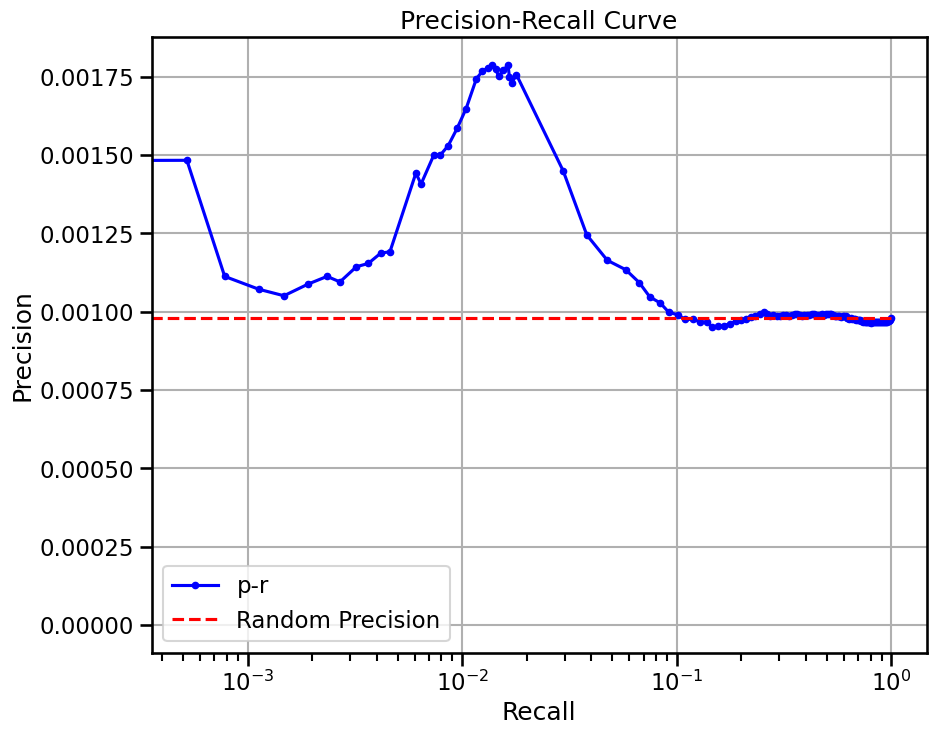

base enrichment


Top central genes: []


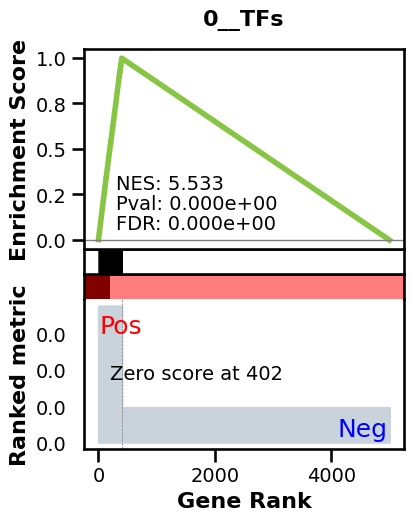

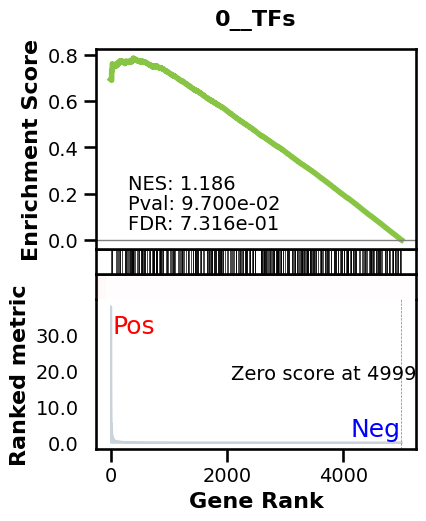

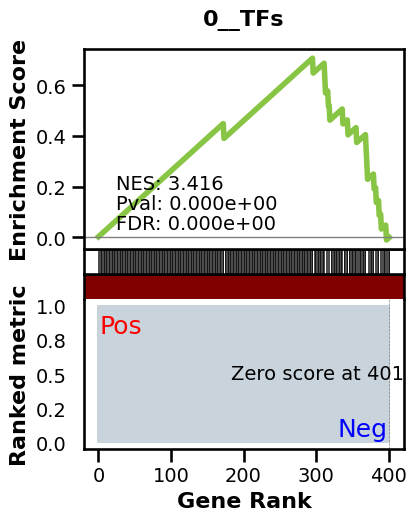

_________________________________________
TF specific enrichment


found some significant results for  7.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.004688075101838258 
recall:  0.49265536723163844 
random precision: 0.000981052595675012



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 57.74it/s]


  9%|▉         | 12/128 [00:00<00:02, 57.43it/s]


 14%|█▍        | 18/128 [00:00<00:01, 57.37it/s]


 19%|█▉        | 24/128 [00:00<00:01, 57.36it/s]


 23%|██▎       | 30/128 [00:00<00:01, 57.35it/s]


 28%|██▊       | 36/128 [00:00<00:01, 57.23it/s]


 33%|███▎      | 42/128 [00:00<00:01, 57.41it/s]


 38%|███▊      | 48/128 [00:00<00:01, 57.50it/s]


 42%|████▏     | 54/128 [00:00<00:01, 57.47it/s]


 47%|████▋     | 60/128 [00:01<00:01, 57.32it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 57.27it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 57.27it/s]


 61%|██████    | 78/128 [00:01<00:00, 57.35it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 57.43it/s]


 70%|███████   | 90/128 [00:01<00:00, 57.47it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 57.52it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 57.61it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 57.68it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 57.71it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 57.82it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 57.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 57.50it/s]

Average Precision (AP):  0.003185135092400854
Area Under Precision-Recall Curve (AUPRC):  0.0027452533013355863
EPR: 5.632229767019033


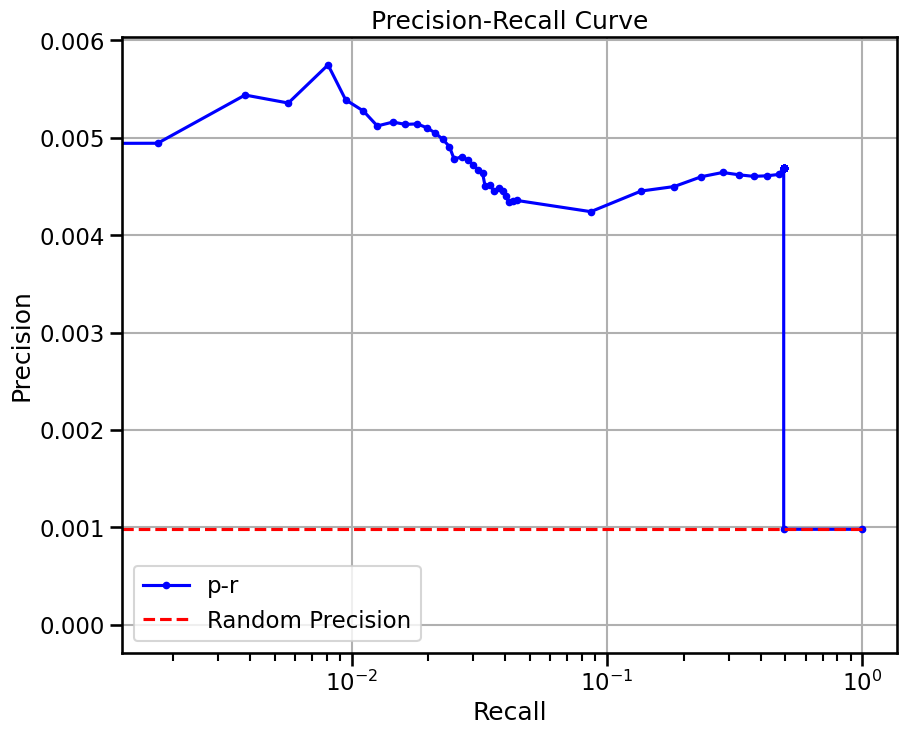

In [6]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata,
                        how="random expr",
                        preprocess="softmax",
                        head_agg='mean',
                        filtration="none",
                        forward_mode="none",
                        num_genes=2200,
                        max_cells=MAXCELLS,
                        doplot=False,
                        batch_size=32,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata,
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [7]:
metrics

{'fibroblast_scprint_full': {'TF_enr': True,
  'enriched_terms_Targets': ['0__TFs',
   'celltype.gmt__Immune system cells',
   'celltype.gmt__Enterocytes',
   'celltype.gmt__Naive CD4+ T cells',
   'celltype.gmt__CD4+ NKT-like cells',
   'celltype.gmt__Naive CD8+ T cells',
   'celltype.gmt__CD8+ NKT-like cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Effector CD4+ T cells',
   'celltype.gmt__Hepatocytes',
   'celltype.gmt__Pulmonary alveolar type II cells',
   'celltype.gmt__Beta cells',
   'celltype.gmt__Memory CD4+ T cells',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Natural killer cells',
   'celltype.gmt__-T cells',
   'celltype.gmt__Memory CD8+ T cells',
   'celltype.gmt__Effector CD8+ T cells',
   'celltype.gmt__Pericytes',
   'celltype.gmt__Epithelial cells',
   'celltype.gmt__GABAergic neurons',
   'celltype.gmt__Myocytes',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Neutrophils',
   'celltype.gmt__Ureteric Bud cells',
   'celltype.gmt__Endothe

In [ ]:
False
False
False
False
False
False
False
True
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False

In [8]:
import pandas as pd

In [9]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['ap'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'AP', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

tools                name        EPR     AUPRC        AP      RAND  \
0    full          fibroblast   1.248191  0.000667  0.000668  0.000662   
1    mean          fibroblast   0.548899  0.001518  0.001519  0.001246   
2    mean          fibroblast  13.950870  0.008094  0.008530  0.001246   
3   class          fibroblast   7.027503  0.001741  0.001746  0.001246   
4   class          fibroblast  19.236082  0.008564  0.009451  0.001246   
5    full    endothelial cell   1.215291  0.000702  0.000702  0.000662   
6    mean    endothelial cell   1.226469  0.001762  0.001763  0.001591   
7    mean    endothelial cell   8.228691  0.004526  0.004909  0.001591   
8   class    endothelial cell   1.669081  0.001847  0.001848  0.001591   
9   class    endothelial cell   7.078544  0.004507  0.004919  0.001591   
10   full  myofibroblast cell   1.160464  0.000678  0.000678  0.000662   
11   mean  myofibroblast cell   1.297507  0.000920  0.000921  0.000804   
12   mean  myofibroblast cell   7.071389  0.002000  0.002263  0.000804   
13  class  myofibroblast cell   4.039976  0.000927  0.000931  0.000804   
14  class  myofibroblast cell   7.734262  0.001844  0.002127  0.000804   
15   full          glial cell   1.445651  0.000726  0.000726  0.000662   
16   mean          glial cell   4.642211  0.000627  0.000630  0.000574   
17   mean          glial cell  10.278361  0.001702  0.001883  0.000574   
18  class          glial cell   4.020398  0.000674  0.000680  0.000574   
19  class          glial cell   8.391648  0.001987  0.002228  0.000574   
20   full            pericyte   1.423706  0.000704  0.000704  0.000662   
21   mean            pericyte   1.761138  0.000848  0.000852  0.000711   
22   mean            pericyte  15.153145  0.002879  0.003133  0.000711   
23  class            pericyte   6.103466  0.000925  0.000934  0.000711   
24  class            pericyte  13.122410  0.002979  0.003328  0.000711   
25   full          lymphocyte   1.346908  0.000688  0.000689  0.000662   
26   mean          lymphocyte   1.125451  0.001339  0.001341  0.001193   
27   mean          lymphocyte   7.076415  0.003492  0.003864  0.001193   
28  class          lymphocyte   1.520790  0.001409  0.001410  0.001193   
29  class          lymphocyte   8.473561  0.003549  0.003929  0.001193   
30   full        stromal cell   1.515515  0.000778  0.000778  0.000719   
31   mean        stromal cell   1.152110  0.001075  0.001075  0.000981   
32   mean        stromal cell   6.628380  0.003001  0.003447  0.000981   
33  class        stromal cell   1.152110  0.001004  0.001007  0.000981   
34  class        stromal cell   5.632230  0.002745  0.003185  0.000981   

      TF_targ  TF_enr  TF_only  
0   48.214286    True    False  
1   36.111111   False    False  
2   16.666667    True     True  
3   30.555556    True    False  
4    2.777778    True     True  
5   58.928571    True    False  
6   21.428571    True    False  
7   12.500000    True     True  
8   33.928571   False    False  
9    8.928571    True     True  
10  52.678571    True    False  
11  25.000000    True    False  
12   7.142857    True     True  
13  10.714286    True    False  
14   0.000000    True     True  
15  58.035714    True    False  
16  33.333333    True    False  
17   0.000000    True     True  
18  22.222222   False    False  
19   0.000000    True     True  
20  52.678571    True    False  
21  30.434783    True    False  
22   8.695652    True     True  
23  39.130435    True    False  
24   8.695652    True     True  
25  52.678571    True    False  
26  25.000000    True    False  
27  15.000000    True     True  
28  25.000000    True    False  
29  10.000000    True     True  
30  56.603774   False    False  
31  30.000000    True    False  
32  10.000000    True     True  
33  25.000000   False    False  
34   7.500000    True     True